In [1]:
#pip install openpyxl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from def_python import *

### Transaction log, Putaway_transfer_picking report, and replenishment report

#### 1. Putaway, Transfer, Picking 

##### Load & select data

In [3]:
folder = 'Data/put_transfer_pick/'
df_Jun = import_csv(folder,'All_LT23_June')
df_July = import_csv(folder,'All_Lt23_July_2023')
df_Aug = import_csv(folder,'Lt23_31-08-2023')
df_Sep = import_csv(folder,'All_Lt23_Sep_2023')

c:\Users\Lenovo Legion\Desktop\DKSH KM20\def_python.py:8: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{folder}{filename}.csv', encoding='utf-8', encoding_errors='replace')
c:\Users\Lenovo Legion\Desktop\DKSH KM20\def_python.py:8: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{folder}{filename}.csv', encoding='utf-8', encoding_errors='replace')
c:\Users\Lenovo Legion\Desktop\DKSH KM20\def_python.py:8: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{folder}{filename}.csv', encoding='utf-8', encoding_errors='replace')
c:\Users\Lenovo Legion\Desktop\DKSH KM20\def_python.py:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{folder}{filename}.csv', encoding='utf-8', encoding_errors='replace')


In [4]:
df2 = pd.concat([df_Jun, df_July, df_Aug, df_Sep], axis=0, ignore_index = True)
#display(df2)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334366 entries, 0 to 334365
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TO Number             334365 non-null  float64
 1    Transfer order item  334365 non-null  float64
 2   Material              334365 non-null  float64
 3   Stock Category        28474 non-null   object 
 4   Special Stock         61875 non-null   object 
 5   Source Stor.Ty.       334365 non-null  object 
 6   Source Storage Bin    334365 non-null  object 
 7   Typ                   334365 non-null  object 
 8   Dest. Bin             334365 non-null  object 
 9   Source targ.qty       334365 non-null  object 
 10  AUn                   334365 non-null  object 
 11  Confirmatn type       334365 non-null  float64
 12   Conf. status         0 non-null       float64
 13  Description           334365 non-null  object 
 14  SLoc                  334365 non-null  object 
 15  

In [5]:
df2.tail()

TO Number   Transfer order item     Material Stock Category  \
334361  74780436.0                   1.0  100213194.0            NaN   
334362  74780437.0                   1.0  120047604.0            NaN   
334363  74780438.0                   1.0  101074273.0            NaN   
334364  74780439.0                   1.0  101070289.0            NaN   
334365  74780440.0                   1.0  120242611.0            NaN   

       Special Stock Source Stor.Ty. Source Storage Bin  Typ   Dest. Bin  \
334361           NaN             MO1           COOL-001  AH1  C17-061-02   
334362           NaN             MO1           COOL-001  AH1  C17-011-02   
334363           NaN             MO1           COOL-001  AH1  C17-012-02   
334364           NaN             MO1           COOL-001  AH1  C16-021-03   
334365           NaN             MO1           COOL-001  AH1  C16-012-04   

       Source targ.qty  ...    SLED/BBD   Conf.t.   Conf.date      User Batch  \
334361          9600.0  ...  28.06.2024  22:40:03  30.09.2023  PAWEENAS   NaN   
334362           384.0  ...  06.09.2024  22:45:32  30.09.2023  PAWEENAS   NaN   
334363          6912.0  ...  02.07.2024  22:45:45  30.09.2023  PAWEENAS   NaN   
334364          1280.0  ...  01.06.2024  22:48:25  30.09.2023  PAWEENAS   NaN   
334365           124.0  ...  17.08.2025  22:49:09  30.09.2023  PAWEENAS   NaN   

       St.rem.SU. Source storage unit Source target qty            Volume  \
334361        NaN                 NaN               NaN               NaN   
334362        NaN                 NaN               NaN               NaN   
334363        NaN                 NaN               NaN               NaN   
334364        NaN                 NaN               NaN               NaN   
334365        NaN                 NaN               NaN               NaN   

       Unnamed: 17  
334361         NaN  
334362         NaN  
334363         NaN  
334364         NaN  
334365         NaN  

[5 rows x 25 columns]

In [6]:
#df2.loc[:,' Transfer order item'].unique()
put_trans_pick = df2.loc[:,['TO Number', 'Material', 'Source Stor.Ty.', 
'Source Storage Bin', 'Typ', 'Dest. Bin', 'Source targ.qty', 'AUn', 'Conf.t.', 'Conf.date', 'User', 'Source target qty']]
put_trans_pick

TO Number     Material Source Stor.Ty. Source Storage Bin  Typ  \
0       73395814.0  100819039.0             MH5         008-041-02  MH5   
1       73395815.0  100819039.0             MH5         008-032-02  MH5   
2       73395816.0  101151933.0             MH8         018-051-02  MH8   
3       73395817.0  101167708.0             AH1         C12-164-02  AH1   
4       73396157.0  101154418.0             IDP          232135889  MH4   
...            ...          ...             ...                ...  ...   
334361  74780436.0  100213194.0             MO1           COOL-001  AH1   
334362  74780437.0  120047604.0             MO1           COOL-001  AH1   
334363  74780438.0  101074273.0             MO1           COOL-001  AH1   
334364  74780439.0  101070289.0             MO1           COOL-001  AH1   
334365  74780440.0  120242611.0             MO1           COOL-001  AH1   

         Dest. Bin Source targ.qty AUn   Conf.t.   Conf.date       User  \
0       008-032-02           4,032  PC   8:04:22  01.06.2023   SIRIRATM   
1       008-041-02           4,032  PC   8:04:37  01.06.2023   SIRIRATM   
2       018-112-02           1,275  PC   8:05:22  01.06.2023   KHOMSANY   
3       C12-163-02             792  PC   8:07:40  01.06.2023  SUPAPORNN   
4       006-041-02              24  CV   3:09:20  01.06.2023   SAWANYAP   
...            ...             ...  ..       ...         ...        ...   
334361  C17-061-02          9600.0  PC  22:40:03  30.09.2023   PAWEENAS   
334362  C17-011-02           384.0  PC  22:45:32  30.09.2023   PAWEENAS   
334363  C17-012-02          6912.0  PC  22:45:45  30.09.2023   PAWEENAS   
334364  C16-021-03          1280.0  PC  22:48:25  30.09.2023   PAWEENAS   
334365  C16-012-04           124.0  PC  22:49:09  30.09.2023   PAWEENAS   

       Source target qty  
0                  4,032  
1                  4,032  
2                  1,275  
3                    792  
4                    360  
...                  ...  
334361               NaN  
334362               NaN  
334363               NaN  
334364               NaN  
334365               NaN  

[334366 rows x 12 columns]

##### Drop NA

In [7]:
# Source Stor.Ty. and Typ col. than contain NaN
display(put_trans_pick[(put_trans_pick['Source Stor.Ty.'].isna()) | (put_trans_pick['Typ'].isna())])

# Drop NaN row
put_trans_pick.dropna(subset = ['Source Stor.Ty.', 'Typ'], inplace=True)

put_trans_pick

TO Number  Material Source Stor.Ty. Source Storage Bin  Typ Dest. Bin  \
157437        NaN       NaN             NaN                NaN  NaN       NaN   

       Source targ.qty  AUn Conf.t. Conf.date User Source target qty  
157437             NaN  NaN     NaN       NaN  NaN               NaN

TO Number     Material Source Stor.Ty. Source Storage Bin  Typ  \
0       73395814.0  100819039.0             MH5         008-041-02  MH5   
1       73395815.0  100819039.0             MH5         008-032-02  MH5   
2       73395816.0  101151933.0             MH8         018-051-02  MH8   
3       73395817.0  101167708.0             AH1         C12-164-02  AH1   
4       73396157.0  101154418.0             IDP          232135889  MH4   
...            ...          ...             ...                ...  ...   
334361  74780436.0  100213194.0             MO1           COOL-001  AH1   
334362  74780437.0  120047604.0             MO1           COOL-001  AH1   
334363  74780438.0  101074273.0             MO1           COOL-001  AH1   
334364  74780439.0  101070289.0             MO1           COOL-001  AH1   
334365  74780440.0  120242611.0             MO1           COOL-001  AH1   

         Dest. Bin Source targ.qty AUn   Conf.t.   Conf.date       User  \
0       008-032-02           4,032  PC   8:04:22  01.06.2023   SIRIRATM   
1       008-041-02           4,032  PC   8:04:37  01.06.2023   SIRIRATM   
2       018-112-02           1,275  PC   8:05:22  01.06.2023   KHOMSANY   
3       C12-163-02             792  PC   8:07:40  01.06.2023  SUPAPORNN   
4       006-041-02              24  CV   3:09:20  01.06.2023   SAWANYAP   
...            ...             ...  ..       ...         ...        ...   
334361  C17-061-02          9600.0  PC  22:40:03  30.09.2023   PAWEENAS   
334362  C17-011-02           384.0  PC  22:45:32  30.09.2023   PAWEENAS   
334363  C17-012-02          6912.0  PC  22:45:45  30.09.2023   PAWEENAS   
334364  C16-021-03          1280.0  PC  22:48:25  30.09.2023   PAWEENAS   
334365  C16-012-04           124.0  PC  22:49:09  30.09.2023   PAWEENAS   

       Source target qty  
0                  4,032  
1                  4,032  
2                  1,275  
3                    792  
4                    360  
...                  ...  
334361               NaN  
334362               NaN  
334363               NaN  
334364               NaN  
334365               NaN  

[334365 rows x 12 columns]

##### Filter only focused area

In [8]:

# Add columns
put_trans_pick['Source Storage Bin'] = put_trans_pick['Source Storage Bin'].astype(str)
put_trans_pick['S_Rack'] = put_trans_pick['Source Storage Bin'].apply(lambda x: custom_slice(x, 'rack'))

put_trans_pick['Dest. Bin'] = put_trans_pick['Dest. Bin'].astype(str)
put_trans_pick['Dest_Rack'] = put_trans_pick['Dest. Bin'].apply(lambda x: custom_slice(x, 'rack'))
put_trans_pick

TO Number     Material Source Stor.Ty. Source Storage Bin  Typ  \
0       73395814.0  100819039.0             MH5         008-041-02  MH5   
1       73395815.0  100819039.0             MH5         008-032-02  MH5   
2       73395816.0  101151933.0             MH8         018-051-02  MH8   
3       73395817.0  101167708.0             AH1         C12-164-02  AH1   
4       73396157.0  101154418.0             IDP          232135889  MH4   
...            ...          ...             ...                ...  ...   
334361  74780436.0  100213194.0             MO1           COOL-001  AH1   
334362  74780437.0  120047604.0             MO1           COOL-001  AH1   
334363  74780438.0  101074273.0             MO1           COOL-001  AH1   
334364  74780439.0  101070289.0             MO1           COOL-001  AH1   
334365  74780440.0  120242611.0             MO1           COOL-001  AH1   

         Dest. Bin Source targ.qty AUn   Conf.t.   Conf.date       User  \
0       008-032-02           4,032  PC   8:04:22  01.06.2023   SIRIRATM   
1       008-041-02           4,032  PC   8:04:37  01.06.2023   SIRIRATM   
2       018-112-02           1,275  PC   8:05:22  01.06.2023   KHOMSANY   
3       C12-163-02             792  PC   8:07:40  01.06.2023  SUPAPORNN   
4       006-041-02              24  CV   3:09:20  01.06.2023   SAWANYAP   
...            ...             ...  ..       ...         ...        ...   
334361  C17-061-02          9600.0  PC  22:40:03  30.09.2023   PAWEENAS   
334362  C17-011-02           384.0  PC  22:45:32  30.09.2023   PAWEENAS   
334363  C17-012-02          6912.0  PC  22:45:45  30.09.2023   PAWEENAS   
334364  C16-021-03          1280.0  PC  22:48:25  30.09.2023   PAWEENAS   
334365  C16-012-04           124.0  PC  22:49:09  30.09.2023   PAWEENAS   

       Source target qty    S_Rack Dest_Rack  
0                  4,032       008       008  
1                  4,032       008       008  
2                  1,275       018       018  
3                    792       C12       C12  
4                    360     dummy       006  
...                  ...       ...       ...  
334361               NaN  COOL-001       C17  
334362               NaN  COOL-001       C17  
334363               NaN  COOL-001       C17  
334364               NaN  COOL-001       C16  
334365               NaN  COOL-001       C16  

[334365 rows x 14 columns]

In [9]:
print(list(put_trans_pick['Source Stor.Ty.'].unique()))
print(list(put_trans_pick['Typ'].unique()))

['MH5', 'MH8', 'AH1', 'IDP', 'MH4', 'AF1', 'HH3', 'HH1', 'MI6', 'HH2', 'MH7', 'AK1', 'MI8', 'MH3', 'HO6', 'MO1', 'MF5', 'HF3', 'HE1', 'SBN', 'HF4', 'HF2', 'MF3', 'AF2', 'AC1', 'HO2', 'MF7', 'MF8', 'MD1', 'AY1']
['MH5', 'MH8', 'AH1', 'MH4', 'AF1', '200', 'MI6', 'MH7', 'MF7', 'HH3', 'MI8', 'HH1', 'HF3', 'IDP', 'SBN', 'AK1', 'HF2', 'MH3', 'HH2', '916', 'MD1', 'MO1', 'MF5', 'HO2', 'HF4', 'HO6', 'AF2', 'AC1', 'MF8', '921', 'HE1', 'MF3', '911', 'AY1']


In [10]:
# Focus on focused area
# Filter from 'Source Stor.Ty.' and 'Typ' columns

put_trans_pick = put_trans_pick[
    ((put_trans_pick['Source Stor.Ty.'].str.contains('MH8|MF8|IDP|SBN', case=False)) |
    (put_trans_pick['Typ'].str.contains('MH8|MF8|SBN', case=False)) |
    (put_trans_pick['Typ'].isin([911, 916, 921, 200 ]))) #& 
    #((put_trans_pick['S_Rack'].isin(['020', '021', '022'])) |
    #(put_trans_pick['Dest_Rack'].isin(['020', '021', '022'])))
]

put_trans_pick

TO Number     Material Source Stor.Ty. Source Storage Bin  Typ  \
2       73395816.0  101151933.0             MH8         018-051-02  MH8   
4       73396157.0  101154418.0             IDP          232135889  MH4   
5       73396158.0  101017044.0             IDP          232136254  MH4   
6       73396159.0  101017044.0             IDP          232136232  MH4   
7       73396160.0  101017044.0             IDP          232136248  MH4   
...            ...          ...             ...                ...  ...   
334271  74779844.0  101224347.0             MH5         013-171-04  MH8   
334273  74779846.0  101220436.0             MH5         013-172-04  MH8   
334274  74779847.0  101151920.0             MH5         013-211-04  MH8   
334276  74779849.0  101168166.0             MH5         013-212-04  MH8   
334277  74779850.0  101222817.0             MH5         013-242-04  MH8   

         Dest. Bin Source targ.qty AUn   Conf.t.   Conf.date      User  \
2       018-112-02           1,275  PC   8:05:22  01.06.2023  KHOMSANY   
4       006-041-02              24  CV   3:09:20  01.06.2023  SAWANYAP   
5       005-302-02              72  CV   3:10:21  01.06.2023  SAWANYAP   
6       005-051-02              72  CV   3:11:31  01.06.2023  SAWANYAP   
7       005-301-03              72  CV   3:12:50  01.06.2023  SAWANYAP   
...            ...             ...  ..       ...         ...       ...   
334271  046-312-04          5544.0  PC  19:10:52  30.09.2023  SOMBOONL   
334273  046-282-04           480.0  PC  19:13:59  30.09.2023  SOMBOONL   
334274  046-021-05          9720.0  PC  19:16:58  30.09.2023  SOMBOONL   
334276  046-292-07         11880.0  PC  19:20:29  30.09.2023  SOMBOONL   
334277  046-272-04           294.0  PC  19:25:30  30.09.2023  SOMBOONL   

       Source target qty S_Rack Dest_Rack  
2                  1,275    018       018  
4                    360  dummy       006  
5                  8,640  dummy       005  
6                  8,640  dummy       005  
7                  8,640  dummy       005  
...                  ...    ...       ...  
334271               NaN    013       046  
334273               NaN    013       046  
334274               NaN    013       046  
334276               NaN    013       046  
334277               NaN    013       046  

[216055 rows x 14 columns]

###### Drop IDP to IDP

In [11]:
# Check IDP to IDP 
IDP_to_IDP = put_trans_pick[(put_trans_pick['Source Stor.Ty.'] == 'IDP') & (put_trans_pick['Typ'] == 'IDP')]
print('Row# IDP_to_IDP',IDP_to_IDP.shape)
print('S_Rack', IDP_to_IDP['S_Rack'].unique(), 
      'Dest_Rack', IDP_to_IDP['Dest_Rack'].unique())
# Check IDP to IDP, Dest_Rack == 'B13
#isplay(IDP_to_IDP[IDP_to_IDP['Dest_Rack'] == 'B13'])

# Drop IDP to IDP rows
put_trans_pick = put_trans_pick.drop(put_trans_pick[(put_trans_pick['Source Stor.Ty.'] == 'IDP') & (put_trans_pick['Typ'] == 'IDP')].index, axis=0)
print('Row# put_trans_pick after dropped',put_trans_pick.shape)

Row# IDP_to_IDP (1219, 14)
S_Rack ['dummy'] Dest_Rack ['dummy' 'B13' 'A01']
Row# put_trans_pick after dropped (214836, 14)


###### Filter 'S_Rack' and 'Dest_Rack' to have only focus area

In [12]:
print(list(put_trans_pick['S_Rack'].unique()))
print(list(put_trans_pick['Dest_Rack'].unique()))

['018', 'dummy', '079', '025', '019', '042', '046', '085', '086', '044', '045', '047', '082', '084', '043', '087', '024', '083', '020', '021', '023', '041', '005', '088', '048', '049', '081', '022', '015', '017', '080', '050', '016', 'A12', '051', 'DRIVEIN-48', '078', '014', 'DRIVEIN-49', 'DRIVEIN-50', 'DRIVEIN-51', '091', '095', 'DOOR-021', 'DOOR-023', '093', '010', '003', '037', '040', '052', '053', '077', '089', 'DOOR-022', 'DRIVEIN-80', '029', '035', '074', '038', '009', '033', '075', '036', 'B13', 'DRIVEIN-78', 'DOOR-045', 'DRIVEIN-81', 'PUT', 'TF-BN20', '039', 'DOOR-046', 'DRIVEIN-79', 'DOOR-025', '013', '002', '026', 'D37', 'D39', 'D40', '028', 'D42', 'D43', 'D45', 'D48', '008', 'COOL-001', '073', 'A01', 'DOOR-003', '070', '004', '056', '057', '096', '076']
['018', '006', '005', '008', '019', '009', '045', '004', '074', '059', '058', '057', '003', '056', '013', '075', '002', '021', '051', '035', '094', '093', '048', '095', 'A15', 'A16', '046', '047', '054', '055', 'A13', 'A14', 

In [13]:
# Filter 'S_Rack' and 'Dest_Rack' to have only focus area
put_trans_pick = put_trans_pick[put_trans_pick['S_Rack'].isin(['020', '021', '022']) | ~put_trans_pick['S_Rack'].str.match(r'^[A-Z0-9][0-9]{2}$') |
                      put_trans_pick['Dest_Rack'].isin(['020', '021', '022']) | ~put_trans_pick['Dest_Rack'].str.match(r'^[A-Z0-9][0-9]{2}$')
                      ]
To_drop =  put_trans_pick[~put_trans_pick['S_Rack'].str.match(r'^[A-Z0-9][0-9]{2}$') &
                      ~put_trans_pick['Dest_Rack'].isin(['020', '021', '022'])
                      ]
put_trans_pick = put_trans_pick.drop(To_drop.index, axis=0)

To_drop2 =  put_trans_pick[~put_trans_pick['S_Rack'].isin(['020', '021', '022']) &
                      ~put_trans_pick['Dest_Rack'].str.match(r'^[A-Z0-9][0-9]{2}$')
                      ]

#print(list(To_drop['S_Rack'].unique()))
#print(list(To_drop['Dest_Rack'].unique()))

put_trans_pick = put_trans_pick.drop(To_drop2.index, axis=0)

print(put_trans_pick.shape)
put_trans_pick

(5504, 14)


TO Number     Material Source Stor.Ty. Source Storage Bin  Typ  \
205     73396734.0  101117630.0             MI6         079-331-01  MH8   
206     73396735.0  101117630.0             MI6         079-331-01  MH8   
459     73397754.0  101099943.0             IDP          232139220  MH8   
791     73398784.0  101151920.0             IDP          232137827  MH8   
1416    73401076.0  100809638.0             IDP          232148616  MH8   
...            ...          ...             ...                ...  ...   
333624  74774097.0  101224348.0             MH8         021-041-06  200   
333959  74776410.0  101224348.0             MH8         021-042-05  200   
333960  74776411.0  101224348.0             MH8         021-312-04  200   
334077  74776894.0  101203081.0             MH8         020-062-06  200   
334187  74778139.0  101017046.0             MH8         021-082-07  200   

         Dest. Bin Source targ.qty AUn   Conf.t.   Conf.date          User  \
205     021-201-04           7,920  PC   8:32:14  01.06.2023       SUKSANG   
206     021-202-04           7,920  PC   8:35:47  01.06.2023       SUKSANG   
459     020-012-07              54  CV  10:15:19  01.06.2023  THCGSUBCON30   
791     020-071-04              54  CV  12:24:26  01.06.2023       SUKSANG   
1416    021-231-02              46  CV  19:33:15  01.06.2023        WINAIU   
...            ...             ...  ..       ...         ...           ...   
333624  2007419625            36.0  CV   4:51:28  30.09.2023    WIPHAPHONS   
333959  2007419994            36.0  CV  11:19:29  30.09.2023        PAYUTP   
333960  2007419994            36.0  CV  11:19:46  30.09.2023        PAYUTP   
334077  2007420091            60.0  CV  14:10:57  30.09.2023        PAYUTP   
334187  2007420284            72.0  CV  15:26:14  30.09.2023      KHOMSANY   

       Source target qty S_Rack Dest_Rack  
205                7,920    079       021  
206                7,920    079       021  
459                9,720  dummy       020  
791                9,720  dummy       020  
1416               1,104  dummy       021  
...                  ...    ...       ...  
333624               NaN    021     dummy  
333959               NaN    021     dummy  
333960               NaN    021     dummy  
334077               NaN    020     dummy  
334187               NaN    021     dummy  

[5504 rows x 14 columns]

In [14]:
print(list(To_drop['S_Rack'].unique()))
print(list(To_drop['Dest_Rack'].unique()))

['dummy', 'DRIVEIN-48', 'DRIVEIN-49', 'DRIVEIN-50', 'DRIVEIN-51', 'DOOR-021', 'DOOR-023', 'DRIVEIN-80', 'DRIVEIN-78', 'DOOR-045', 'DRIVEIN-81', 'PUT', 'TF-BN20', 'DOOR-046', 'DRIVEIN-79', 'DOOR-025', 'DOOR-022', 'COOL-001', 'DOOR-003']
['006', '005', '018', '008', '019', '009', '045', '004', '074', '059', '058', '057', '003', '056', '013', '075', '002', '051', '035', '094', '093', '048', '095', 'A15', 'A16', '046', '047', '054', '055', 'A13', 'A14', '024', '016', 'A21', 'A11', 'A12', 'B30', 'B39', 'B40', 'B05', 'B06', '053', 'B31', 'A17', '039', 'A18', '030', 'B11', 'B12', 'dummy', '063', '036', '083', '026', '027', '038', 'B03', 'B04', 'B28', 'B27', 'A03', '028', 'A04', 'B20', 'B19', '090', '031', '014', 'B25', 'B26', 'B18', 'B17', 'C03', 'C01', '089', '041', 'B22', 'B21', '088', 'C08', '034', 'C09', 'C15', 'C07', '010', '011', '012', 'A08', 'A07', '037', 'B34', '082', '044', '084', 'C11', 'C10', '040', '091', '029', '060', '100', 'A09', '070', '080', 'A05', 'A06', 'B33', 'A10', '062'

##### Add column

In [15]:
# Add DateTime
put_trans_pick['Conf.t.'] = put_trans_pick['Conf.t.'].astype(str)
put_trans_pick['Conf.date'] = put_trans_pick['Conf.date'].astype(str)
put_trans_pick['Conf_Datetime'] = pd.to_datetime(put_trans_pick['Conf.date'] + ' ' + put_trans_pick['Conf.t.'], dayfirst=True)
# Add Month
put_trans_pick['Conf_Month'] = put_trans_pick['Conf_Datetime'].dt.month
# Date & Time Columns
put_trans_pick['Conf.date'] = put_trans_pick['Conf_Datetime'].dt.date
put_trans_pick['Conf.t.'] = put_trans_pick['Conf_Datetime'].dt.time

# Rearrange column
col = put_trans_pick.pop("Conf_Datetime")
put_trans_pick.insert(8, col.name, col)
col = put_trans_pick.pop("Conf_Month")
put_trans_pick.insert(9, col.name, col)

put_trans_pick.info()
put_trans_pick

<class 'pandas.core.frame.DataFrame'>
Index: 5504 entries, 205 to 334187
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TO Number           5504 non-null   float64       
 1   Material            5504 non-null   float64       
 2   Source Stor.Ty.     5504 non-null   object        
 3   Source Storage Bin  5504 non-null   object        
 4   Typ                 5504 non-null   object        
 5   Dest. Bin           5504 non-null   object        
 6   Source targ.qty     5504 non-null   object        
 7   AUn                 5504 non-null   object        
 8   Conf_Datetime       5504 non-null   datetime64[ns]
 9   Conf_Month          5504 non-null   int32         
 10  Conf.t.             5504 non-null   object        
 11  Conf.date           5504 non-null   object        
 12  User                5504 non-null   object        
 13  Source target qty   3995 non-null   object       

TO Number     Material Source Stor.Ty. Source Storage Bin  Typ  \
205     73396734.0  101117630.0             MI6         079-331-01  MH8   
206     73396735.0  101117630.0             MI6         079-331-01  MH8   
459     73397754.0  101099943.0             IDP          232139220  MH8   
791     73398784.0  101151920.0             IDP          232137827  MH8   
1416    73401076.0  100809638.0             IDP          232148616  MH8   
...            ...          ...             ...                ...  ...   
333624  74774097.0  101224348.0             MH8         021-041-06  200   
333959  74776410.0  101224348.0             MH8         021-042-05  200   
333960  74776411.0  101224348.0             MH8         021-312-04  200   
334077  74776894.0  101203081.0             MH8         020-062-06  200   
334187  74778139.0  101017046.0             MH8         021-082-07  200   

         Dest. Bin Source targ.qty AUn       Conf_Datetime  Conf_Month  \
205     021-201-04           7,920  PC 2023-06-01 08:32:14           6   
206     021-202-04           7,920  PC 2023-06-01 08:35:47           6   
459     020-012-07              54  CV 2023-06-01 10:15:19           6   
791     020-071-04              54  CV 2023-06-01 12:24:26           6   
1416    021-231-02              46  CV 2023-06-01 19:33:15           6   
...            ...             ...  ..                 ...         ...   
333624  2007419625            36.0  CV 2023-09-30 04:51:28           9   
333959  2007419994            36.0  CV 2023-09-30 11:19:29           9   
333960  2007419994            36.0  CV 2023-09-30 11:19:46           9   
334077  2007420091            60.0  CV 2023-09-30 14:10:57           9   
334187  2007420284            72.0  CV 2023-09-30 15:26:14           9   

         Conf.t.   Conf.date          User Source target qty S_Rack Dest_Rack  
205     08:32:14  2023-06-01       SUKSANG             7,920    079       021  
206     08:35:47  2023-06-01       SUKSANG             7,920    079       021  
459     10:15:19  2023-06-01  THCGSUBCON30             9,720  dummy       020  
791     12:24:26  2023-06-01       SUKSANG             9,720  dummy       020  
1416    19:33:15  2023-06-01        WINAIU             1,104  dummy       021  
...          ...         ...           ...               ...    ...       ...  
333624  04:51:28  2023-09-30    WIPHAPHONS               NaN    021     dummy  
333959  11:19:29  2023-09-30        PAYUTP               NaN    021     dummy  
333960  11:19:46  2023-09-30        PAYUTP               NaN    021     dummy  
334077  14:10:57  2023-09-30        PAYUTP               NaN    020     dummy  
334187  15:26:14  2023-09-30      KHOMSANY               NaN    021     dummy  

[5504 rows x 16 columns]

In [16]:
# Find unique pairs of source and destination 
lst = []
for i in range(put_trans_pick.shape[0]):
    lst.append([put_trans_pick.iloc[i,2],put_trans_pick.iloc[i,4]])
unique_set = {tuple(sublist) for sublist in lst}
unique_set

{('IDP', 'MF8'),
 ('IDP', 'MH8'),
 ('MF8', 'MH7'),
 ('MF8', 'MH8'),
 ('MH4', 'MH8'),
 ('MH7', 'MH8'),
 ('MH8', '200'),
 ('MH8', '921'),
 ('MH8', 'AH1'),
 ('MH8', 'MF8'),
 ('MH8', 'MH5'),
 ('MH8', 'MH8'),
 ('MH8', 'MO1'),
 ('MI6', 'MH8'),
 ('MI8', 'MH8'),
 ('MO1', 'MH8'),
 ('SBN', 'MH8')}

In [17]:
put_trans_pick['Typ'] = put_trans_pick['Typ'].astype(str)

con1 = put_trans_pick['Source Stor.Ty.'].str.startswith('M') & (put_trans_pick['Typ'].str.startswith('M') | put_trans_pick['Typ'].str.startswith('A'))
con2 = put_trans_pick['Source Stor.Ty.'].isin(['IDP', 'SBN'])
con3 = put_trans_pick['Typ'].isin(['200'])
con4 = put_trans_pick['Typ'].isin(['921'])

# Add new column Activity
put_trans_pick.loc[con1, 'Activity'] = 'Transfer'
put_trans_pick.loc[con4, 'Activity'] = 'Transfer'
put_trans_pick.loc[con2, 'Activity'] = 'Putaway'
put_trans_pick.loc[con3, 'Activity'] = 'Picking'

put_trans_pick

C:\Users\Lenovo Legion\AppData\Local\Temp\ipykernel_23108\889820996.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Transfer' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  put_trans_pick.loc[con1, 'Activity'] = 'Transfer'


TO Number     Material Source Stor.Ty. Source Storage Bin  Typ  \
205     73396734.0  101117630.0             MI6         079-331-01  MH8   
206     73396735.0  101117630.0             MI6         079-331-01  MH8   
459     73397754.0  101099943.0             IDP          232139220  MH8   
791     73398784.0  101151920.0             IDP          232137827  MH8   
1416    73401076.0  100809638.0             IDP          232148616  MH8   
...            ...          ...             ...                ...  ...   
333624  74774097.0  101224348.0             MH8         021-041-06  200   
333959  74776410.0  101224348.0             MH8         021-042-05  200   
333960  74776411.0  101224348.0             MH8         021-312-04  200   
334077  74776894.0  101203081.0             MH8         020-062-06  200   
334187  74778139.0  101017046.0             MH8         021-082-07  200   

         Dest. Bin Source targ.qty AUn       Conf_Datetime  Conf_Month  \
205     021-201-04           7,920  PC 2023-06-01 08:32:14           6   
206     021-202-04           7,920  PC 2023-06-01 08:35:47           6   
459     020-012-07              54  CV 2023-06-01 10:15:19           6   
791     020-071-04              54  CV 2023-06-01 12:24:26           6   
1416    021-231-02              46  CV 2023-06-01 19:33:15           6   
...            ...             ...  ..                 ...         ...   
333624  2007419625            36.0  CV 2023-09-30 04:51:28           9   
333959  2007419994            36.0  CV 2023-09-30 11:19:29           9   
333960  2007419994            36.0  CV 2023-09-30 11:19:46           9   
334077  2007420091            60.0  CV 2023-09-30 14:10:57           9   
334187  2007420284            72.0  CV 2023-09-30 15:26:14           9   

         Conf.t.   Conf.date          User Source target qty S_Rack Dest_Rack  \
205     08:32:14  2023-06-01       SUKSANG             7,920    079       021   
206     08:35:47  2023-06-01       SUKSANG             7,920    079       021   
459     10:15:19  2023-06-01  THCGSUBCON30             9,720  dummy       020   
791     12:24:26  2023-06-01       SUKSANG             9,720  dummy       020   
1416    19:33:15  2023-06-01        WINAIU             1,104  dummy       021   
...          ...         ...           ...               ...    ...       ...   
333624  04:51:28  2023-09-30    WIPHAPHONS               NaN    021     dummy   
333959  11:19:29  2023-09-30        PAYUTP               NaN    021     dummy   
333960  11:19:46  2023-09-30        PAYUTP               NaN    021     dummy   
334077  14:10:57  2023-09-30        PAYUTP               NaN    020     dummy   
334187  15:26:14  2023-09-30      KHOMSANY               NaN    021     dummy   

        Activity  
205     Transfer  
206     Transfer  
459      Putaway  
791      Putaway  
1416     Putaway  
...          ...  
333624   Picking  
333959   Picking  
333960   Picking  
334077   Picking  
334187   Picking  

[5504 rows x 17 columns]

In [18]:
# Add S_level and Dest_level column
put_trans_pick['S_level'] = put_trans_pick['Source Storage Bin'].apply(lambda x: x[-2:] if '-' in x else '01')
put_trans_pick['Dest_level'] = put_trans_pick['Dest. Bin'].apply(lambda x: x[-2:] if '-' in x else '01')
put_trans_pick

TO Number     Material Source Stor.Ty. Source Storage Bin  Typ  \
205     73396734.0  101117630.0             MI6         079-331-01  MH8   
206     73396735.0  101117630.0             MI6         079-331-01  MH8   
459     73397754.0  101099943.0             IDP          232139220  MH8   
791     73398784.0  101151920.0             IDP          232137827  MH8   
1416    73401076.0  100809638.0             IDP          232148616  MH8   
...            ...          ...             ...                ...  ...   
333624  74774097.0  101224348.0             MH8         021-041-06  200   
333959  74776410.0  101224348.0             MH8         021-042-05  200   
333960  74776411.0  101224348.0             MH8         021-312-04  200   
334077  74776894.0  101203081.0             MH8         020-062-06  200   
334187  74778139.0  101017046.0             MH8         021-082-07  200   

         Dest. Bin Source targ.qty AUn       Conf_Datetime  Conf_Month  \
205     021-201-04           7,920  PC 2023-06-01 08:32:14           6   
206     021-202-04           7,920  PC 2023-06-01 08:35:47           6   
459     020-012-07              54  CV 2023-06-01 10:15:19           6   
791     020-071-04              54  CV 2023-06-01 12:24:26           6   
1416    021-231-02              46  CV 2023-06-01 19:33:15           6   
...            ...             ...  ..                 ...         ...   
333624  2007419625            36.0  CV 2023-09-30 04:51:28           9   
333959  2007419994            36.0  CV 2023-09-30 11:19:29           9   
333960  2007419994            36.0  CV 2023-09-30 11:19:46           9   
334077  2007420091            60.0  CV 2023-09-30 14:10:57           9   
334187  2007420284            72.0  CV 2023-09-30 15:26:14           9   

         Conf.t.   Conf.date          User Source target qty S_Rack Dest_Rack  \
205     08:32:14  2023-06-01       SUKSANG             7,920    079       021   
206     08:35:47  2023-06-01       SUKSANG             7,920    079       021   
459     10:15:19  2023-06-01  THCGSUBCON30             9,720  dummy       020   
791     12:24:26  2023-06-01       SUKSANG             9,720  dummy       020   
1416    19:33:15  2023-06-01        WINAIU             1,104  dummy       021   
...          ...         ...           ...               ...    ...       ...   
333624  04:51:28  2023-09-30    WIPHAPHONS               NaN    021     dummy   
333959  11:19:29  2023-09-30        PAYUTP               NaN    021     dummy   
333960  11:19:46  2023-09-30        PAYUTP               NaN    021     dummy   
334077  14:10:57  2023-09-30        PAYUTP               NaN    020     dummy   
334187  15:26:14  2023-09-30      KHOMSANY               NaN    021     dummy   

        Activity S_level Dest_level  
205     Transfer      01         04  
206     Transfer      01         04  
459      Putaway      01         07  
791      Putaway      01         04  
1416     Putaway      01         02  
...          ...     ...        ...  
333624   Picking      06         01  
333959   Picking      05         01  
333960   Picking      04         01  
334077   Picking      06         01  
334187   Picking      07         01  

[5504 rows x 19 columns]

##### Analyze & Visualize

['022' '021' '020']
(78, 19)
Percent of the source and destination rack are the same: 1.417 %


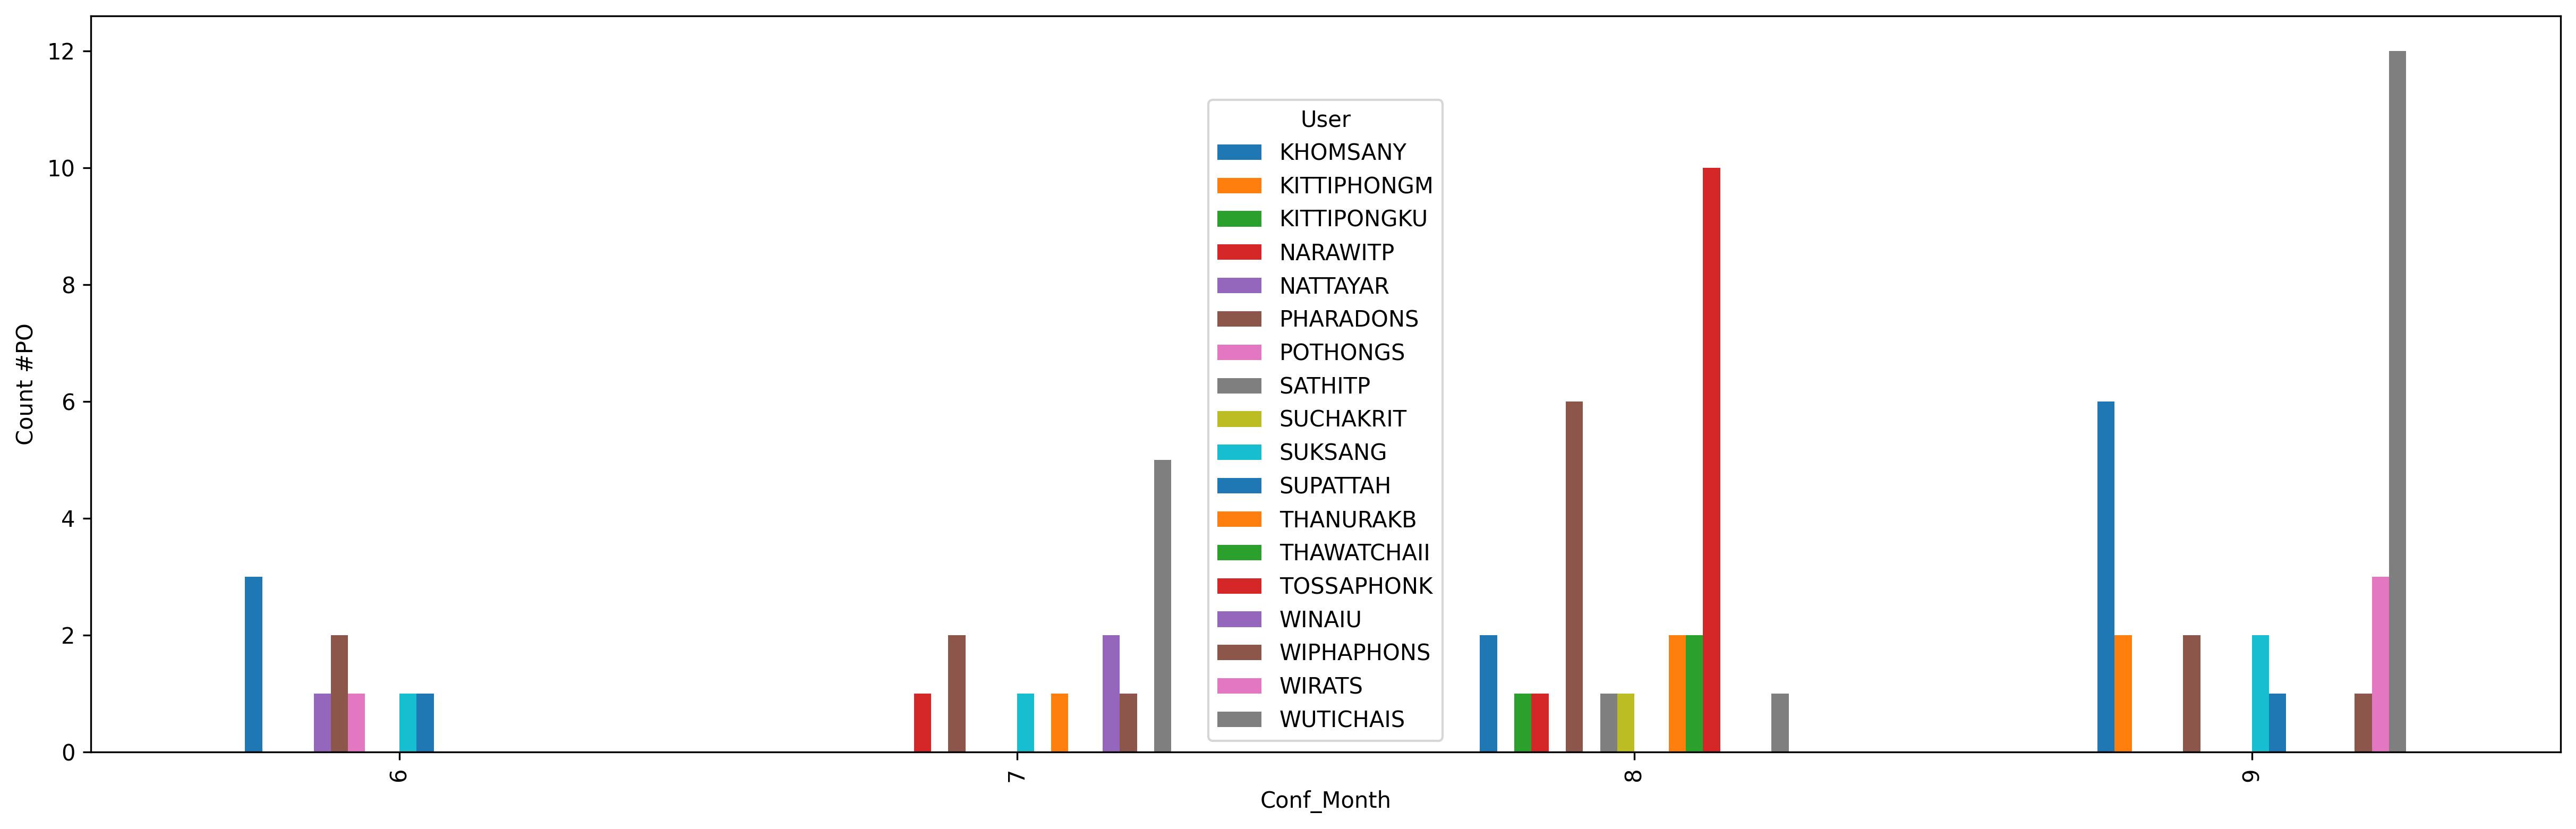

In [19]:
same_rack = put_trans_pick[put_trans_pick['S_Rack'] == put_trans_pick['Dest_Rack']]
print(same_rack['S_Rack'].unique())
print(same_rack.shape)

print('Percent of the source and destination rack are the same:', f'{same_rack.shape[0]*100/put_trans_pick.shape[0]:.3f}', '%')

User_same_rack = same_rack.loc[:,['User','Conf_Month']].pivot_table(index='Conf_Month', columns='User', 
                        aggfunc=len)

fig = plt.figure(figsize=(20,6),dpi=300)
ax = User_same_rack.plot.bar(ax=plt.axes())
ax.set_ylabel('Count #PO')
plt.show()


In [20]:
User = put_trans_pick['User'].unique()
print(User, '\n Number of user:', len(User))

['SUKSANG' 'THCGSUBCON30' 'WINAIU' 'ANUPHONS' 'TOSSAPHONK' 'MANOTM'
 'SUCHAKRIT' 'THCGSUBCON79' 'KHOMSANY' 'THIRAWITS' 'WIPHAPHONS'
 'THAWATCHAII' 'THANURAKB' 'BEELADENM' 'PHARADONS' 'WIRAYUTC' 'ATHIWATM'
 'KITTIPONGKU' 'SOMBOONL' 'RATTAPOLP' 'WUTICHAIM' 'NARAWITP' 'SIRIRATM'
 'KITTIPHONGM' 'PAYUTP' 'WIRATS' 'SAWANYAP' 'SUPATTAH' 'NATTPONT'
 'SATHITP' 'KRITSANAP' 'WUTICHAIS' 'NATTAPONC' 'NATTAYAR' 'POTHONGS'
 'PANYAWUTS' 'PAWEENAS'] 
 Number of user: 37


#### 2. Replenishment \
MTy = 998

##### Load data & clean

In [21]:
folder = 'Data/replenishment/'
df_Jun = import_csv(folder,'All_R089_June_2023')
df_July = import_csv(folder,'All_R089_July_2023')
df_Aug = import_csv(folder,'R089_31-08-2023')
df_Sep = import_csv(folder,'All_R089_Sep_2023')

In [22]:
df3 = pd.concat([df_Jun, df_July, df_Aug, df_Sep], axis=0, ignore_index = True)
#display(df3)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86043 entries, 0 to 86042
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WhN                   86043 non-null  object 
 1   TO Number.            86043 non-null  int64  
 2   Created On            86043 non-null  object 
 3   Time                  86043 non-null  object 
 4   MTy                   86043 non-null  int64  
 5   Group                 86043 non-null  int64  
 6   Description           86040 non-null  object 
 7   User Name             86043 non-null  object 
 8   Mat.Group             86040 non-null  object 
 9   Material              86040 non-null  float64
 10  Material Description  86040 non-null  object 
 11  Batch                 86040 non-null  object 
 12  S.Type                86040 non-null  object 
 13  Source BIN            86040 non-null  object 
 14  Dest.Type             86040 non-null  object 
 15  Dest.BIN           

In [23]:
df3.tail()

WhN  TO Number.  Created On      Time  MTy       Group  \
86038  T01    74780336  30.09.2023  21:14:50  998  2007420335   
86039  T01    74780341  30.09.2023  21:15:29  998  2007420310   
86040  T01    74780342  30.09.2023  21:15:29  998  2007420310   
86041  T01    74780346  30.09.2023  21:15:40  998  2007420311   
86042  T01    74780349  30.09.2023  21:15:50  998  2007420312   

                          Description   User Name Mat.Group     Material  ...  \
86038           W65-GT-NE-KN-RB-02/10  WIRATTANAK       207  121305750.0  ...   
86039       W12-BKK39-DKSH19-RB-02/10    WASANADU       207  121267493.0  ...   
86040       W12-BKK39-DKSH19-RB-02/10    WASANADU       207  121146614.0  ...   
86041  W26-CP-COMPLEX201-RTT-RB-02/10    WASANADU       207  121327543.0  ...   
86042  W26-CP-COMPLEX201-RTT-RH-02/10    WASANADU       207  120825027.0  ...   

      S.Type  Source BIN Dest.Type    Dest.BIN   Actual Qty Comp. Comp.time  \
86038    HH1  B32-022-03       HF2  B34-061-01          NaN     X  20:34:46   
86039    HH1  B14-081-04       HF2  B35-042-01          NaN     X  20:41:03   
86040    HH1  B21-131-04       HF2  B35-071-01          NaN     X  20:57:21   
86041    HH1  B27-181-02       HF2  B34-071-01          NaN     X  20:41:31   
86042    HH3  A19-261-06       HF3  A19-191-01          NaN     X  20:46:24   

        Comp.Date   Comp.by Actual Qty  
86038  30.09.2023     TIDAJ      120.0  
86039  30.09.2023   RACHANC      900.0  
86040  30.09.2023  YINGYOTY     1020.0  
86041  30.09.2023     TIDAJ     6336.0  
86042  30.09.2023     TIDAJ      864.0  

[5 rows x 22 columns]

In [24]:
# Drop unused col.
#df3.loc[df3["Comp."] != "X"]
replenish = df3.drop(['WhN', 'MTy', 'Mat.Group', 'Material Description', 'Batch', '  Actual Qty', 'Comp.'], axis=1)

# Get Datetime col.
replenish['Created On'] = replenish['Created On'].astype(str)
replenish['Time'] = replenish['Time'].astype(str)
replenish['Comp.time'] = replenish['Comp.time'].astype(str)
replenish['Comp.Date'] = replenish['Comp.Date'].astype(str)

replenish['Created_Datetime'] = pd.to_datetime(replenish['Created On'] + ' ' + replenish['Time'], dayfirst=True)
replenish['Comp._Datetime'] = pd.to_datetime(replenish['Comp.Date'] + ' ' + replenish['Comp.time'], dayfirst=True)

# Rearrange column 
col = replenish.pop("Created_Datetime")
replenish.insert(1, col.name, col)

# Drop col.
replenish = replenish.drop(['Created On', 'Time'], axis=1)
#replenish = replenish.drop(['Comp.Date', 'Comp.time'], axis=1)

replenish.info()
replenish.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86043 entries, 0 to 86042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TO Number.        86043 non-null  int64         
 1   Created_Datetime  86043 non-null  datetime64[ns]
 2   Group             86043 non-null  int64         
 3   Description       86040 non-null  object        
 4   User Name         86043 non-null  object        
 5   Material          86040 non-null  float64       
 6   S.Type            86040 non-null  object        
 7   Source BIN        86040 non-null  object        
 8   Dest.Type         86040 non-null  object        
 9   Dest.BIN          86040 non-null  object        
 10  Comp.time         86043 non-null  object        
 11  Comp.Date         86043 non-null  object        
 12  Comp.by           86043 non-null  object        
 13  Actual Qty        21574 non-null  float64       
 14  Comp._Datetime    8604

TO Number.    Created_Datetime       Group                Description  \
0    73396640 2023-06-01 09:12:47  2007265983    W00-040 PARAGON RH01/06   
1    73397689 2023-06-01 11:15:56  2007266106  W26-CJ-14-�Ҫ����RTT-02/06   
2    73397690 2023-06-01 11:15:57  2007266106  W26-CJ-14-�Ҫ����RTT-02/06   
3    73397781 2023-06-01 11:15:57  2007266106  W26-CJ-14-�Ҫ����RTT-02/06   
4    73397782 2023-06-01 11:15:57  2007266106  W26-CJ-14-�Ҫ����RTT-02/06   

   User Name     Material S.Type  Source BIN Dest.Type    Dest.BIN Comp.time  \
0  MANEERATP  121140450.0    HH3  A07-031-04       HF3  A15-041-01   8:18:53   
1  SUKANYASU  101208465.0    MH7  091-032-07       MF7  036-051-01  10:25:44   
2  SUKANYASU  100996390.0    MH5  055-024-04       MF3  P68-L02-01  10:56:33   
3  SUKANYASU  101158388.0    MH5  073-041-04       MF5  074-272-01  10:59:47   
4  SUKANYASU  101158388.0    MH5  073-091-04       MF5  074-272-01  10:55:34   

    Comp.Date    Comp.by  Actual Qty      Comp._Datetime  
0  01.06.2023   PRACHAUJ         NaN 2023-06-01 08:18:53  
1  01.06.2023  SUCHAKRIT         NaN 2023-06-01 10:25:44  
2  01.06.2023  SUCHAKRIT         NaN 2023-06-01 10:56:33  
3  01.06.2023  BEELADENM         NaN 2023-06-01 10:59:47  
4  01.06.2023   NARAWITP         NaN 2023-06-01 10:55:34

##### Find incorrect timestamp
Some created users, the time zone is set to be GMT+8 

In [25]:
#create time 'less than' complete time
less = replenish[replenish['Created_Datetime'] <= replenish['Comp._Datetime']]
#less.info()
print('less row#', len(less.index))

#create time 'more than' complete time
more = replenish[replenish['Created_Datetime'] > replenish['Comp._Datetime']]
#display(more)
#more.info()
print('more row#', len(more.index))

display(less['User Name'].unique())
print("count unique item in less's username", len(less['User Name'].unique()))
display(more['User Name'].unique())
print("count unique item in more's username", len(more['User Name'].unique()))
print("count unique item in replenish", len(replenish['User Name'].unique()))

less row# 45163
more row# 40880


array(['SUKANYASU', 'MANEERATP', 'SUPREYAPORNC', 'PHONGPANW',
       'SUTTHIKANNL', 'WASANADU', 'SIRIMANDP', 'WIRATTANAK', 'NATTAPONN',
       'SOMPORNS', 'PATTARAWIWAN', 'SOMRUETHAIN', 'AUTTHAPINYAS',
       'MEENAP', 'VASANAM', 'METHINEET', 'SIRINAT', 'SUWANNARATL',
       'WIMOLPANW'], dtype=object)

count unique item in less's username 19


array(['MANEERATP', 'SUKANYASU', 'SUPREYAPORNC', 'PHONGPANW',
       'SUTTHIKANNL', 'NATTAPONN', 'WASANADU', 'SIRIMANDP', 'WIRATTANAK',
       'SOMRUETHAIN', 'SOMPORNS', 'PATTARAWIWAN', 'AUTTHAPINYAS',
       'VASANAM', 'METHINEET', 'SUWANNARATL'], dtype=object)

count unique item in more's username 16
count unique item in replenish 19


In [26]:
less.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45163 entries, 14 to 86034
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TO Number.        45163 non-null  int64         
 1   Created_Datetime  45163 non-null  datetime64[ns]
 2   Group             45163 non-null  int64         
 3   Description       45160 non-null  object        
 4   User Name         45163 non-null  object        
 5   Material          45160 non-null  float64       
 6   S.Type            45160 non-null  object        
 7   Source BIN        45160 non-null  object        
 8   Dest.Type         45160 non-null  object        
 9   Dest.BIN          45160 non-null  object        
 10  Comp.time         45163 non-null  object        
 11  Comp.Date         45163 non-null  object        
 12  Comp.by           45163 non-null  object        
 13  Actual Qty        10788 non-null  float64       
 14  Comp._Datetime    45163 no

In [27]:
#less.loc[:, ['Created_Datetime', 'User Name']]
less.loc[:,'Created_Date'] = less.loc[:,'Created_Datetime'].dt.date
less.loc[:,'Created_month'] = less.loc[:,'Created_Datetime'].dt.month
less = less.drop(['TO Number.' ,'Group' , 'Description', 'Material', 'S.Type', 'Source BIN', 'Dest.Type', 'Dest.BIN'], axis=1)
less

C:\Users\Lenovo Legion\AppData\Local\Temp\ipykernel_23108\3675399976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  less.loc[:,'Created_Date'] = less.loc[:,'Created_Datetime'].dt.date
C:\Users\Lenovo Legion\AppData\Local\Temp\ipykernel_23108\3675399976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  less.loc[:,'Created_month'] = less.loc[:,'Created_Datetime'].dt.month


Created_Datetime     User Name Comp.time   Comp.Date      Comp.by  \
14    2023-06-01 11:16:01     SUKANYASU  11:34:25  01.06.2023    AURAIWANB   
15    2023-06-01 11:16:01     SUKANYASU  11:31:08  01.06.2023    AURAIWANB   
17    2023-06-01 11:20:31     MANEERATP  11:21:19  01.06.2023    AURAIWANB   
29    2023-06-01 11:56:59  SUPREYAPORNC  13:33:37  01.06.2023     SIRIRATM   
30    2023-06-01 11:57:13  SUPREYAPORNC  14:42:44  01.06.2023     SIRIRATM   
...                   ...           ...       ...         ...          ...   
86014 2023-09-30 15:55:20     SUKANYASU  16:05:30  30.09.2023      SUKSANG   
86015 2023-09-30 15:55:41     SUKANYASU  16:30:41  30.09.2023    SUCHAKRIT   
86016 2023-09-30 15:55:42     SUKANYASU  17:16:50  30.09.2023  KITTIPONGKU   
86030 2023-09-30 21:14:07    WIRATTANAK  21:15:10  30.09.2023        TIDAJ   
86034 2023-09-30 21:14:08    WIRATTANAK  21:16:54  30.09.2023        TIDAJ   

       Actual Qty      Comp._Datetime Created_Date  Created_month  
14            NaN 2023-06-01 11:34:25   2023-06-01              6  
15            NaN 2023-06-01 11:31:08   2023-06-01              6  
17            NaN 2023-06-01 11:21:19   2023-06-01              6  
29            NaN 2023-06-01 13:33:37   2023-06-01              6  
30            NaN 2023-06-01 14:42:44   2023-06-01              6  
...           ...                 ...          ...            ...  
86014      8640.0 2023-09-30 16:05:30   2023-09-30              9  
86015      9180.0 2023-09-30 16:30:41   2023-09-30              9  
86016      9072.0 2023-09-30 17:16:50   2023-09-30              9  
86030       900.0 2023-09-30 21:15:10   2023-09-30              9  
86034       456.0 2023-09-30 21:16:54   2023-09-30              9  

[45163 rows x 9 columns]

In [28]:
less['Created_month'].unique()

array([ 6,  7,  8,  9, 10,  1])

##### Select data only the focus area

In [29]:
focus_replenish = replenish.loc[:,['TO Number.', 'S.Type', 'Source BIN', 'Dest.Type', 'Dest.BIN', 'Comp.by', 'Comp._Datetime', 'Comp.time',	'Comp.Date']].copy()

# Add Month column
focus_replenish['Comp_Month'] = focus_replenish['Comp._Datetime'].dt.month

# Add S_Rack & Dest_Rack
focus_replenish['Source BIN'] = focus_replenish['Source BIN'].astype(str)
focus_replenish['S_Rack'] = focus_replenish['Source BIN'].apply(lambda x: custom_slice(x, 'rack'))

focus_replenish['Dest.BIN'] = focus_replenish['Dest.BIN'].astype(str)
focus_replenish['Dest_Rack'] = focus_replenish['Dest.BIN'].apply(lambda x: custom_slice(x, 'rack'))

# Add Activity column
focus_replenish['Activity'] = 'Replenishment'

# Add S_level and Dest_level column
focus_replenish['S_level'] = focus_replenish['Source BIN'].apply(lambda x: x[-2:] if '-' in x else '01')
focus_replenish['Dest_level'] = focus_replenish['Dest.BIN'].apply(lambda x: x[-2:] if '-' in x else '01')
focus_replenish

TO Number. S.Type  Source BIN Dest.Type    Dest.BIN    Comp.by  \
0        73396640    HH3  A07-031-04       HF3  A15-041-01   PRACHAUJ   
1        73397689    MH7  091-032-07       MF7  036-051-01  SUCHAKRIT   
2        73397690    MH5  055-024-04       MF3  P68-L02-01  SUCHAKRIT   
3        73397781    MH5  073-041-04       MF5  074-272-01  BEELADENM   
4        73397782    MH5  073-091-04       MF5  074-272-01   NARAWITP   
...           ...    ...         ...       ...         ...        ...   
86038    74780336    HH1  B32-022-03       HF2  B34-061-01      TIDAJ   
86039    74780341    HH1  B14-081-04       HF2  B35-042-01    RACHANC   
86040    74780342    HH1  B21-131-04       HF2  B35-071-01   YINGYOTY   
86041    74780346    HH1  B27-181-02       HF2  B34-071-01      TIDAJ   
86042    74780349    HH3  A19-261-06       HF3  A19-191-01      TIDAJ   

           Comp._Datetime Comp.time   Comp.Date  Comp_Month S_Rack Dest_Rack  \
0     2023-06-01 08:18:53   8:18:53  01.06.2023           6    A07       A15   
1     2023-06-01 10:25:44  10:25:44  01.06.2023           6    091       036   
2     2023-06-01 10:56:33  10:56:33  01.06.2023           6    055       P68   
3     2023-06-01 10:59:47  10:59:47  01.06.2023           6    073       074   
4     2023-06-01 10:55:34  10:55:34  01.06.2023           6    073       074   
...                   ...       ...         ...         ...    ...       ...   
86038 2023-09-30 20:34:46  20:34:46  30.09.2023           9    B32       B34   
86039 2023-09-30 20:41:03  20:41:03  30.09.2023           9    B14       B35   
86040 2023-09-30 20:57:21  20:57:21  30.09.2023           9    B21       B35   
86041 2023-09-30 20:41:31  20:41:31  30.09.2023           9    B27       B34   
86042 2023-09-30 20:46:24  20:46:24  30.09.2023           9    A19       A19   

            Activity S_level Dest_level  
0      Replenishment      04         01  
1      Replenishment      07         01  
2      Replenishment      04         01  
3      Replenishment      04         01  
4      Replenishment      04         01  
...              ...     ...        ...  
86038  Replenishment      03         01  
86039  Replenishment      04         01  
86040  Replenishment      04         01  
86041  Replenishment      02         01  
86042  Replenishment      06         01  

[86043 rows x 15 columns]

In [30]:
print(list(focus_replenish.loc[:,'S.Type'].unique()))
print(list(focus_replenish.loc[:,'Dest.Type'].unique()))

['HH3', 'MH7', 'MH5', 'MH3', 'MI6', 'AK1', 'AH1', 'HH1', 'MH4', 'MI8', 'MH8', 'HH2', 'MO1', nan]
['HF3', 'MF7', 'MF3', 'MF5', 'MF8', 'AF2', 'HF2', 'AF1', 'HF4', nan]


###### Drop Nan

In [31]:
# Find out why have NaN in S.Type & Dest.Type column
display(focus_replenish[(focus_replenish['S.Type'].isna()) | (focus_replenish['Dest.Type'].isna())])
# Drop NaN row
focus_replenish.dropna(subset = ['S.Type', 'Dest.Type'], inplace=True)

focus_replenish

TO Number. S.Type Source BIN Dest.Type Dest.BIN       Comp.by  \
42950    73538277    NaN        nan       NaN      nan     PHARADONS   
64470    73755177    NaN        nan       NaN      nan      SIRIRATM   
77898    74661477    NaN        nan       NaN      nan  NATTHAPHONGS   

           Comp._Datetime Comp.time   Comp.Date  Comp_Month S_Rack Dest_Rack  \
42950 2023-08-11 22:11:18  22:11:18  11.08.2023           8  dummy     dummy   
64470 2023-09-02 14:46:59  14:46:59  02.09.2023           9  dummy     dummy   
77898 2023-09-21 02:14:46   2:14:46  21.09.2023           9  dummy     dummy   

            Activity S_level Dest_level  
42950  Replenishment      01         01  
64470  Replenishment      01         01  
77898  Replenishment      01         01

TO Number. S.Type  Source BIN Dest.Type    Dest.BIN    Comp.by  \
0        73396640    HH3  A07-031-04       HF3  A15-041-01   PRACHAUJ   
1        73397689    MH7  091-032-07       MF7  036-051-01  SUCHAKRIT   
2        73397690    MH5  055-024-04       MF3  P68-L02-01  SUCHAKRIT   
3        73397781    MH5  073-041-04       MF5  074-272-01  BEELADENM   
4        73397782    MH5  073-091-04       MF5  074-272-01   NARAWITP   
...           ...    ...         ...       ...         ...        ...   
86038    74780336    HH1  B32-022-03       HF2  B34-061-01      TIDAJ   
86039    74780341    HH1  B14-081-04       HF2  B35-042-01    RACHANC   
86040    74780342    HH1  B21-131-04       HF2  B35-071-01   YINGYOTY   
86041    74780346    HH1  B27-181-02       HF2  B34-071-01      TIDAJ   
86042    74780349    HH3  A19-261-06       HF3  A19-191-01      TIDAJ   

           Comp._Datetime Comp.time   Comp.Date  Comp_Month S_Rack Dest_Rack  \
0     2023-06-01 08:18:53   8:18:53  01.06.2023           6    A07       A15   
1     2023-06-01 10:25:44  10:25:44  01.06.2023           6    091       036   
2     2023-06-01 10:56:33  10:56:33  01.06.2023           6    055       P68   
3     2023-06-01 10:59:47  10:59:47  01.06.2023           6    073       074   
4     2023-06-01 10:55:34  10:55:34  01.06.2023           6    073       074   
...                   ...       ...         ...         ...    ...       ...   
86038 2023-09-30 20:34:46  20:34:46  30.09.2023           9    B32       B34   
86039 2023-09-30 20:41:03  20:41:03  30.09.2023           9    B14       B35   
86040 2023-09-30 20:57:21  20:57:21  30.09.2023           9    B21       B35   
86041 2023-09-30 20:41:31  20:41:31  30.09.2023           9    B27       B34   
86042 2023-09-30 20:46:24  20:46:24  30.09.2023           9    A19       A19   

            Activity S_level Dest_level  
0      Replenishment      04         01  
1      Replenishment      07         01  
2      Replenishment      04         01  
3      Replenishment      04         01  
4      Replenishment      04         01  
...              ...     ...        ...  
86038  Replenishment      03         01  
86039  Replenishment      04         01  
86040  Replenishment      04         01  
86041  Replenishment      02         01  
86042  Replenishment      06         01  

[86040 rows x 15 columns]

###### Add Column

In [32]:
#Add rack column
focus_replenish['S_Rack_num'] = focus_replenish['Source BIN'].str.slice(0, 3)
focus_replenish['Dest_Rack_num'] = focus_replenish['Dest.BIN'].str.slice(0, 3)

#Rearrange column
col = focus_replenish.pop("S_Rack_num")
focus_replenish.insert(2, col.name, col)
col = focus_replenish.pop("Dest_Rack_num")
focus_replenish.insert(5, col.name, col)

focus_replenish

TO Number. S.Type S_Rack_num  Source BIN Dest.Type Dest_Rack_num  \
0        73396640    HH3        A07  A07-031-04       HF3           A15   
1        73397689    MH7        091  091-032-07       MF7           036   
2        73397690    MH5        055  055-024-04       MF3           P68   
3        73397781    MH5        073  073-041-04       MF5           074   
4        73397782    MH5        073  073-091-04       MF5           074   
...           ...    ...        ...         ...       ...           ...   
86038    74780336    HH1        B32  B32-022-03       HF2           B34   
86039    74780341    HH1        B14  B14-081-04       HF2           B35   
86040    74780342    HH1        B21  B21-131-04       HF2           B35   
86041    74780346    HH1        B27  B27-181-02       HF2           B34   
86042    74780349    HH3        A19  A19-261-06       HF3           A19   

         Dest.BIN    Comp.by      Comp._Datetime Comp.time   Comp.Date  \
0      A15-041-01   PRACHAUJ 2023-06-01 08:18:53   8:18:53  01.06.2023   
1      036-051-01  SUCHAKRIT 2023-06-01 10:25:44  10:25:44  01.06.2023   
2      P68-L02-01  SUCHAKRIT 2023-06-01 10:56:33  10:56:33  01.06.2023   
3      074-272-01  BEELADENM 2023-06-01 10:59:47  10:59:47  01.06.2023   
4      074-272-01   NARAWITP 2023-06-01 10:55:34  10:55:34  01.06.2023   
...           ...        ...                 ...       ...         ...   
86038  B34-061-01      TIDAJ 2023-09-30 20:34:46  20:34:46  30.09.2023   
86039  B35-042-01    RACHANC 2023-09-30 20:41:03  20:41:03  30.09.2023   
86040  B35-071-01   YINGYOTY 2023-09-30 20:57:21  20:57:21  30.09.2023   
86041  B34-071-01      TIDAJ 2023-09-30 20:41:31  20:41:31  30.09.2023   
86042  A19-191-01      TIDAJ 2023-09-30 20:46:24  20:46:24  30.09.2023   

       Comp_Month S_Rack Dest_Rack       Activity S_level Dest_level  
0               6    A07       A15  Replenishment      04         01  
1               6    091       036  Replenishment      07         01  
2               6    055       P68  Replenishment      04         01  
3               6    073       074  Replenishment      04         01  
4               6    073       074  Replenishment      04         01  
...           ...    ...       ...            ...     ...        ...  
86038           9    B32       B34  Replenishment      03         01  
86039           9    B14       B35  Replenishment      04         01  
86040           9    B21       B35  Replenishment      04         01  
86041           9    B27       B34  Replenishment      02         01  
86042           9    A19       A19  Replenishment      06         01  

[86040 rows x 17 columns]

###### Select row of focused area

In [33]:
#Focus on MH8 or MF8 Type and only rack 20 - 22

focus_replenish = focus_replenish[
    ((focus_replenish['S.Type'].str.contains('MH8|MF8', case=False)) |
    (focus_replenish['Dest.Type'].str.contains('MH8|MF8', case=False))) & 
    ((focus_replenish['S_Rack_num'].isin(['020', '021', '022'])) |
    (focus_replenish['Dest_Rack_num'].isin(['020', '021', '022'])))
]

focus_replenish

TO Number. S.Type S_Rack_num  Source BIN Dest.Type Dest_Rack_num  \
16       73397835    MI6        081  081-420-01       MF8           021   
121      73399056    MH8        022  022-262-05       MF8           021   
122      73399057    MH8        020  020-291-07       MF8           022   
184      73400630    MI6        080  080-260-01       MF8           021   
226      73401326    MH8        020  020-082-06       MF8           046   
...           ...    ...        ...         ...       ...           ...   
85942    74777387    MI6        050  050-131-01       MF8           021   
85949    74777427    MI6        050  050-501-01       MF8           021   
85976    74777839    MI6        049  049-240-01       MF8           021   
85988    74777990    MI6        050  050-131-01       MF8           021   
86003    74778088    MH8        023  023-182-05       MF8           022   

         Dest.BIN    Comp.by      Comp._Datetime Comp.time   Comp.Date  \
16     021-052-01   KHOMSANY 2023-06-01 10:28:23  10:28:23  01.06.2023   
121    021-011-01   KHOMSANY 2023-06-01 13:14:26  13:14:26  01.06.2023   
122    022-211-01  PHARADONS 2023-06-01 13:15:36  13:15:36  01.06.2023   
184    021-092-01  SUCHAKRIT 2023-06-01 14:46:30  14:46:30  01.06.2023   
226    046-022-01  PHARADONS 2023-06-01 15:12:49  15:12:49  01.06.2023   
...           ...        ...                 ...       ...         ...   
85942  021-052-01  SUCHAKRIT 2023-09-30 14:26:19  14:26:19  30.09.2023   
85949  021-092-01    SUKSANG 2023-09-30 15:51:20  15:51:20  30.09.2023   
85976  021-271-01    SUKSANG 2023-09-30 16:09:07  16:09:07  30.09.2023   
85988  021-052-01  SUCHAKRIT 2023-09-30 17:09:07  17:09:07  30.09.2023   
86003  022-161-01    SUKSANG 2023-09-30 15:10:29  15:10:29  30.09.2023   

       Comp_Month S_Rack Dest_Rack       Activity S_level Dest_level  
16              6    081       021  Replenishment      01         01  
121             6    022       021  Replenishment      05         01  
122             6    020       022  Replenishment      07         01  
184             6    080       021  Replenishment      01         01  
226             6    020       046  Replenishment      06         01  
...           ...    ...       ...            ...     ...        ...  
85942           9    050       021  Replenishment      01         01  
85949           9    050       021  Replenishment      01         01  
85976           9    049       021  Replenishment      01         01  
85988           9    050       021  Replenishment      01         01  
86003           9    023       022  Replenishment      05         01  

[3169 rows x 17 columns]

##### Analyze and visualize

In [34]:
print('total driver, replenishment work which in focused area =', len(list(focus_replenish['Comp.by'].unique())))

print(focus_replenish['S.Type'].unique())
print(focus_replenish['Dest.Type'].unique())


total driver, replenishment work which in focused area = 37
['MI6' 'MH8' 'MH7' 'MH4' 'MO1' 'MI8']
['MF8' 'MF5']


In [35]:
# MO1 = Overflow
MO1 = focus_replenish[focus_replenish['S.Type'] == 'MO1']
MO1

TO Number. S.Type S_Rack_num  Source BIN Dest.Type Dest_Rack_num  \
20956    73502175    MO1        TF-     TF-BN20       MF8           022   
20957    73505047    MO1        TF-     TF-BN20       MF8           022   
29269    73886049    MO1        DRI  DRIVEIN-48       MF8           022   
29584    73887513    MO1        DRI  DRIVEIN-48       MF8           022   
30425    73900018    MO1        DRI  DRIVEIN-48       MF8           022   
33329    73948312    MO1        DOO    DOOR-023       MF8           021   
34096    73958843    MO1        DOO    DOOR-023       MF8           021   
34097    73958844    MO1        DOO    DOOR-023       MF8           022   
51802    74226197    MO1        DOO    DOOR-046       MF8           022   
52775    74244199    MO1        DOO    DOOR-046       MF8           022   
53062    74248123    MO1        DOO    DOOR-046       MF8           022   
53703    74259185    MO1        DOO    DOOR-046       MF8           021   
57901    74340946    MO1        DOO    DOOR-046       MF8           021   
58604    74353319    MO1        DRI  DRIVEIN-81       MF8           021   
58800    74356068    MO1        DRI  DRIVEIN-81       MF8           021   
59302    74364832    MO1        DRI  DRIVEIN-81       MF8           021   
59413    74365730    MO1        DRI  DRIVEIN-81       MF8           021   
59569    74368408    MO1        DRI  DRIVEIN-81       MF8           021   
59847    74372561    MO1        DRI  DRIVEIN-81       MF8           021   
59874    74373693    MO1        DRI  DRIVEIN-81       MF8           021   
60381    74381976    MO1        DRI  DRIVEIN-81       MF8           021   
60513    74383807    MO1        DRI  DRIVEIN-81       MF8           021   
60867    74388688    MO1        DRI  DRIVEIN-81       MF8           021   
60970    74389716    MO1        DOO    DOOR-046       MF8           021   
60971    74389717    MO1        DRI  DRIVEIN-81       MF8           021   
67222    74491726    MO1        D40  D40-001-03       MF8           021   
67408    74494268    MO1        D45  D45-010-04       MF8           021   

         Dest.BIN      Comp.by      Comp._Datetime Comp.time   Comp.Date  \
20956  022-071-01   TOSSAPHONK 2023-07-05 02:33:20   2:33:20  05.07.2023   
20957  022-071-01   TOSSAPHONK 2023-07-05 02:34:00   2:34:00  05.07.2023   
29269  022-131-01    PHARADONS 2023-07-14 06:45:44   6:45:44  14.07.2023   
29584  022-131-01    PHARADONS 2023-07-14 06:45:30   6:45:30  14.07.2023   
30425  022-131-01   TOSSAPHONK 2023-07-15 10:19:30  10:19:30  15.07.2023   
33329  021-261-01      SUKSANG 2023-07-19 22:36:52  22:36:52  19.07.2023   
34096  021-141-01    WUTICHAIM 2023-07-20 21:49:32  21:49:32  20.07.2023   
34097  022-301-01      SUKSANG 2023-07-21 05:08:07   5:08:07  21.07.2023   
51802  022-161-01    PHARADONS 2023-08-14 23:36:18  23:36:18  14.08.2023   
52775  022-161-01     KHOMSANY 2023-08-16 05:11:42   5:11:42  16.08.2023   
53062  022-161-01    THIRAWITS 2023-08-16 14:57:59  14:57:59  16.08.2023   
53703  021-011-01  THAWATCHAII 2023-08-17 10:53:53  10:53:53  17.08.2023   
57901  021-011-01    PHARADONS 2023-08-23 12:18:19  12:18:19  23.08.2023   
58604  021-081-01      SUKSANG 2023-08-24 11:32:07  11:32:07  24.08.2023   
58800  021-081-01      SUKSANG 2023-08-24 11:31:57  11:31:57  24.08.2023   
59302  021-081-01    THIRAWITS 2023-08-25 02:17:38   2:17:38  25.08.2023   
59413  021-081-01    THIRAWITS 2023-08-25 02:20:50   2:20:50  25.08.2023   
59569  021-081-01    THIRAWITS 2023-08-25 05:44:11   5:44:11  25.08.2023   
59847  021-081-01       PAYUTP 2023-08-25 15:16:57  15:16:57  25.08.2023   
59874  021-081-01       PAYUTP 2023-08-25 15:18:21  15:18:21  25.08.2023   
60381  021-081-01     WIRAYUTC 2023-08-25 23:03:49  23:03:49  25.08.2023   
60513  021-081-01     WIRAYUTC 2023-08-26 02:21:14   2:21:14  26.08.2023   
60867  021-081-01      SUKSANG 2023-08-26 11:24:03  11:24:03  26.08.2023   
60970  021-011-01      SUKSANG 2023-08-26 13:28:50  13:28:50  26.08.2023   
60971 

In [36]:
focus_replenish2 = focus_replenish.loc[:,['TO Number.', 'S.Type', 'Comp.by']].copy()
focus_replenish2

TO Number. S.Type    Comp.by
16       73397835    MI6   KHOMSANY
121      73399056    MH8   KHOMSANY
122      73399057    MH8  PHARADONS
184      73400630    MI6  SUCHAKRIT
226      73401326    MH8  PHARADONS
...           ...    ...        ...
85942    74777387    MI6  SUCHAKRIT
85949    74777427    MI6    SUKSANG
85976    74777839    MI6    SUKSANG
85988    74777990    MI6  SUCHAKRIT
86003    74778088    MH8    SUKSANG

[3169 rows x 3 columns]

count
S.Type       
MH4        20
MH7       178
MH8      1865
MI6      1053
MI8        26
MO1        27

Total count of all driver from each source location


<AxesSubplot: xlabel='S.Type'>

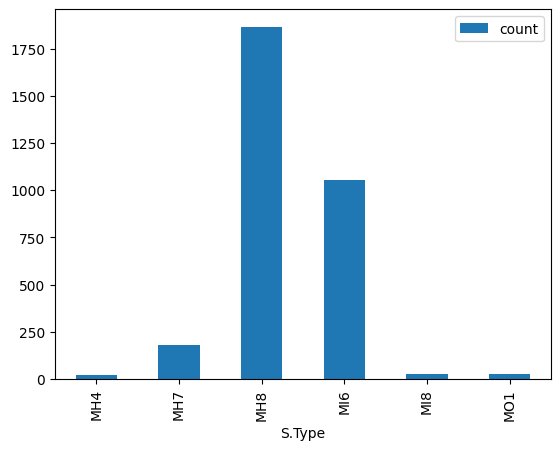

In [37]:
display(focus_replenish2.groupby('S.Type')['Comp.by'].agg(['count']))
print("Total count of all driver from each source location")
focus_replenish2.groupby('S.Type')['Comp.by'].agg(['count']).plot(kind='bar')

Comp.by  ANUPHONS  ATHIWATM  BEELADENM  KHOMSANY  KITTIPHONGM  KITTIPONGKU  \
S.Type                                                                       
MH4           0.0       0.0        0.0       1.0          4.0          1.0   
MH7           1.0       0.0       13.0       4.0          1.0          5.0   
MH8           6.0       3.0       66.0     261.0          6.0         15.0   
MI6           8.0       6.0       24.0     120.0         24.0          3.0   
MI8           0.0       0.0        2.0       1.0          0.0          0.0   
MO1           0.0       0.0        0.0       2.0          0.0          0.0   

Comp.by  KRITSANAP  MANOTM  NARAWITP  NATTAPONC  ...  THCGSUBCON30  \
S.Type                                           ...                 
MH4            0.0     0.0       0.0        1.0  ...           0.0   
MH7            3.0     0.0       0.0        0.0  ...           0.0   
MH8          216.0     5.0      18.0       11.0  ...           4.0   
MI6            0.0    33.0      62.0       17.0  ...           1.0   
MI8            0.0     0.0       1.0        0.0  ...           0.0   
MO1            0.0     0.0       0.0        0.0  ...           0.0   

Comp.by  THCGSUBCON79  THIRAWITS  TOSSAPHONK  WINAIU  WIPHAPHONS  WIRATS  \
S.Type                                                                     
MH4               0.0        0.0         0.0     0.0         1.0     0.0   
MH7               0.0       10.0        31.0     0.0         0.0    11.0   
MH8              11.0      220.0        87.0     6.0         2.0    15.0   
MI6               1.0       46.0        85.0    54.0         7.0    25.0   
MI8               0.0        2.0         0.0     0.0         0.0     1.0   
MO1               0.0        4.0         3.0     0.0         0.0     0.0   

Comp.by  WIRAYUTC  WUTICHAIM  WUTICHAIS  
S.Type                                   
MH4           0.0        5.0        0.0  
MH7           0.0        0.0        0.0  
MH8          10.0        3.0        0.0  
MI6          43.0       12.0        3.0  
MI8           2.0        0.0        0.0  
MO1           2.0        1.0        0.0  

[6 rows x 37 columns]

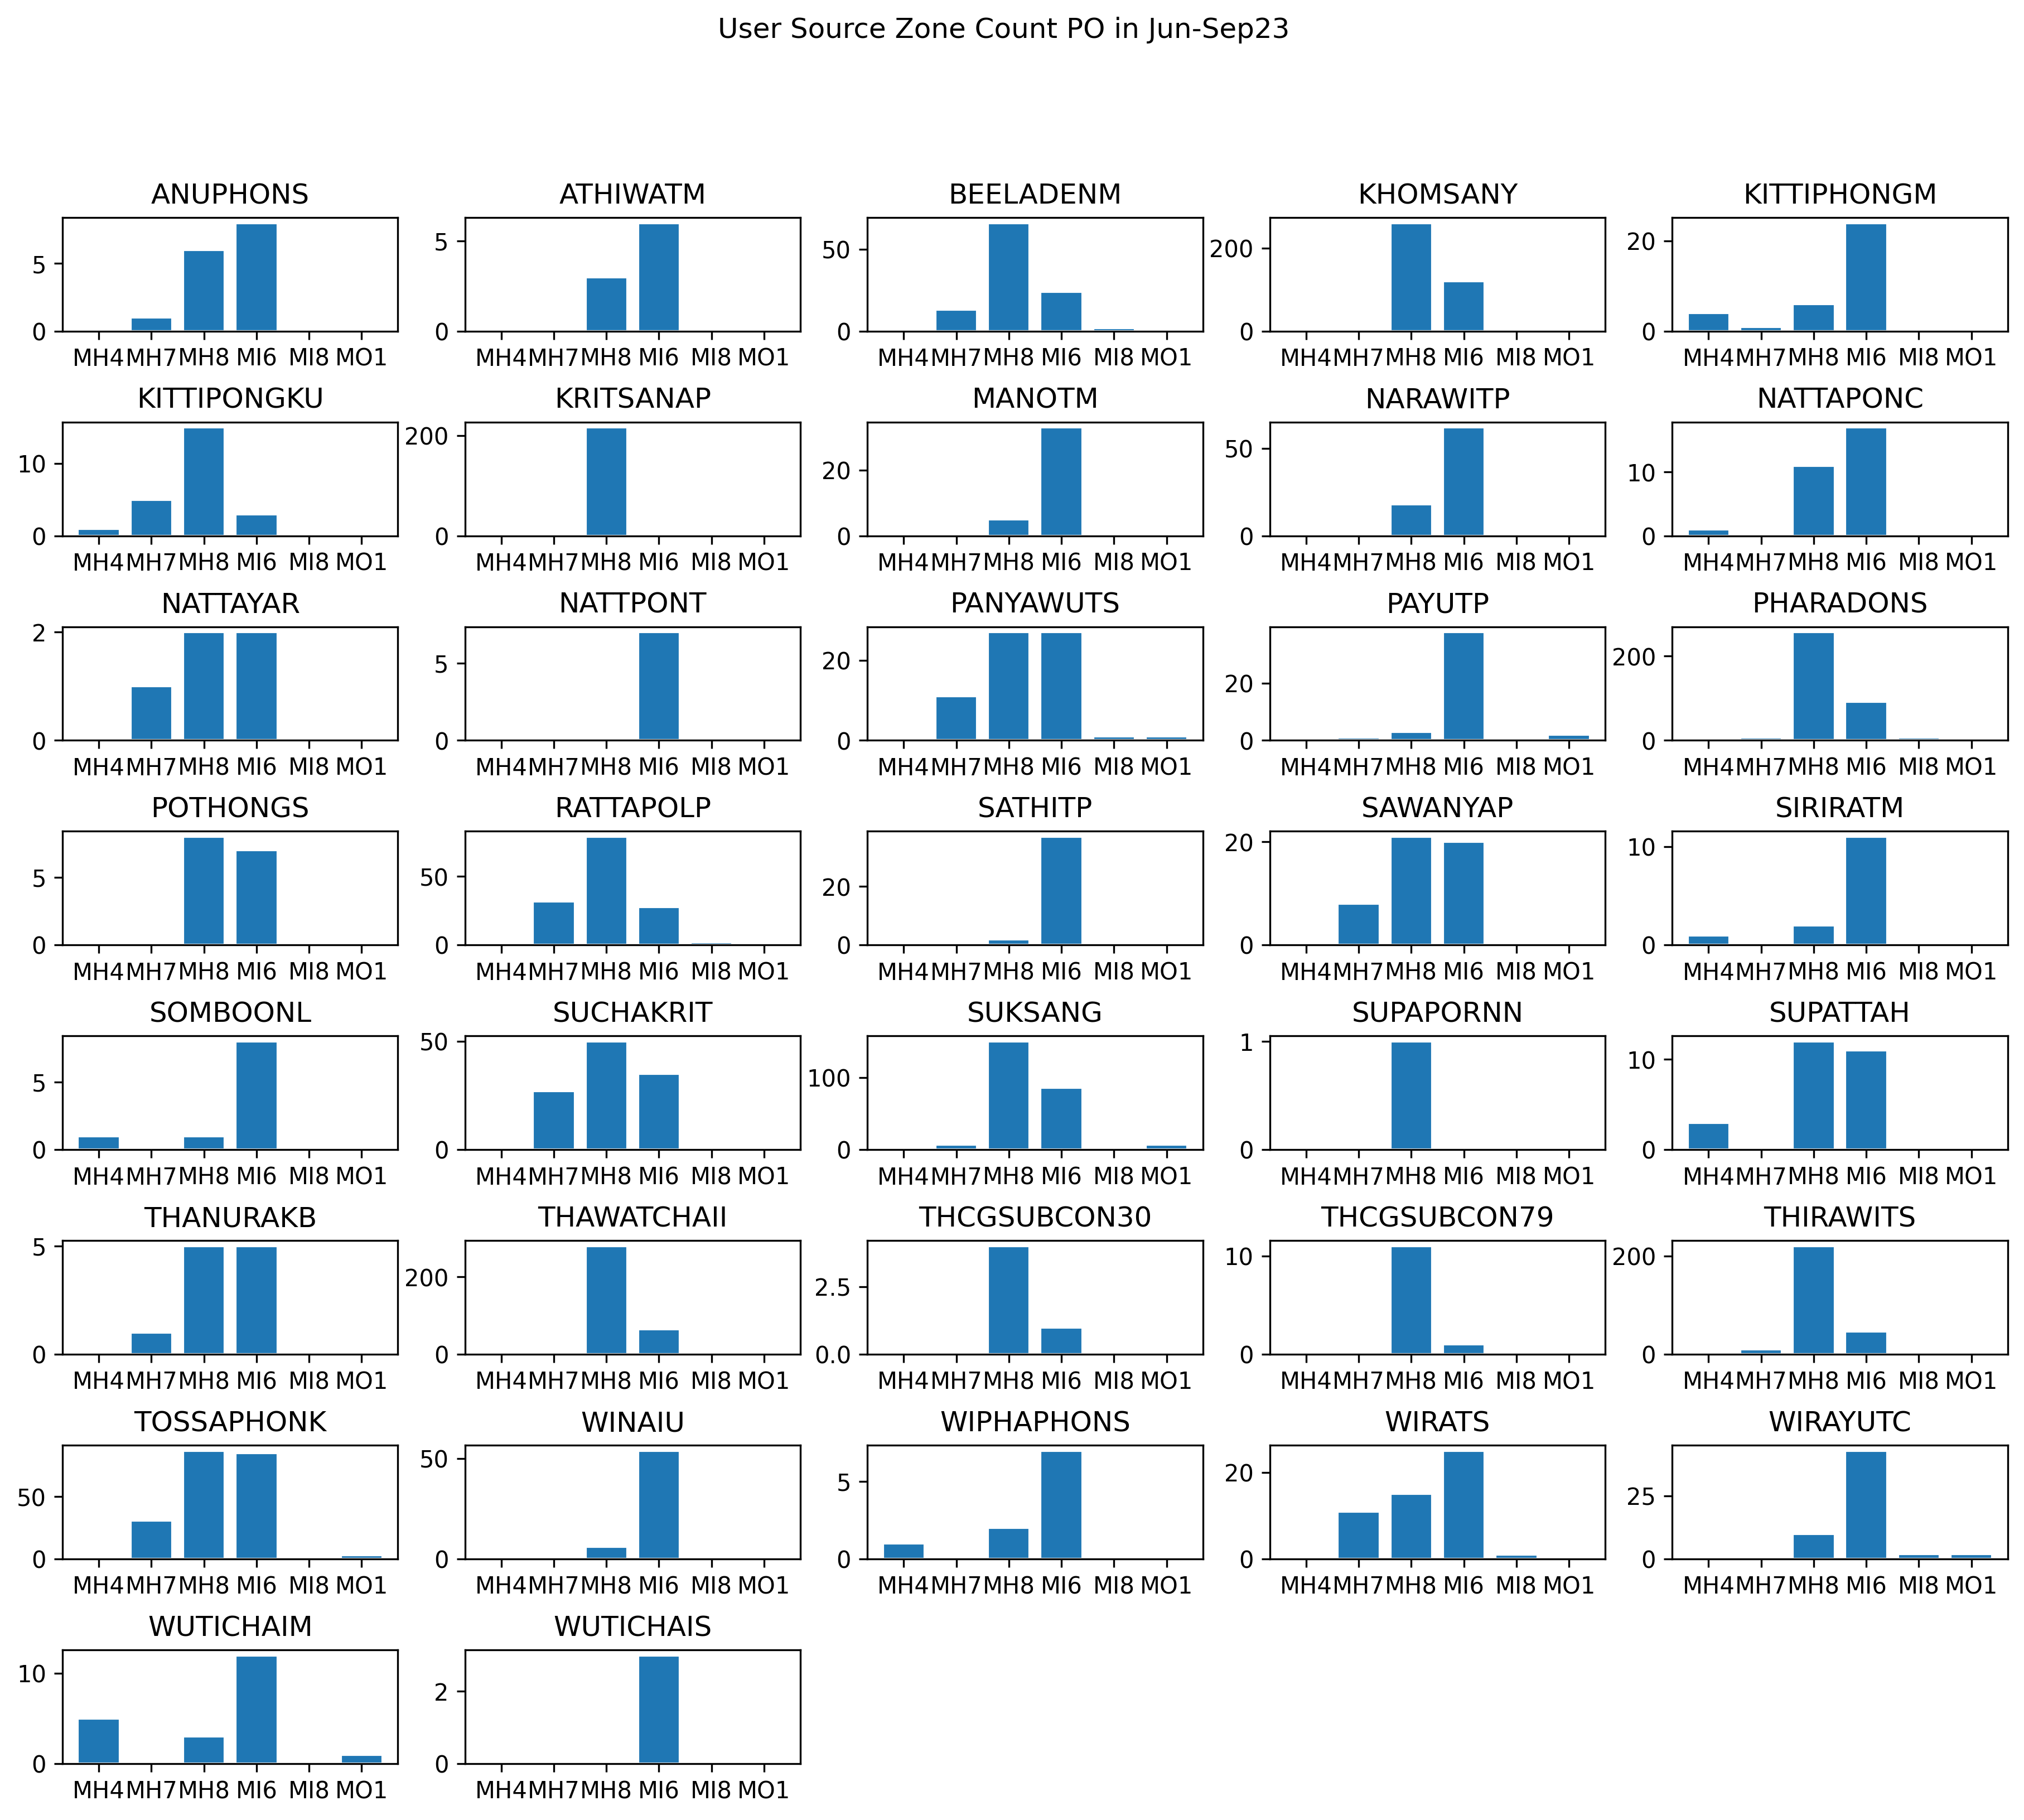

In [38]:
# For each driver from each source
pivot_reple = focus_replenish2.pivot_table(index='S.Type', columns='Comp.by', values='TO Number.', aggfunc='count')
pivot_reple.reset_index()
pivot_reple = pivot_reple.fillna(0)
display(pivot_reple)
num_columns = pivot_reple.shape[1]
column_names_list = pivot_reple.columns.tolist()
row_names_list = pivot_reple.index.tolist()

row = 8
col = 5

fig = plt.figure(figsize=(15,12),dpi=300)
fig.suptitle('User Source Zone Count PO in Jun-Sep23')
fig.subplots_adjust(hspace=0.8, wspace=0.2)
fig.add_subplot(row, col, num_columns)

for i in range(1,num_columns+1):
    ax = plt.subplot(row, col, i)
    ax.set_title(f"{column_names_list[i-1]}")
    ax.bar(row_names_list,pivot_reple.iloc[:,i-1], edgecolor = "white",linewidth=1.0)

To be at same y scale

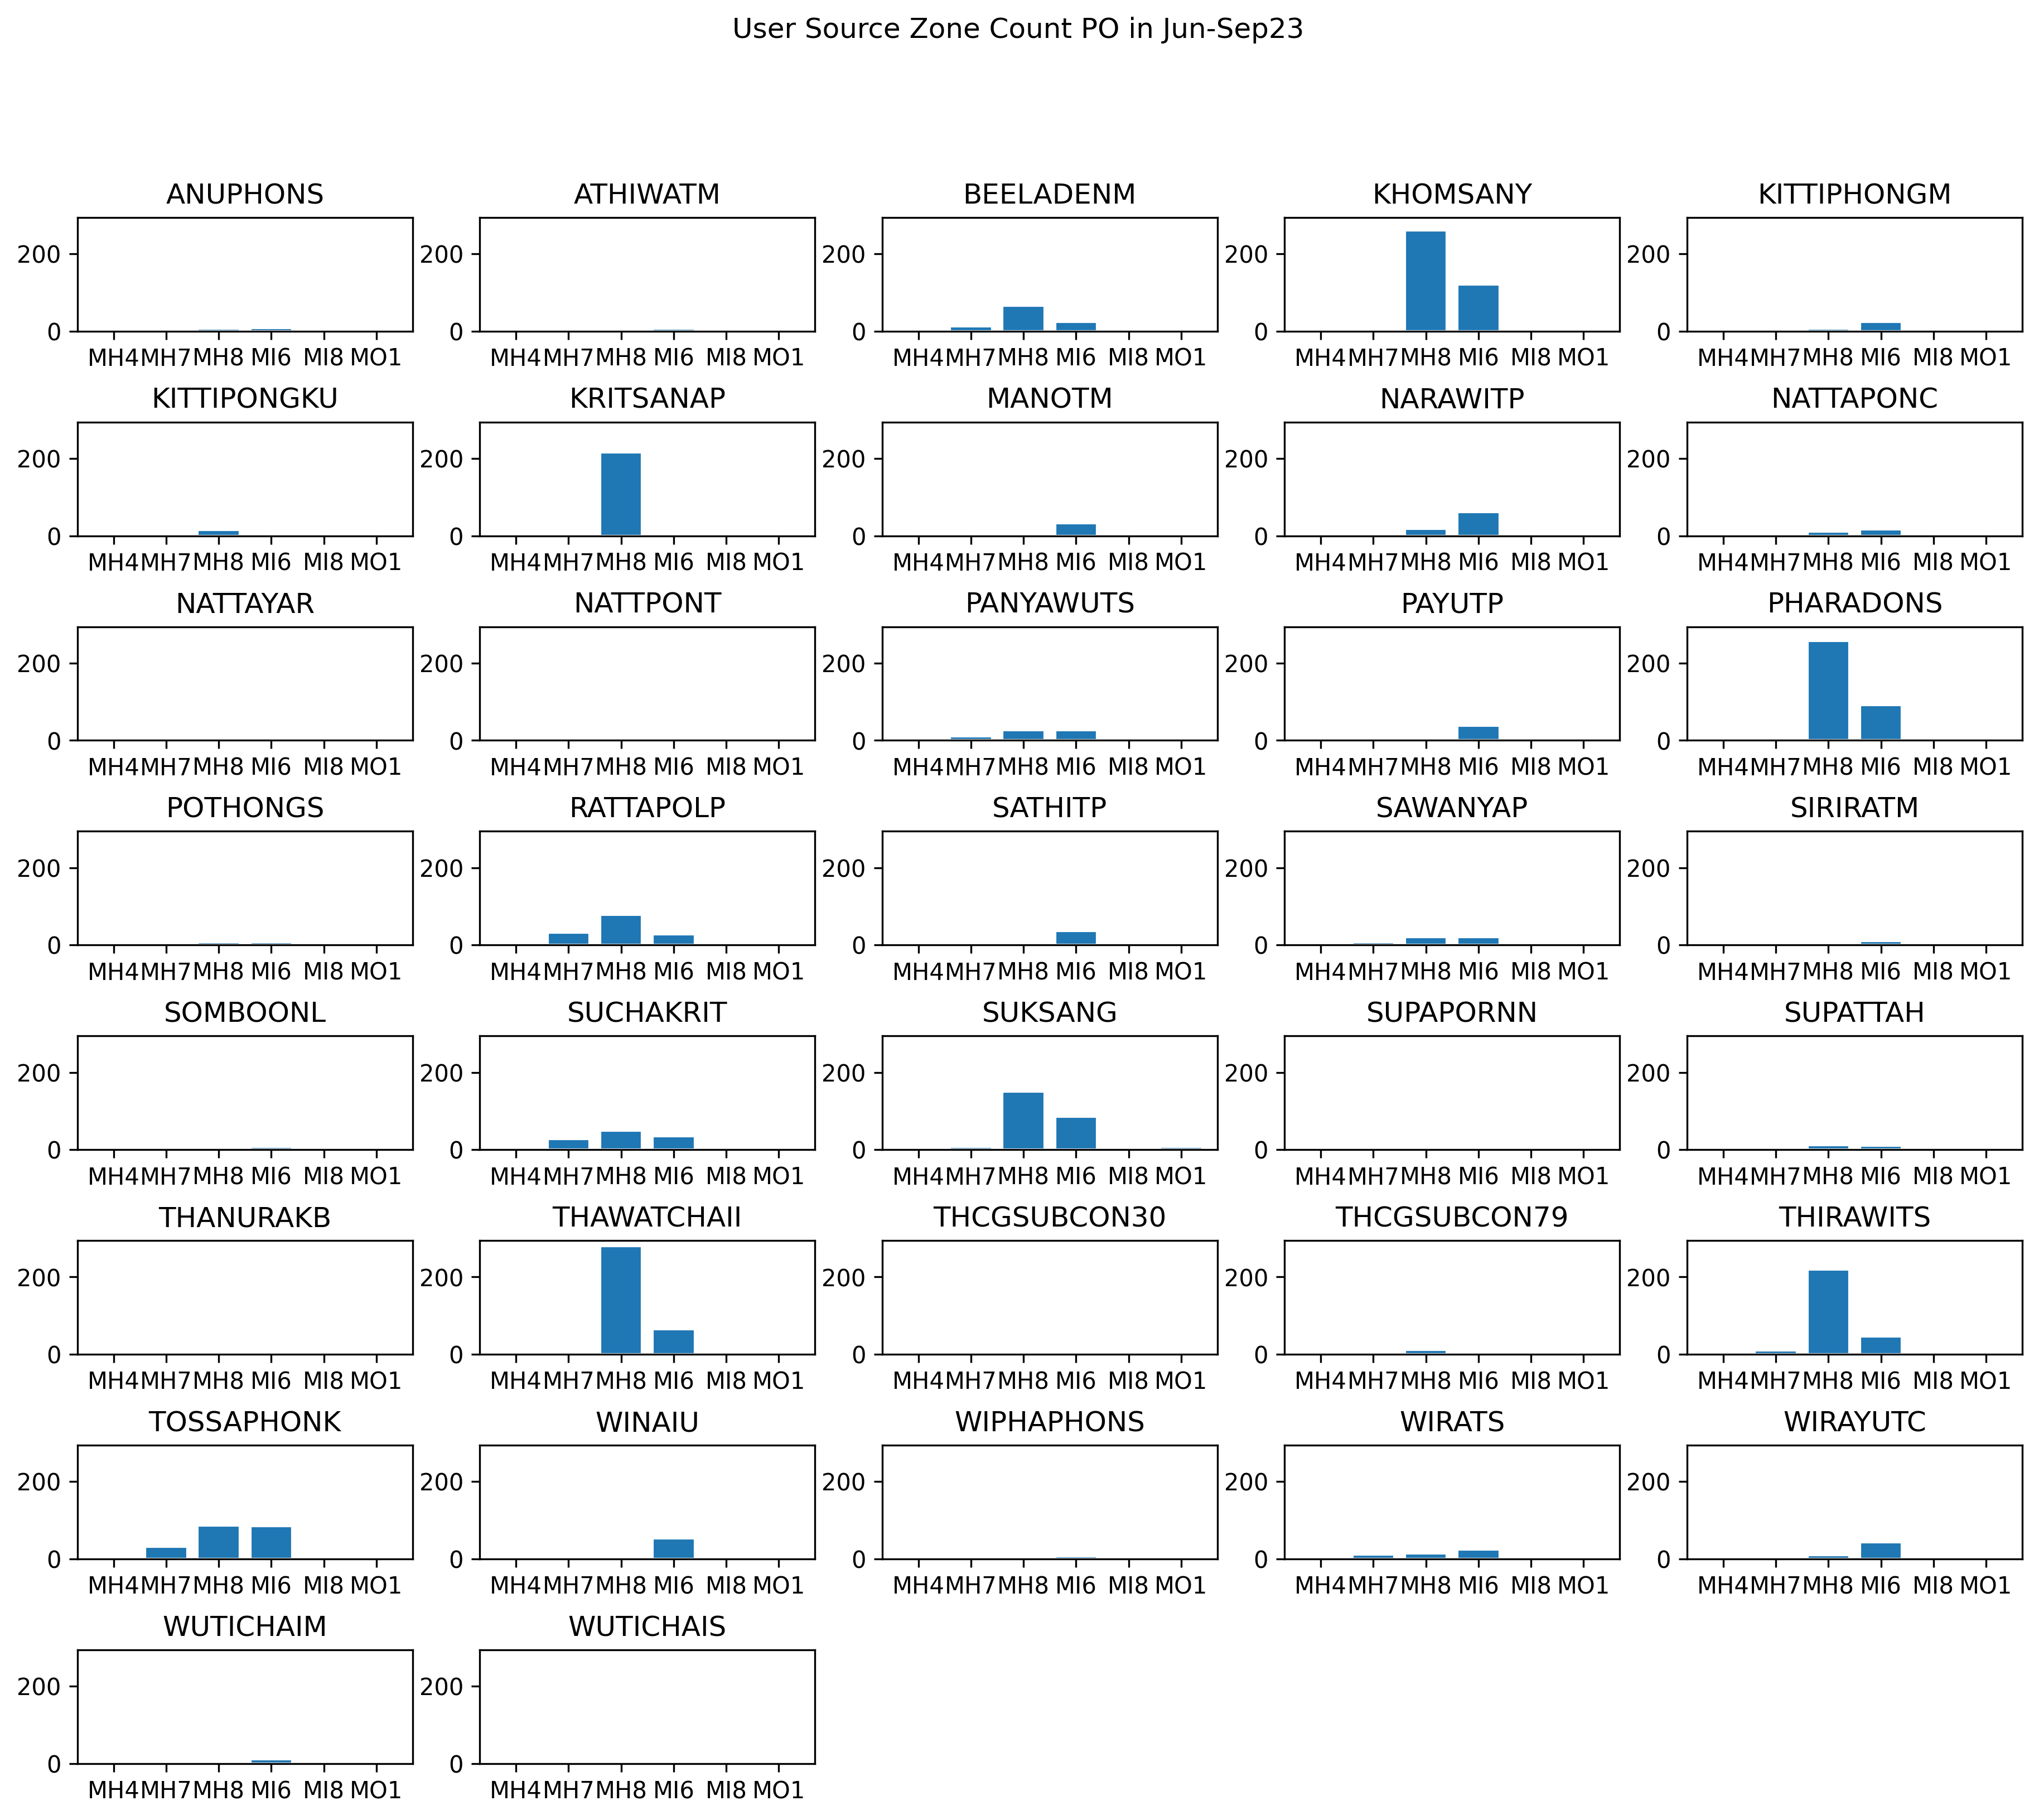

In [39]:
fig = plt.figure(figsize=(15,12),dpi=300)
fig.suptitle('User Source Zone Count PO in Jun-Sep23')
fig.subplots_adjust(hspace=0.8, wspace=0.2)
# Create the first subplot to share the y-axis scale
ax0 = plt.subplot(row, col, 1)
ax0.set_title(f"{column_names_list[0]}")
ax0.bar(row_names_list, pivot_reple.iloc[:, 0], edgecolor="white", linewidth=1.0)

# Create other subplots that share the y-axis scale with the first subplot
for i in range(1, num_columns):
    ax = plt.subplot(row, col, i + 1, sharey=ax0)
    ax.set_title(f"{column_names_list[i]}")
    ax.bar(row_names_list, pivot_reple.iloc[:, i], edgecolor="white", linewidth=1.0)

plt.show()

#### 3. Concat Putaway, Transfer, Picking & Replenishment

##### Concatenate

In [40]:
put_trans_pick_concat = put_trans_pick.iloc[:,[0,2,3,4,5,8,9,10,11,12,14,15,16,17,18]]
put_trans_pick_concat

TO Number Source Stor.Ty. Source Storage Bin  Typ   Dest. Bin  \
205     73396734.0             MI6         079-331-01  MH8  021-201-04   
206     73396735.0             MI6         079-331-01  MH8  021-202-04   
459     73397754.0             IDP          232139220  MH8  020-012-07   
791     73398784.0             IDP          232137827  MH8  020-071-04   
1416    73401076.0             IDP          232148616  MH8  021-231-02   
...            ...             ...                ...  ...         ...   
333624  74774097.0             MH8         021-041-06  200  2007419625   
333959  74776410.0             MH8         021-042-05  200  2007419994   
333960  74776411.0             MH8         021-312-04  200  2007419994   
334077  74776894.0             MH8         020-062-06  200  2007420091   
334187  74778139.0             MH8         021-082-07  200  2007420284   

             Conf_Datetime  Conf_Month   Conf.t.   Conf.date          User  \
205    2023-06-01 08:32:14           6  08:32:14  2023-06-01       SUKSANG   
206    2023-06-01 08:35:47           6  08:35:47  2023-06-01       SUKSANG   
459    2023-06-01 10:15:19           6  10:15:19  2023-06-01  THCGSUBCON30   
791    2023-06-01 12:24:26           6  12:24:26  2023-06-01       SUKSANG   
1416   2023-06-01 19:33:15           6  19:33:15  2023-06-01        WINAIU   
...                    ...         ...       ...         ...           ...   
333624 2023-09-30 04:51:28           9  04:51:28  2023-09-30    WIPHAPHONS   
333959 2023-09-30 11:19:29           9  11:19:29  2023-09-30        PAYUTP   
333960 2023-09-30 11:19:46           9  11:19:46  2023-09-30        PAYUTP   
334077 2023-09-30 14:10:57           9  14:10:57  2023-09-30        PAYUTP   
334187 2023-09-30 15:26:14           9  15:26:14  2023-09-30      KHOMSANY   

       S_Rack Dest_Rack  Activity S_level Dest_level  
205       079       021  Transfer      01         04  
206       079       021  Transfer      01         04  
459     dummy       020   Putaway      01         07  
791     dummy       020   Putaway      01         04  
1416    dummy       021   Putaway      01         02  
...       ...       ...       ...     ...        ...  
333624    021     dummy   Picking      06         01  
333959    021     dummy   Picking      05         01  
333960    021     dummy   Picking      04         01  
334077    020     dummy   Picking      06         01  
334187    021     dummy   Picking      07         01  

[5504 rows x 15 columns]

In [41]:
focus_replenishconcat = focus_replenish.loc[:,['TO Number.','S.Type','Source BIN','Dest.Type','Dest.BIN','Comp._Datetime','Comp_Month',
                                                'Comp.time','Comp.Date','Comp.by','S_Rack','Dest_Rack','Activity','S_level','Dest_level']]
focus_replenishconcat

TO Number. S.Type  Source BIN Dest.Type    Dest.BIN  \
16       73397835    MI6  081-420-01       MF8  021-052-01   
121      73399056    MH8  022-262-05       MF8  021-011-01   
122      73399057    MH8  020-291-07       MF8  022-211-01   
184      73400630    MI6  080-260-01       MF8  021-092-01   
226      73401326    MH8  020-082-06       MF8  046-022-01   
...           ...    ...         ...       ...         ...   
85942    74777387    MI6  050-131-01       MF8  021-052-01   
85949    74777427    MI6  050-501-01       MF8  021-092-01   
85976    74777839    MI6  049-240-01       MF8  021-271-01   
85988    74777990    MI6  050-131-01       MF8  021-052-01   
86003    74778088    MH8  023-182-05       MF8  022-161-01   

           Comp._Datetime  Comp_Month Comp.time   Comp.Date    Comp.by S_Rack  \
16    2023-06-01 10:28:23           6  10:28:23  01.06.2023   KHOMSANY    081   
121   2023-06-01 13:14:26           6  13:14:26  01.06.2023   KHOMSANY    022   
122   2023-06-01 13:15:36           6  13:15:36  01.06.2023  PHARADONS    020   
184   2023-06-01 14:46:30           6  14:46:30  01.06.2023  SUCHAKRIT    080   
226   2023-06-01 15:12:49           6  15:12:49  01.06.2023  PHARADONS    020   
...                   ...         ...       ...         ...        ...    ...   
85942 2023-09-30 14:26:19           9  14:26:19  30.09.2023  SUCHAKRIT    050   
85949 2023-09-30 15:51:20           9  15:51:20  30.09.2023    SUKSANG    050   
85976 2023-09-30 16:09:07           9  16:09:07  30.09.2023    SUKSANG    049   
85988 2023-09-30 17:09:07           9  17:09:07  30.09.2023  SUCHAKRIT    050   
86003 2023-09-30 15:10:29           9  15:10:29  30.09.2023    SUKSANG    023   

      Dest_Rack       Activity S_level Dest_level  
16          021  Replenishment      01         01  
121         021  Replenishment      05         01  
122         022  Replenishment      07         01  
184         021  Replenishment      01         01  
226         046  Replenishment      06         01  
...         ...            ...     ...        ...  
85942       021  Replenishment      01         01  
85949       021  Replenishment      01         01  
85976       021  Replenishment      01         01  
85988       021  Replenishment      01         01  
86003       022  Replenishment      05         01  

[3169 rows x 15 columns]

In [42]:
put_trans_pick_concat.columns = focus_replenishconcat.columns
concat_df = pd.concat([put_trans_pick_concat, focus_replenishconcat], ignore_index=True)
concat_df['Comp.Date'] = pd.to_datetime(concat_df['Comp.Date'], dayfirst=False)
concat_df

TO Number. S.Type  Source BIN Dest.Type    Dest.BIN      Comp._Datetime  \
0     73396734.0    MI6  079-331-01       MH8  021-201-04 2023-06-01 08:32:14   
1     73396735.0    MI6  079-331-01       MH8  021-202-04 2023-06-01 08:35:47   
2     73397754.0    IDP   232139220       MH8  020-012-07 2023-06-01 10:15:19   
3     73398784.0    IDP   232137827       MH8  020-071-04 2023-06-01 12:24:26   
4     73401076.0    IDP   232148616       MH8  021-231-02 2023-06-01 19:33:15   
...          ...    ...         ...       ...         ...                 ...   
8668  74777387.0    MI6  050-131-01       MF8  021-052-01 2023-09-30 14:26:19   
8669  74777427.0    MI6  050-501-01       MF8  021-092-01 2023-09-30 15:51:20   
8670  74777839.0    MI6  049-240-01       MF8  021-271-01 2023-09-30 16:09:07   
8671  74777990.0    MI6  050-131-01       MF8  021-052-01 2023-09-30 17:09:07   
8672  74778088.0    MH8  023-182-05       MF8  022-161-01 2023-09-30 15:10:29   

      Comp_Month Comp.time  Comp.Date       Comp.by S_Rack Dest_Rack  \
0              6  08:32:14 2023-06-01       SUKSANG    079       021   
1              6  08:35:47 2023-06-01       SUKSANG    079       021   
2              6  10:15:19 2023-06-01  THCGSUBCON30  dummy       020   
3              6  12:24:26 2023-06-01       SUKSANG  dummy       020   
4              6  19:33:15 2023-06-01        WINAIU  dummy       021   
...          ...       ...        ...           ...    ...       ...   
8668           9  14:26:19 2023-09-30     SUCHAKRIT    050       021   
8669           9  15:51:20 2023-09-30       SUKSANG    050       021   
8670           9  16:09:07 2023-09-30       SUKSANG    049       021   
8671           9  17:09:07 2023-09-30     SUCHAKRIT    050       021   
8672           9  15:10:29 2023-09-30       SUKSANG    023       022   

           Activity S_level Dest_level  
0          Transfer      01         04  
1          Transfer      01         04  
2           Putaway      01         07  
3           Putaway      01         04  
4           Putaway      01         02  
...             ...     ...        ...  
8668  Replenishment      01         01  
8669  Replenishment      01         01  
8670  Replenishment      01         01  
8671  Replenishment      01         01  
8672  Replenishment      05         01  

[8673 rows x 15 columns]

##### Count PO, Each activity, All users

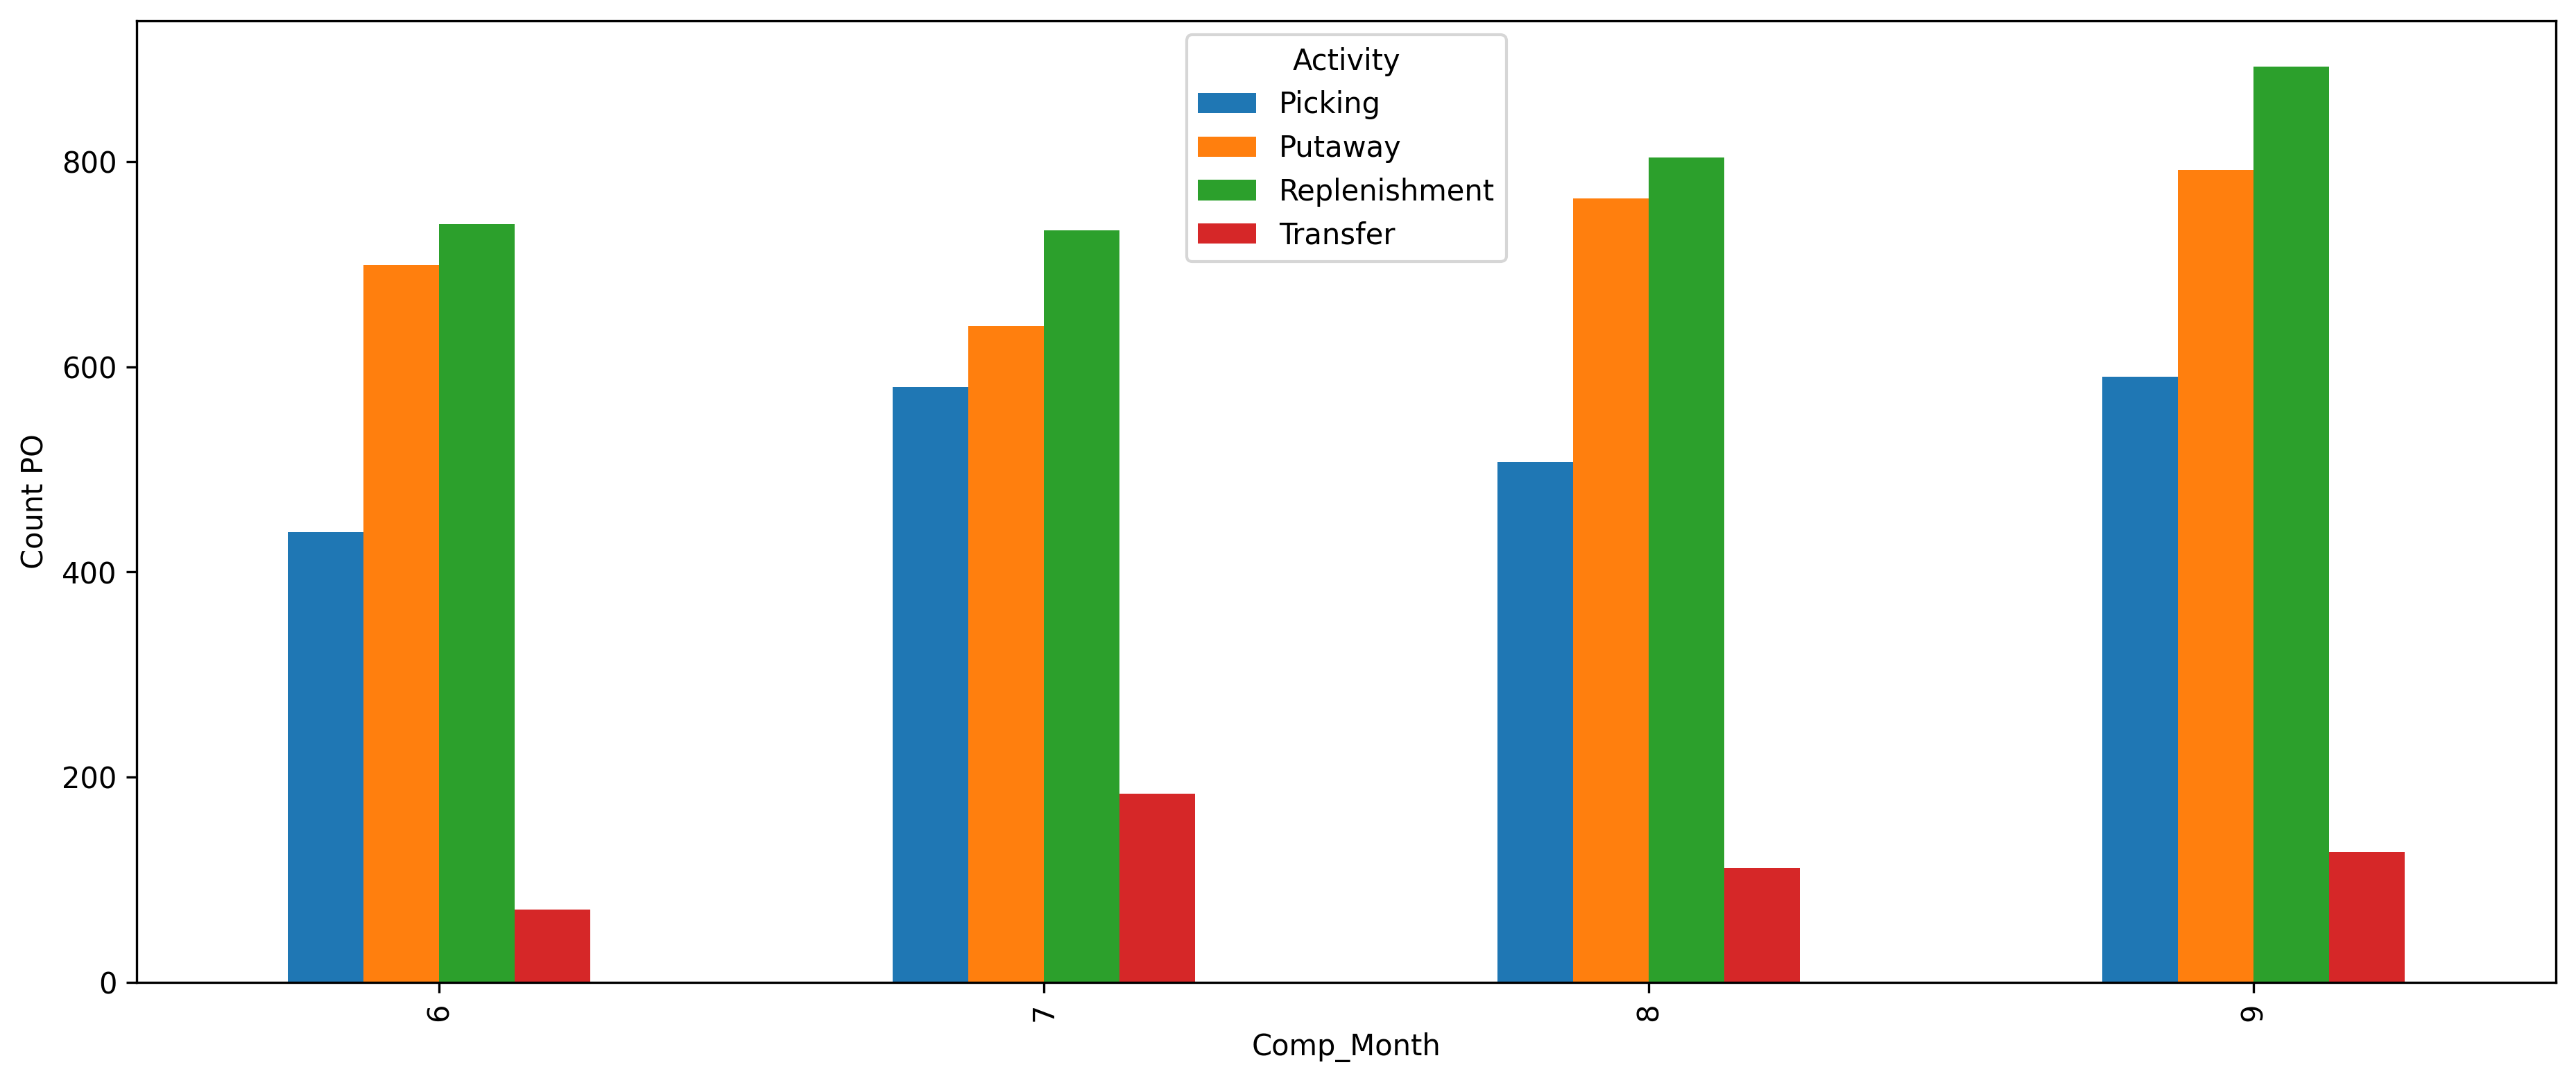

In [43]:
pivot_activity = concat_df.loc[:,['TO Number.','Comp_Month','Activity'] ]
pivot_activity['TO Number.'] = pivot_activity['TO Number.'].astype('str')
pivot_activity = pivot_activity.pivot_table(index='Comp_Month', columns='Activity', values='TO Number.', aggfunc='count')
ax = plt.figure(figsize=(15,6),dpi=300)
ax = pivot_activity.plot.bar(ax=plt.axes())
ax.set_ylabel("Count PO")
plt.show()

##### Count PO, Each activity, Each users, Each Month in 1 chart

['SUKSANG' 'THCGSUBCON30' 'WINAIU' 'ANUPHONS' 'TOSSAPHONK' 'MANOTM'
 'SUCHAKRIT' 'THCGSUBCON79' 'KHOMSANY' 'THIRAWITS' 'WIPHAPHONS'
 'THAWATCHAII' 'THANURAKB' 'BEELADENM' 'PHARADONS' 'WIRAYUTC' 'ATHIWATM'
 'KITTIPONGKU' 'SOMBOONL' 'RATTAPOLP' 'WUTICHAIM' 'NARAWITP' 'SIRIRATM'
 'KITTIPHONGM' 'PAYUTP' 'WIRATS' 'SAWANYAP' 'SUPATTAH' 'NATTPONT'
 'SATHITP' 'KRITSANAP' 'WUTICHAIS' 'NATTAPONC' 'NATTAYAR' 'POTHONGS'
 'PANYAWUTS' 'PAWEENAS' 'SUPAPORNN'] 
 Total users = 38


Activity              Picking  Putaway  Replenishment  Transfer
Comp.by   Comp_Month                                           
ANUPHONS  6              18.0      1.0            0.0       0.0
          7              29.0      0.0            1.0       0.0
          8              20.0     53.0            6.0       0.0
          9              38.0     34.0            8.0       0.0
ATHIWATM  6              41.0      0.0            1.0       0.0
...                       ...      ...            ...       ...
WUTICHAIM 9              16.0      9.0            3.0       2.0
WUTICHAIS 6               0.0      4.0            0.0       1.0
          7               0.0     50.0            0.0      22.0
          8               0.0     73.0            2.0       2.0
          9               0.0     87.0            1.0      31.0

[141 rows x 4 columns]

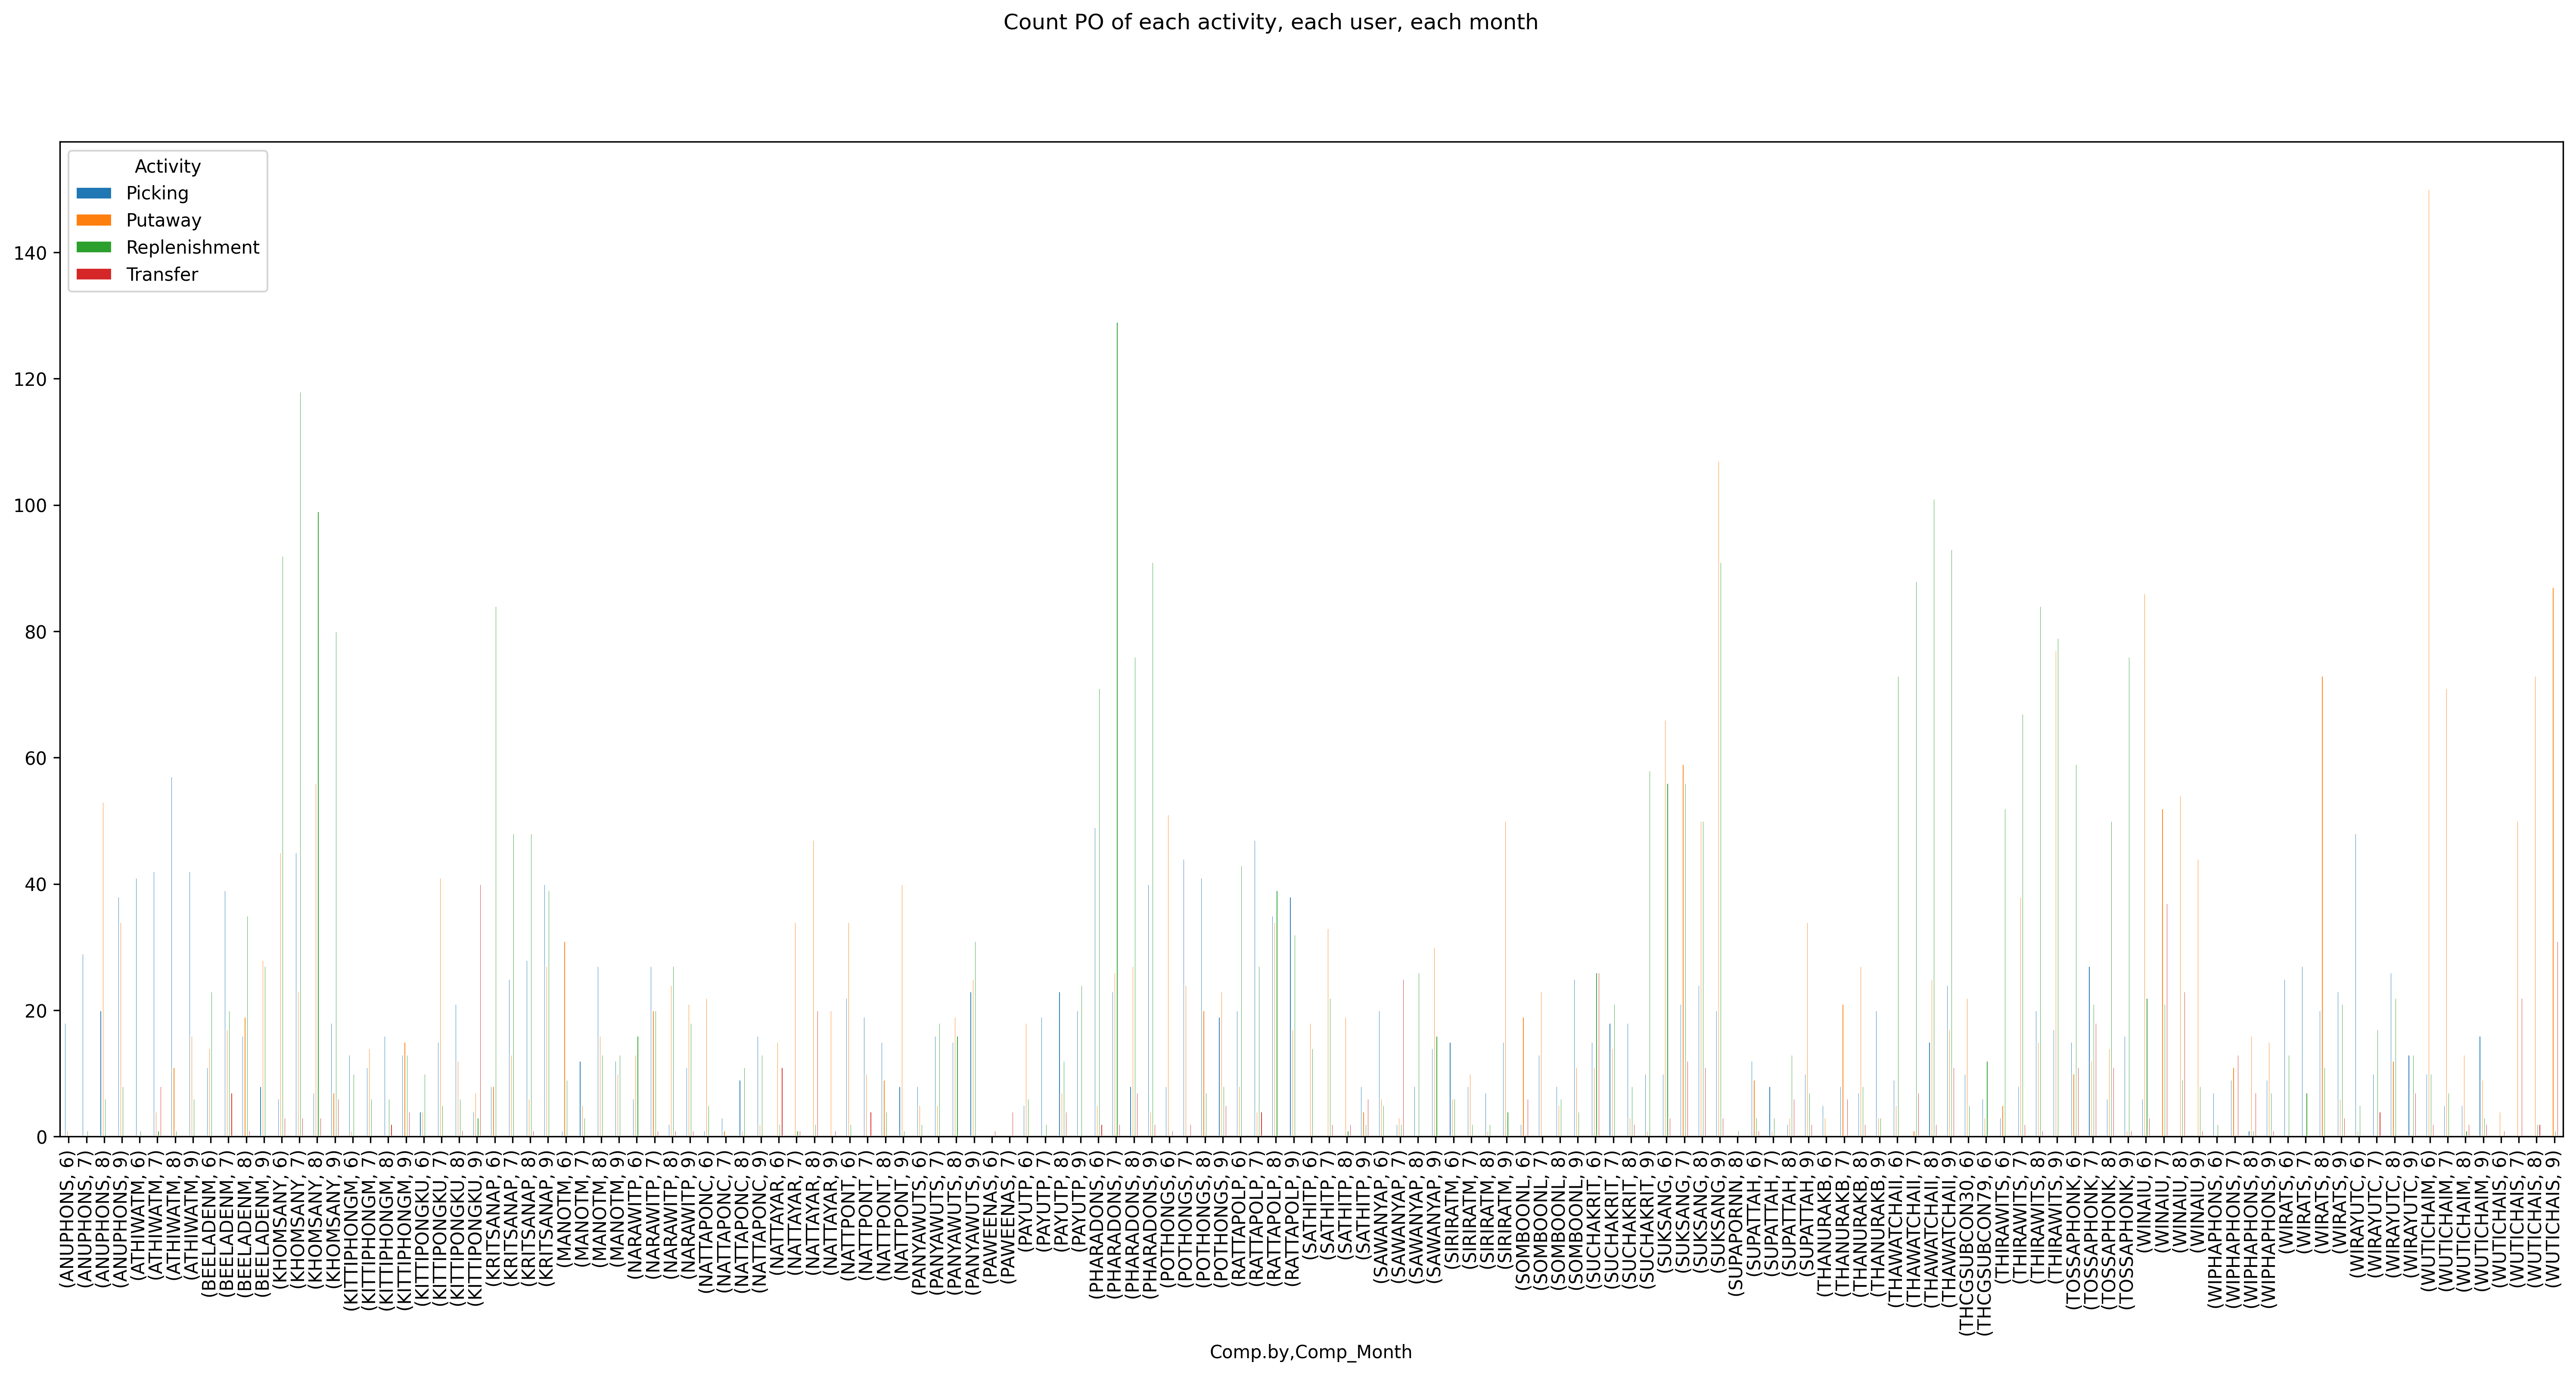

In [44]:
# each activity, each user, each month
pivot_User_Activity = concat_df.loc[:,['TO Number.','Comp_Month', 'Comp.by', 'Activity'] ]
user_unique = pivot_User_Activity['Comp.by'].unique()
print(user_unique, '\n Total users =', len(user_unique))

pivot_User_Activity = pivot_User_Activity.pivot_table(index=['Comp.by','Comp_Month'], columns='Activity', values='TO Number.', aggfunc='count')
pivot_User_Activity = pivot_User_Activity.fillna(0)
#pivot_User_Activity = pivot_User_Activity.reset_index()
display(pivot_User_Activity)

fig = plt.figure(figsize=(25,10),dpi=300)
fig.suptitle('Count PO of each activity, each user, each month')
fig.subplots_adjust(hspace=0.8, wspace=0.2)
ax = pivot_User_Activity.plot.bar(ax=plt.axes(), edgecolor = "white",linewidth=1.0)
plt.show()

##### Count PO, Each activity, Each users, Each Month (1 chart/month)

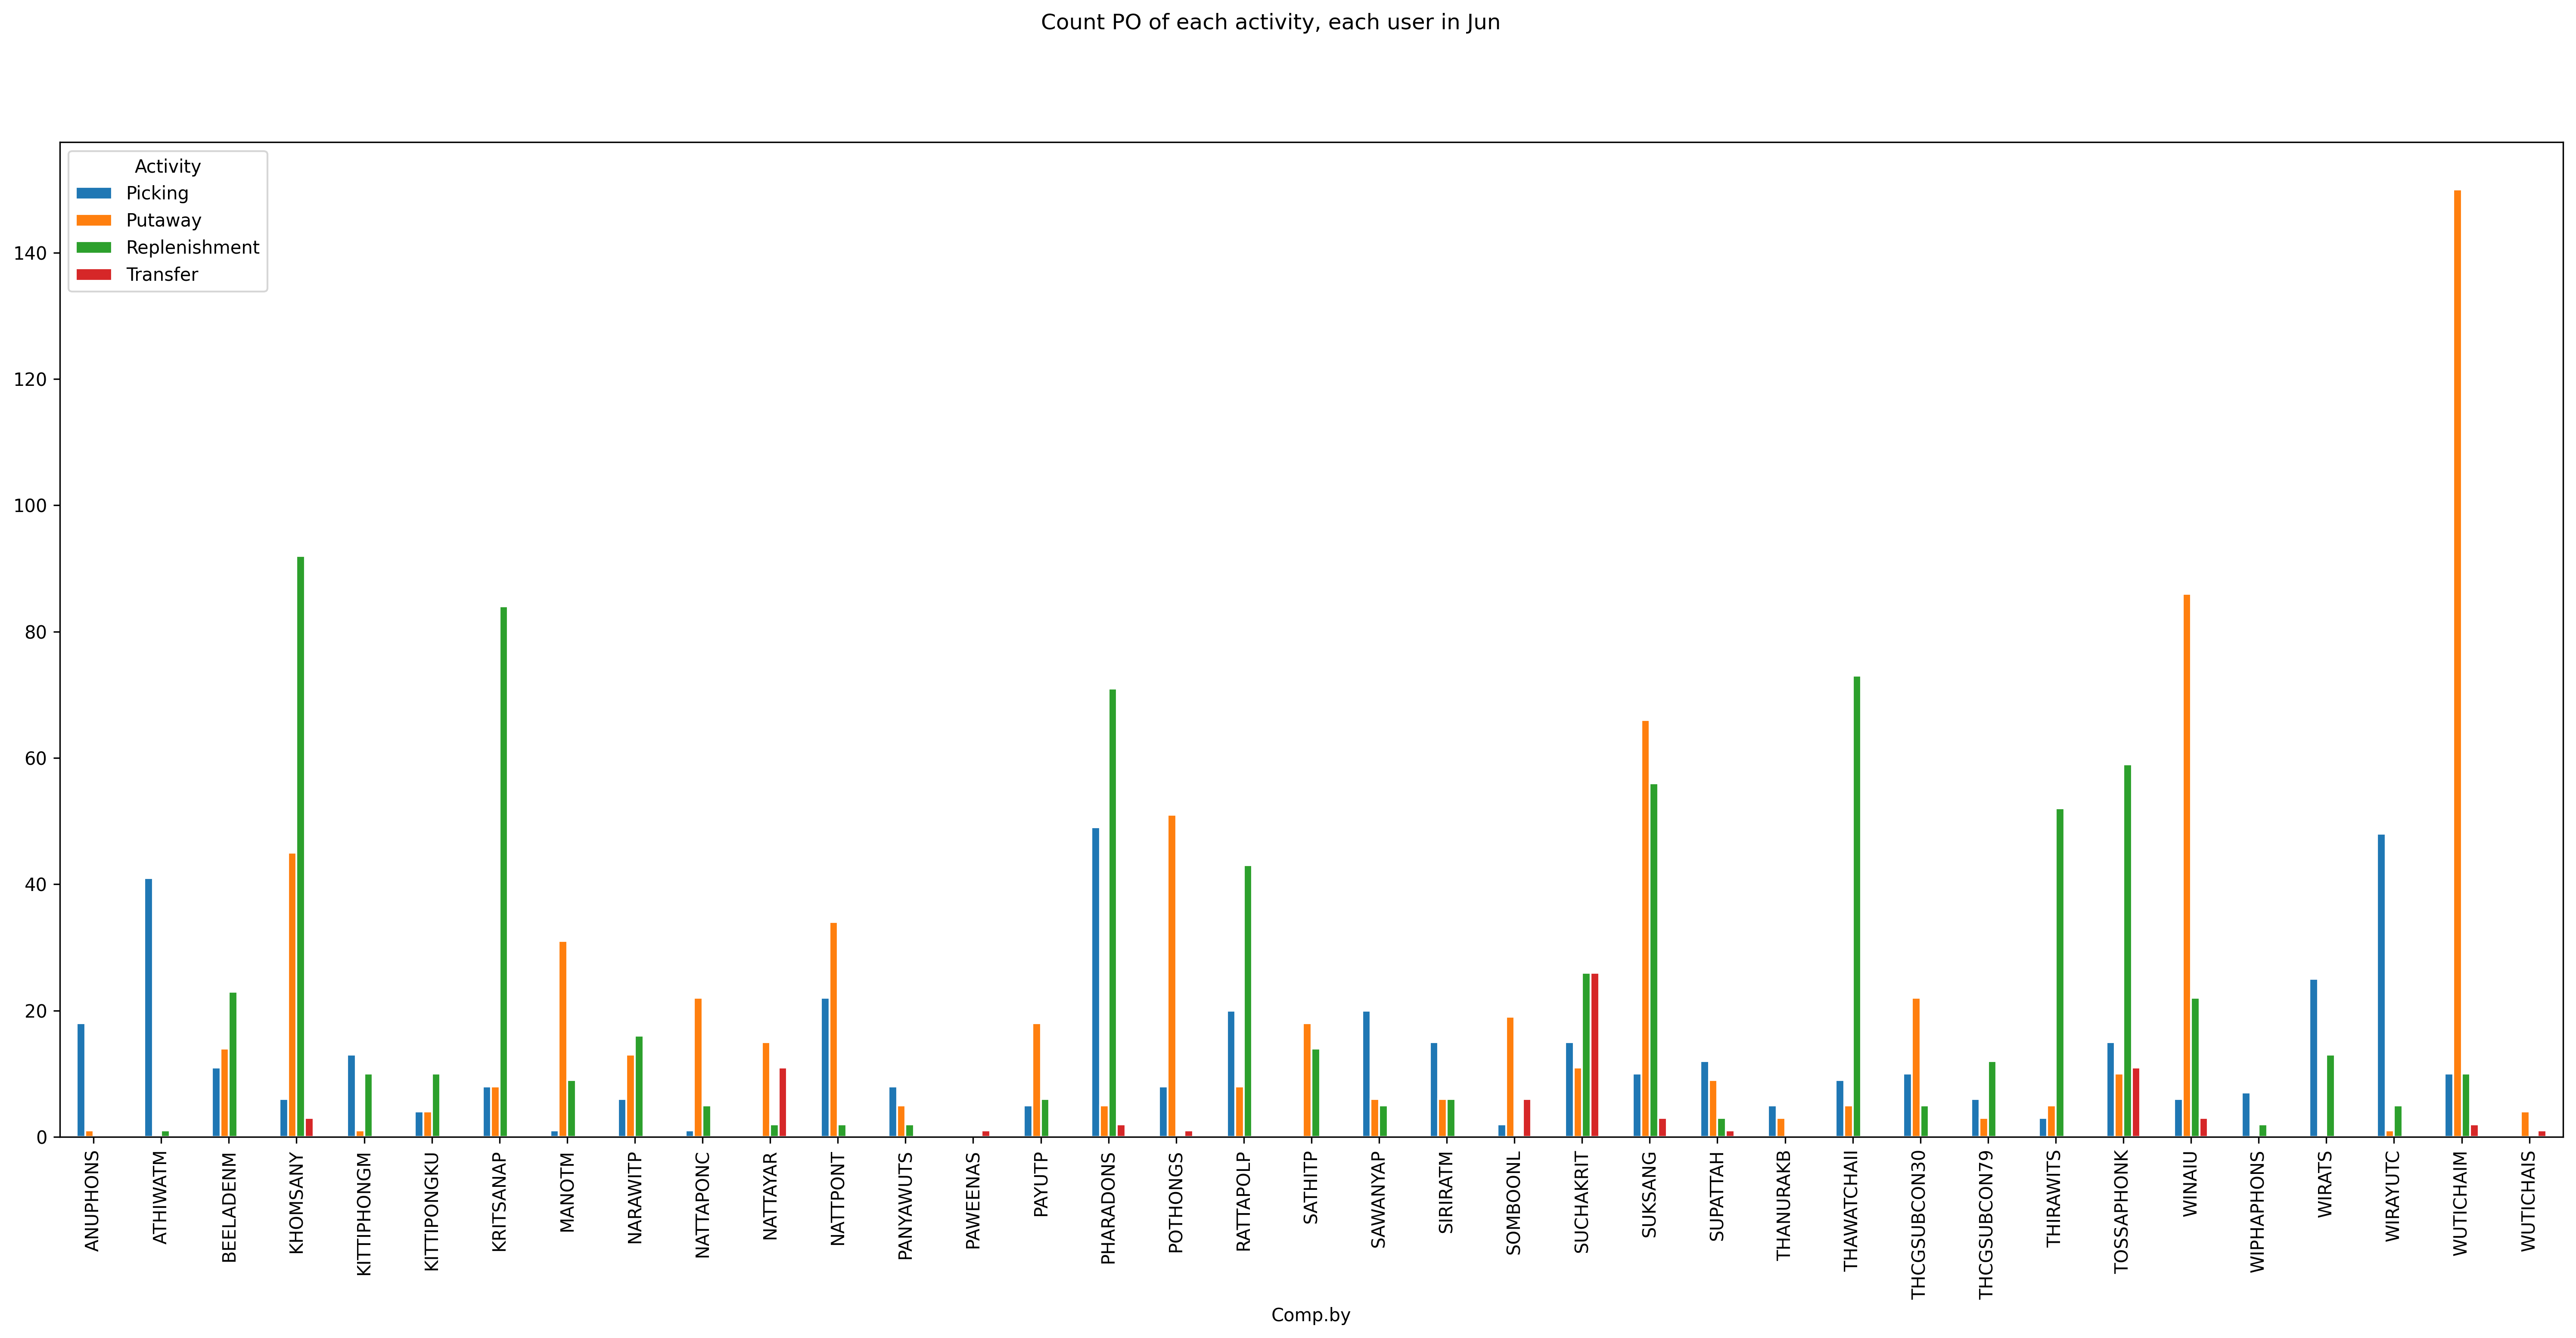

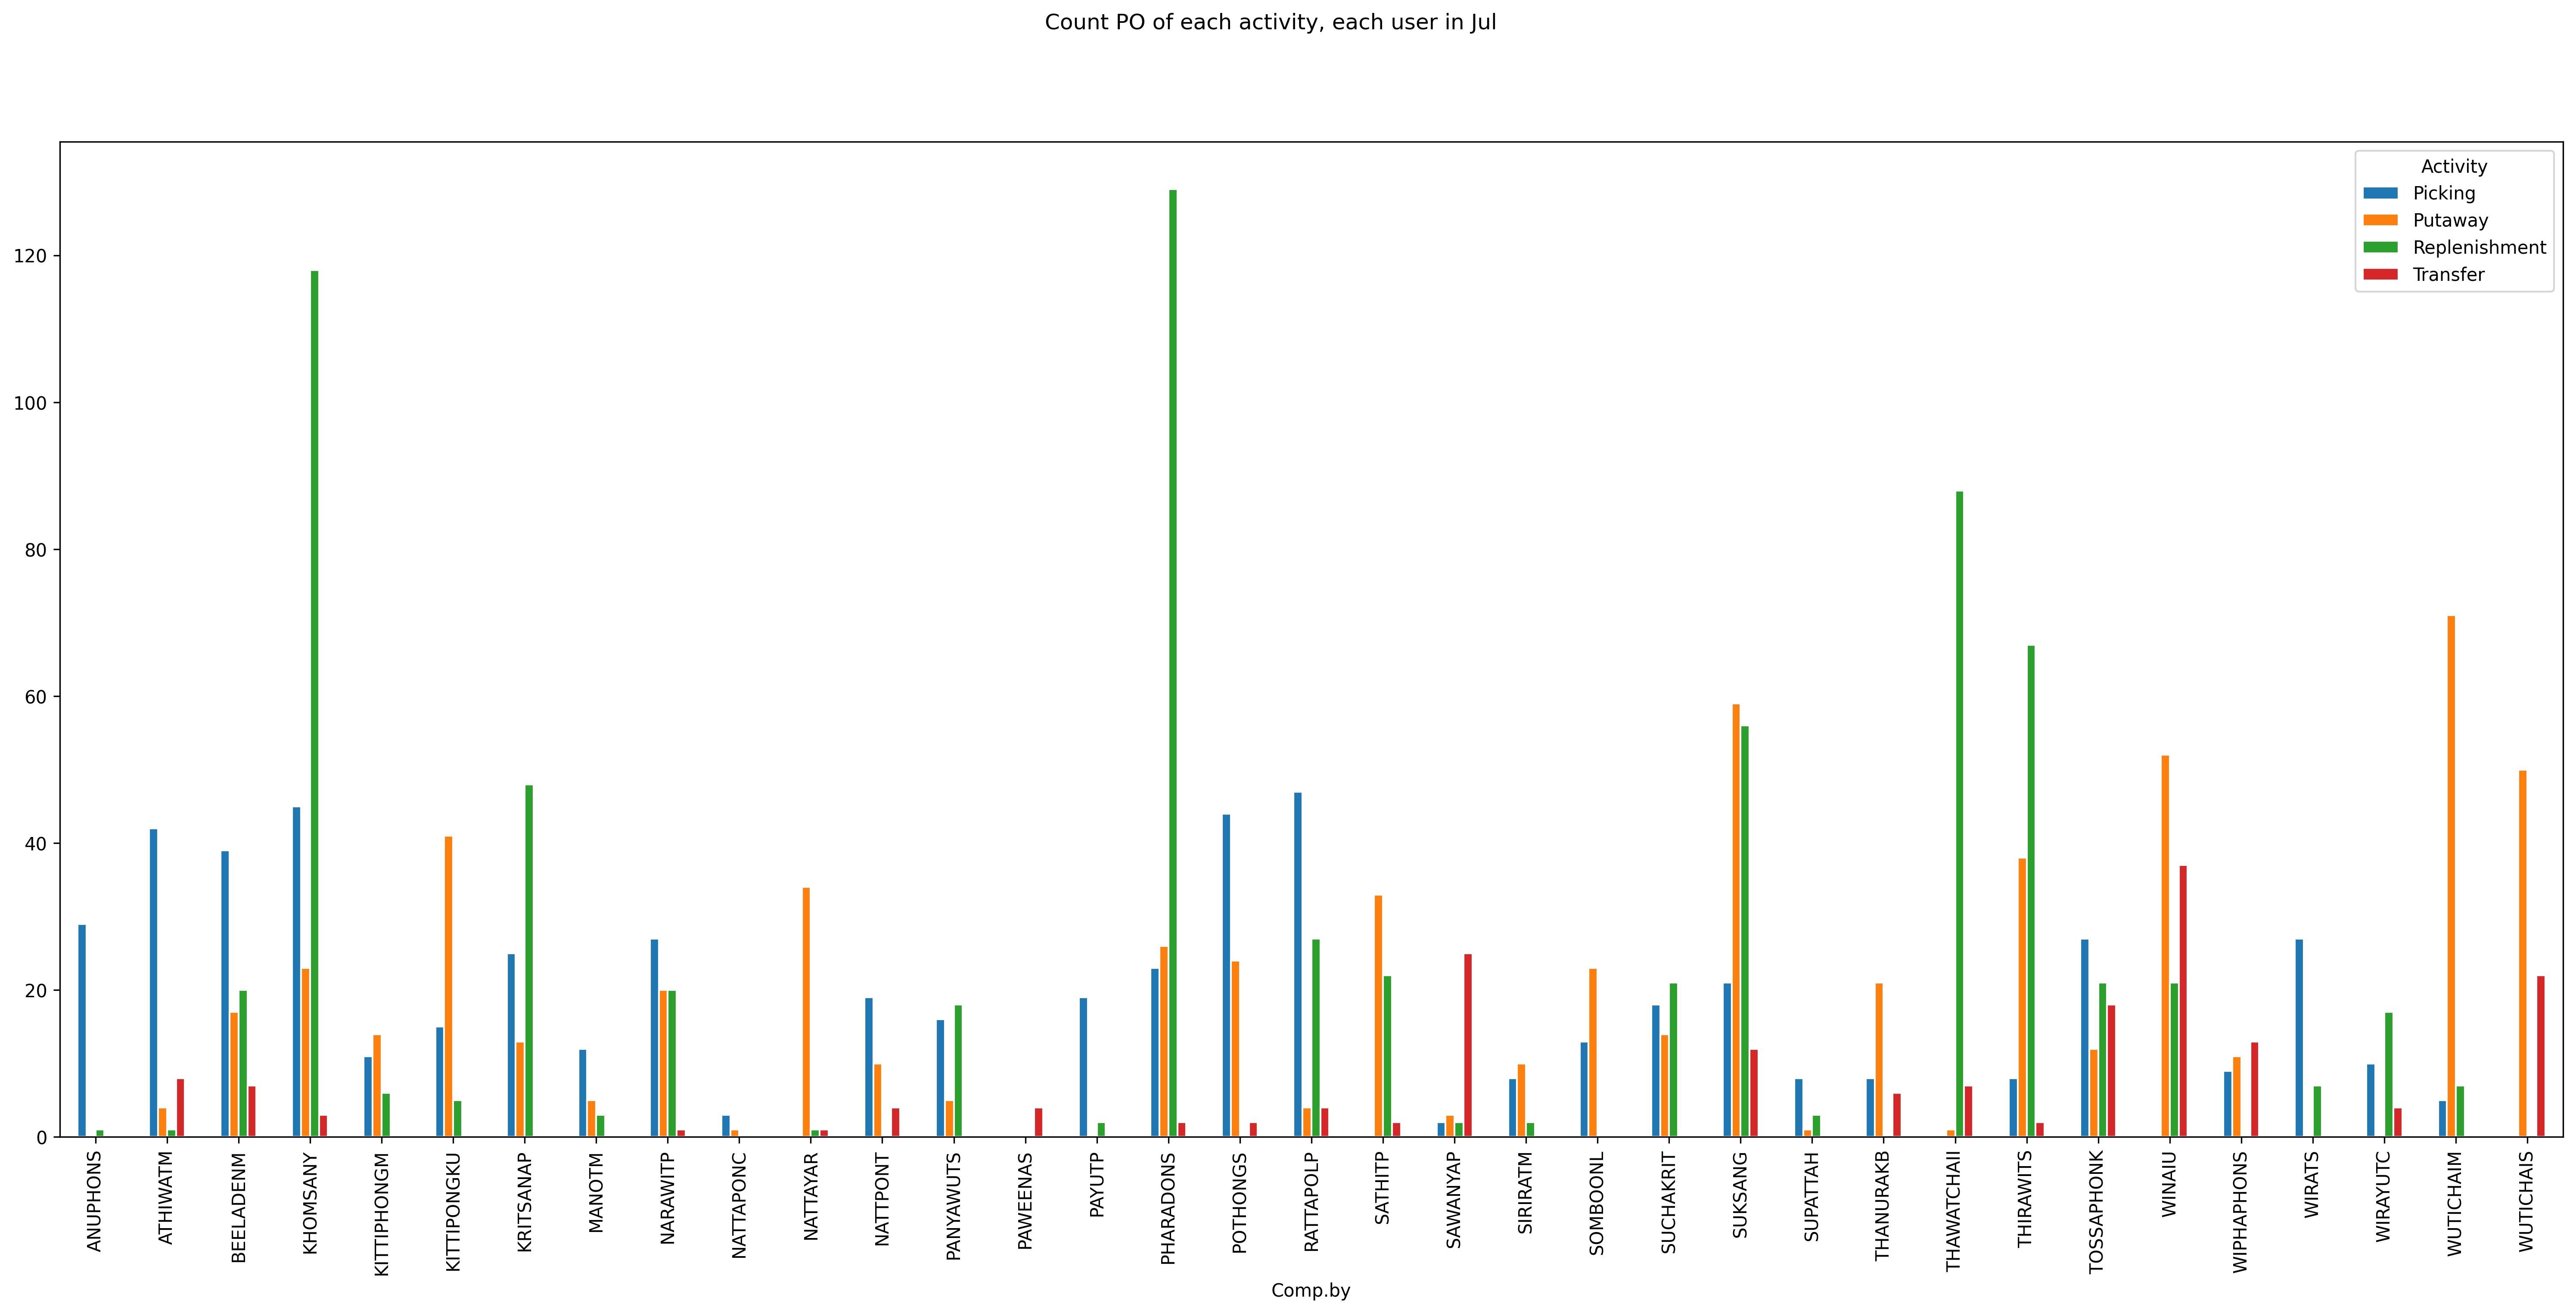

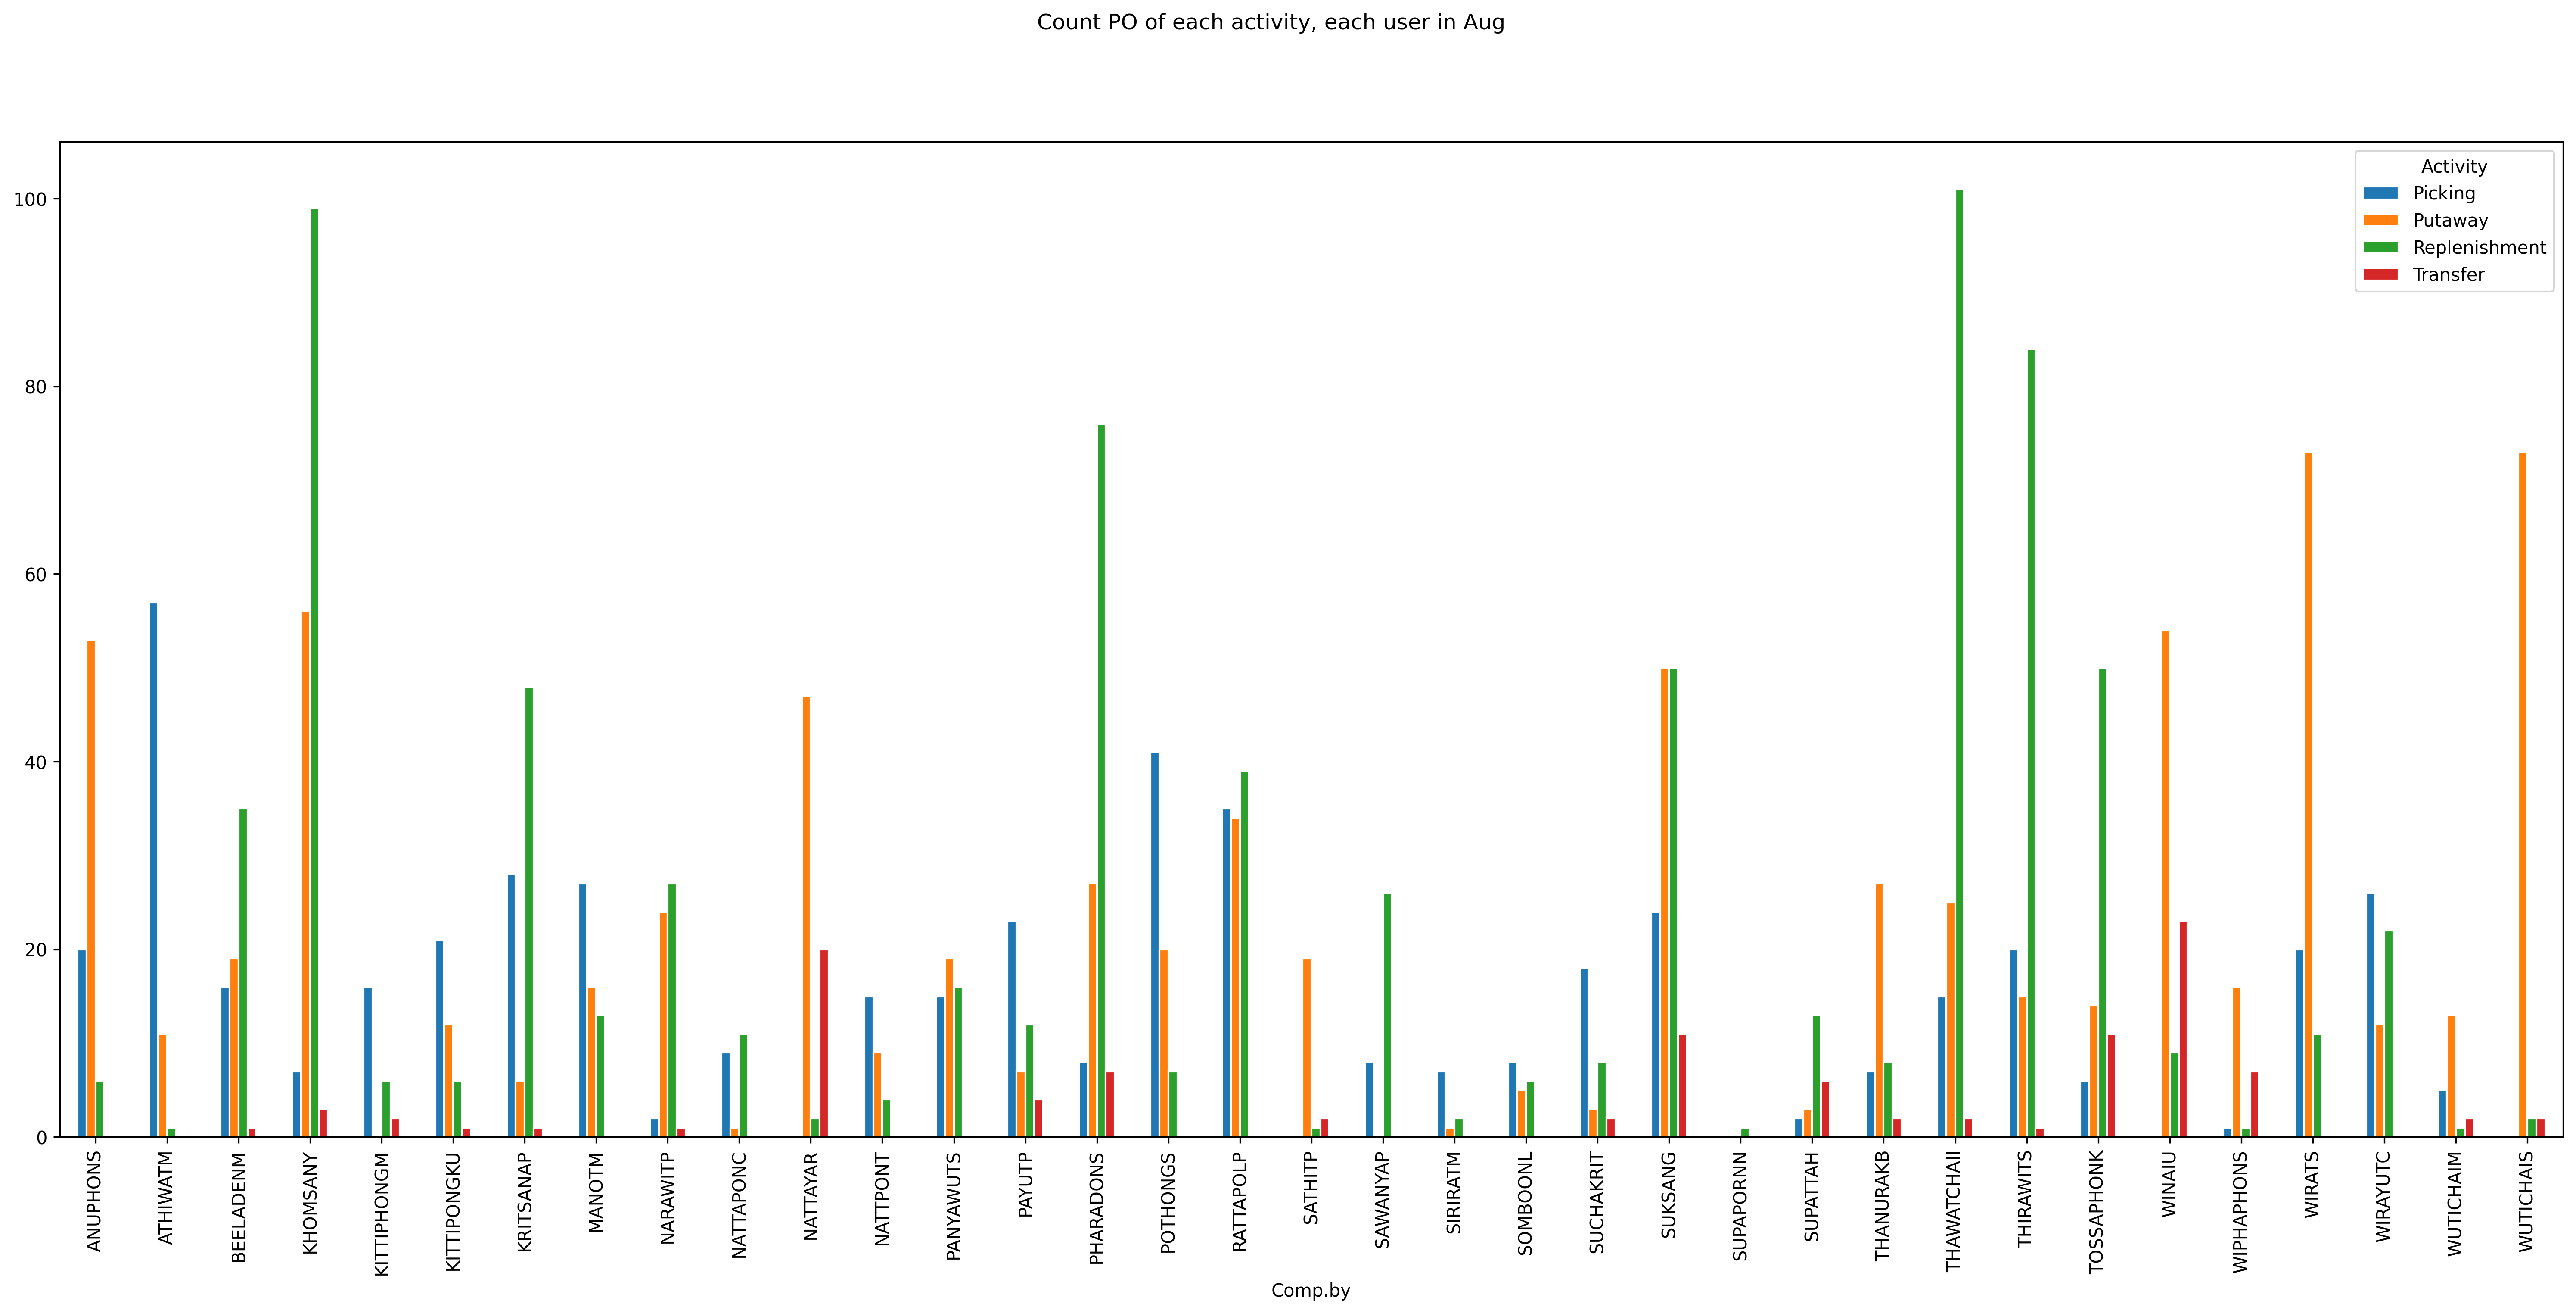

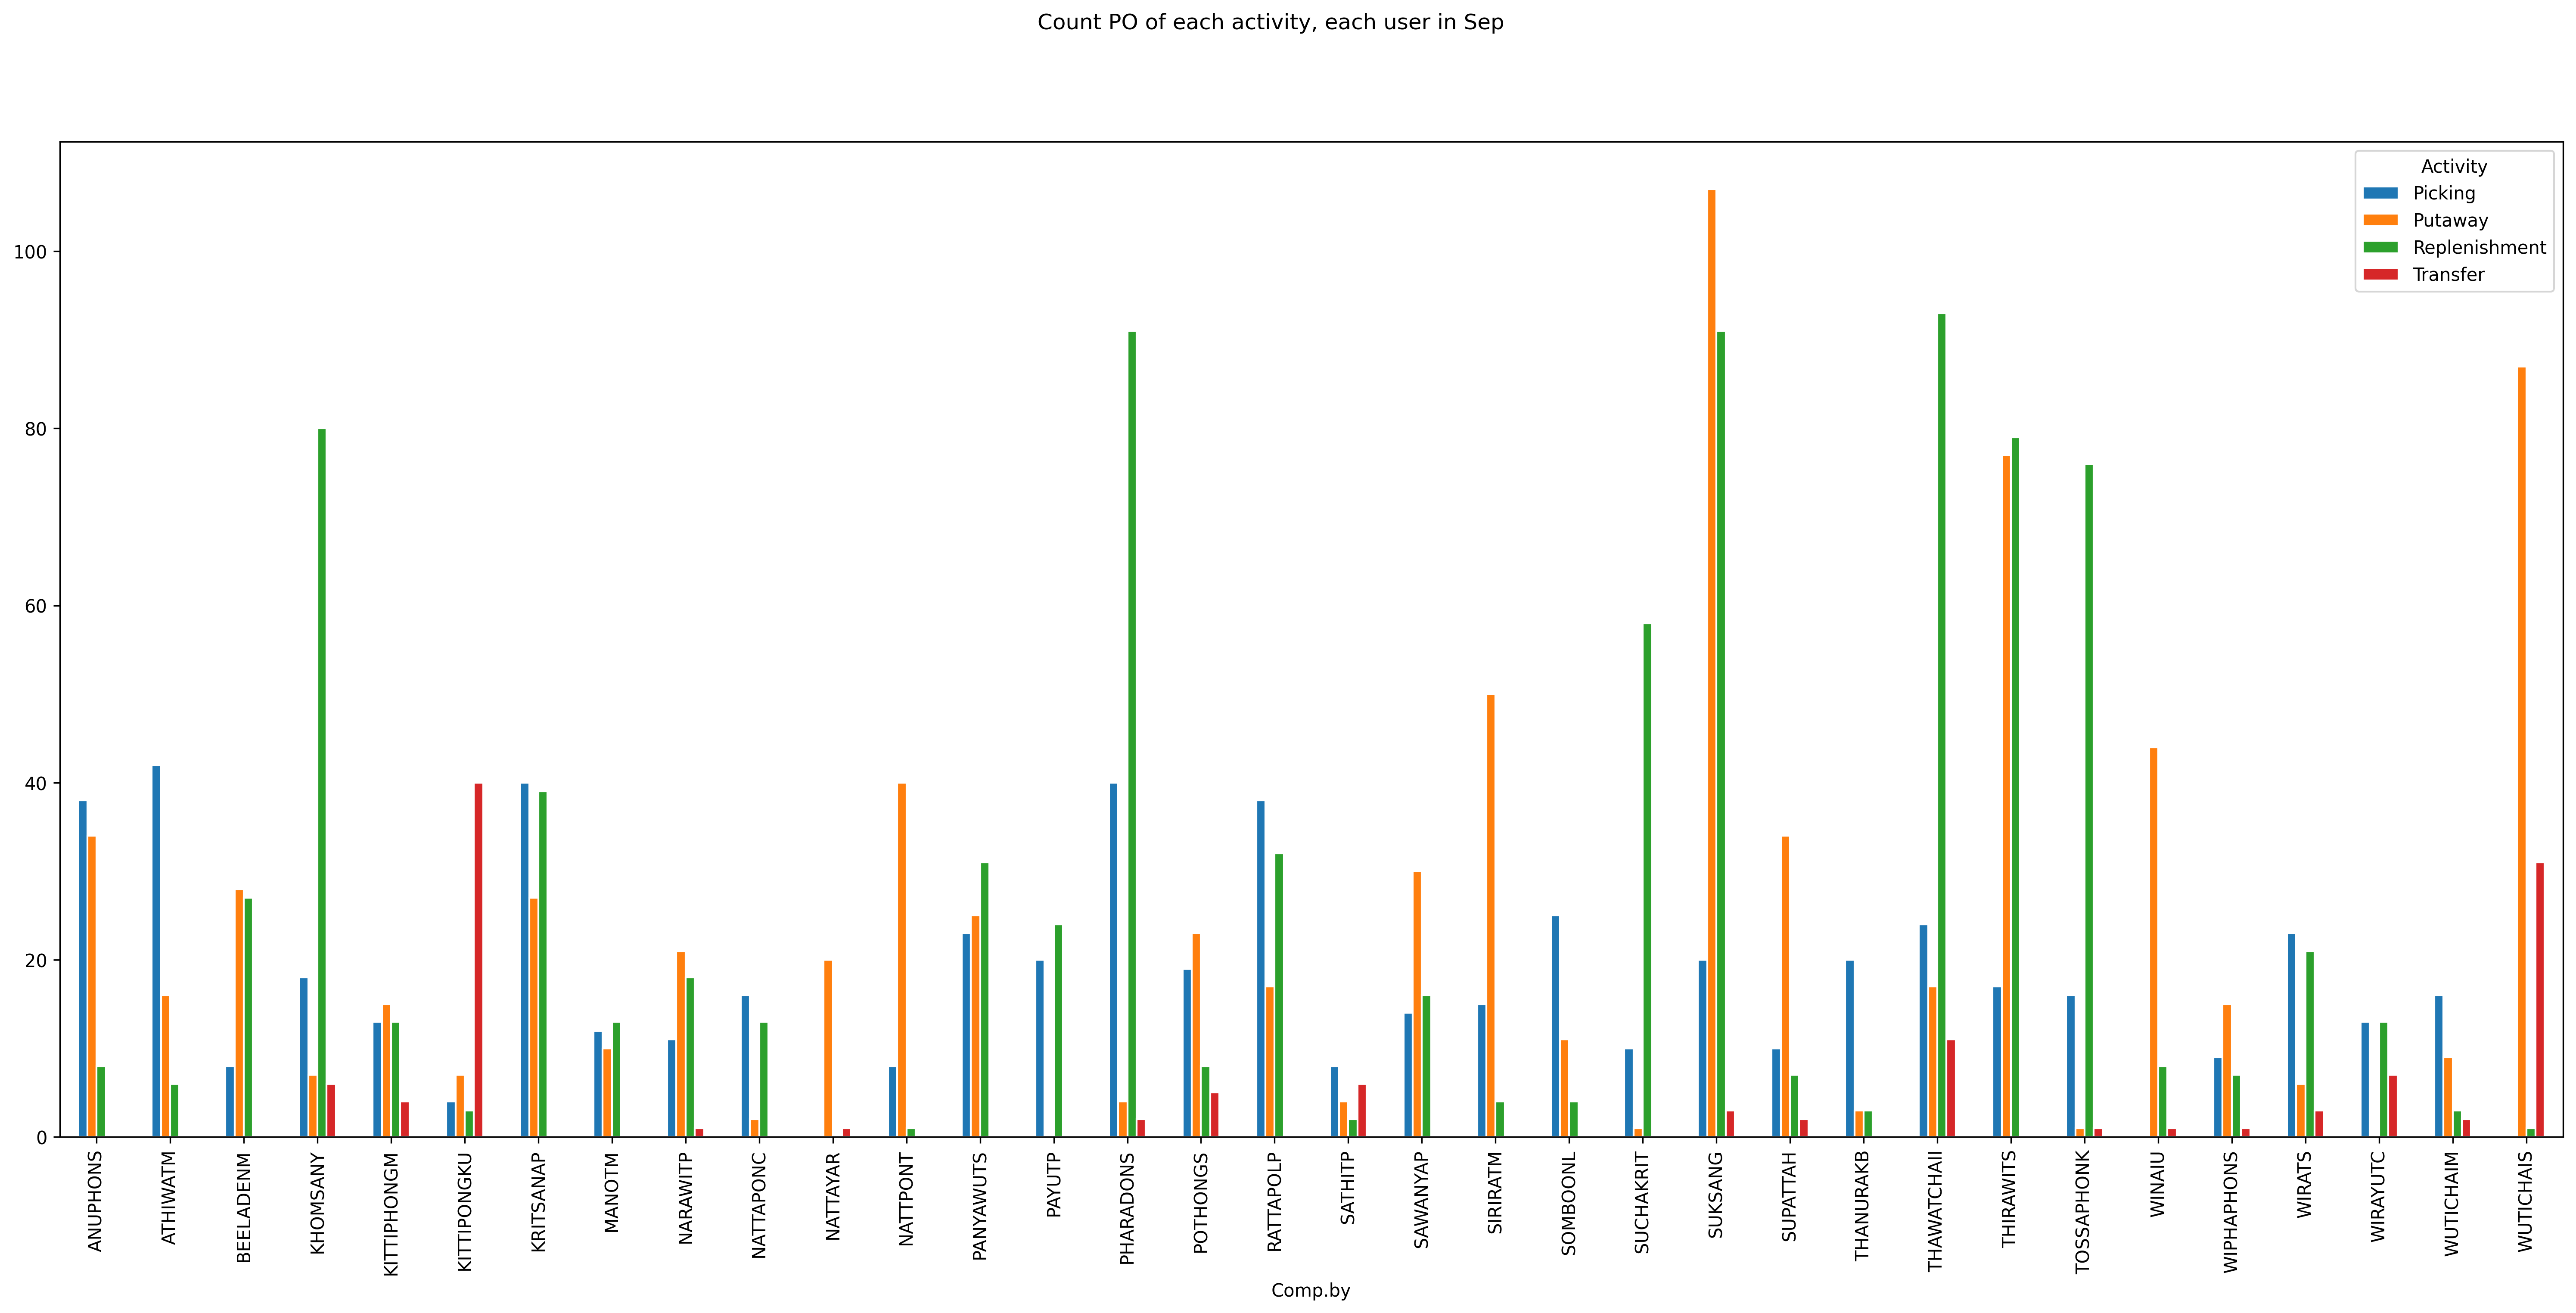

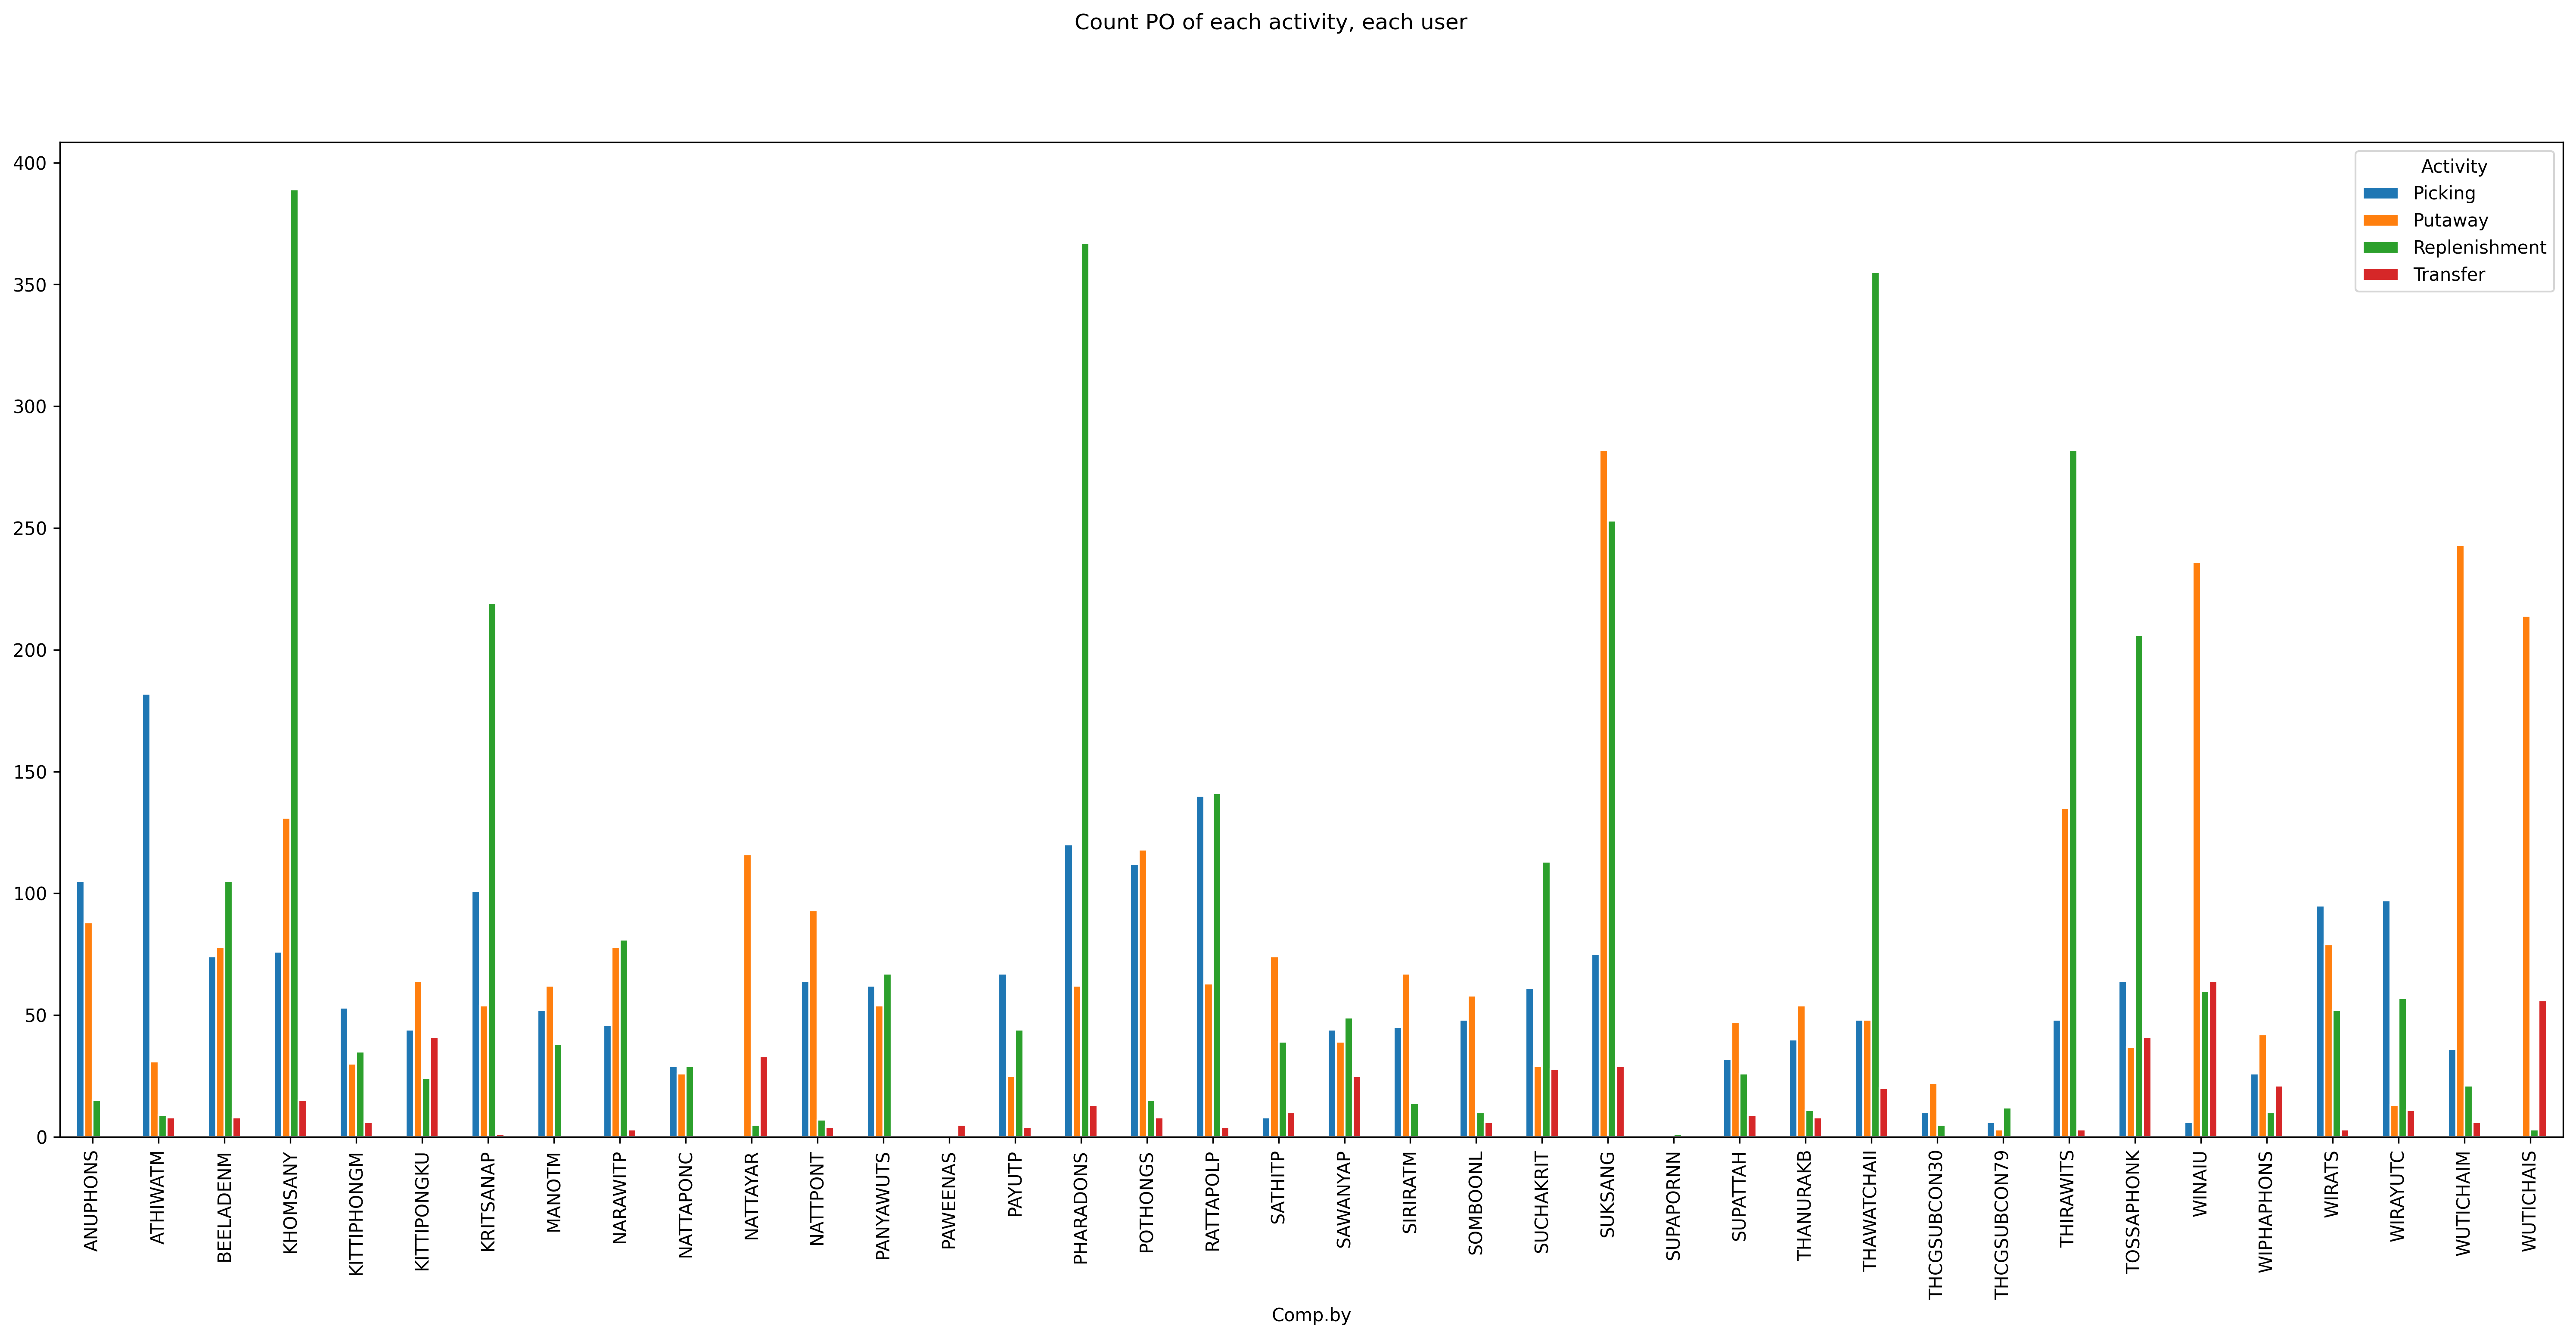

In [45]:
# each activity, each user, each month
pivot_User_Activity = concat_df.loc[:,['TO Number.','Comp_Month', 'Comp.by', 'Activity'] ]
month = pivot_User_Activity['Comp_Month'].unique()
# Plot charts
each_user_activity_month_chart(pivot_User_Activity,month)
each_user_activity_chart(pivot_User_Activity)  

#### 3.1 Use completed timestamp of previous work of each user to be the created timestamp of each work
*** The problem is how to set the 'first' created timestamp for each user of each day
- Now I set the 'first' created timestamp for each user of each day to be the beginning of hour of completed timestamp of the first work of each day

In [46]:
# User in focused area
user_unique.sort()
print(user_unique)

['ANUPHONS' 'ATHIWATM' 'BEELADENM' 'KHOMSANY' 'KITTIPHONGM' 'KITTIPONGKU'
 'KRITSANAP' 'MANOTM' 'NARAWITP' 'NATTAPONC' 'NATTAYAR' 'NATTPONT'
 'PANYAWUTS' 'PAWEENAS' 'PAYUTP' 'PHARADONS' 'POTHONGS' 'RATTAPOLP'
 'SATHITP' 'SAWANYAP' 'SIRIRATM' 'SOMBOONL' 'SUCHAKRIT' 'SUKSANG'
 'SUPAPORNN' 'SUPATTAH' 'THANURAKB' 'THAWATCHAII' 'THCGSUBCON30'
 'THCGSUBCON79' 'THIRAWITS' 'TOSSAPHONK' 'WINAIU' 'WIPHAPHONS' 'WIRATS'
 'WIRAYUTC' 'WUTICHAIM' 'WUTICHAIS']


In [47]:
concat_df['Comp._dayofweek'] = concat_df['Comp._Datetime'].dt.dayofweek
concat_df = add_newcol_created_datetime(concat_df,user_unique)
concat_df['time_diff'] = concat_df['Comp._Datetime'] - concat_df['created_datetime']
display(concat_df)
concat_df.to_csv('Data/concat_df.csv',index=False)

TO Number. S.Type  Source BIN Dest.Type    Dest.BIN      Comp._Datetime  \
0     73396734.0    MI6  079-331-01       MH8  021-201-04 2023-06-01 08:32:14   
1     73396735.0    MI6  079-331-01       MH8  021-202-04 2023-06-01 08:35:47   
2     73397754.0    IDP   232139220       MH8  020-012-07 2023-06-01 10:15:19   
3     73398784.0    IDP   232137827       MH8  020-071-04 2023-06-01 12:24:26   
4     73401076.0    IDP   232148616       MH8  021-231-02 2023-06-01 19:33:15   
...          ...    ...         ...       ...         ...                 ...   
8668  74777387.0    MI6  050-131-01       MF8  021-052-01 2023-09-30 14:26:19   
8669  74777427.0    MI6  050-501-01       MF8  021-092-01 2023-09-30 15:51:20   
8670  74777839.0    MI6  049-240-01       MF8  021-271-01 2023-09-30 16:09:07   
8671  74777990.0    MI6  050-131-01       MF8  021-052-01 2023-09-30 17:09:07   
8672  74778088.0    MH8  023-182-05       MF8  022-161-01 2023-09-30 15:10:29   

      Comp_Month Comp.time  Comp.Date       Comp.by S_Rack Dest_Rack  \
0              6  08:32:14 2023-06-01       SUKSANG    079       021   
1              6  08:35:47 2023-06-01       SUKSANG    079       021   
2              6  10:15:19 2023-06-01  THCGSUBCON30  dummy       020   
3              6  12:24:26 2023-06-01       SUKSANG  dummy       020   
4              6  19:33:15 2023-06-01        WINAIU  dummy       021   
...          ...       ...        ...           ...    ...       ...   
8668           9  14:26:19 2023-09-30     SUCHAKRIT    050       021   
8669           9  15:51:20 2023-09-30       SUKSANG    050       021   
8670           9  16:09:07 2023-09-30       SUKSANG    049       021   
8671           9  17:09:07 2023-09-30     SUCHAKRIT    050       021   
8672           9  15:10:29 2023-09-30       SUKSANG    023       022   

           Activity S_level Dest_level  Comp._dayofweek    created_datetime  \
0          Transfer      01         04                3 2023-06-01 08:00:00   
1          Transfer      01         04                3 2023-06-01 08:32:14   
2           Putaway      01         07                3 2023-06-01 10:00:00   
3           Putaway      01         04                3 2023-06-01 08:35:47   
4           Putaway      01         02                3 2023-06-01 19:00:00   
...             ...     ...        ...              ...                 ...   
8668  Replenishment      01         01                5 2023-09-30 12:59:01   
8669  Replenishment      01         01                5 2023-09-30 15:10:29   
8670  Replenishment      01         01                5 2023-09-30 15:51:20   
8671  Replenishment      01         01                5 2023-09-30 14:26:19   
8672  Replenishment      05         01                5 2023-09-30 14:38:50   

           time_diff  
0    0 days 00:32:14  
1    0 days 00:03:33  
2    0 days 00:15:19  
3    0 days 03:48:39  
4    0 days 00:33:15  
...              ...  
8668 0 days 01:27:18  
8669 0 days 00:40:51  
8670 0 days 00:17:47  
8671 0 days 02:42:48  
8672 0 days 00:31:39  

[8673 rows x 18 columns]

##### Select only;
- Each User 
- Set the beginning of the hour for the first row of each day
- Since 8 Sep 23

In [12]:
# Number of user in focused area
len(list(concat_df['Comp.by'].unique()))

38

In [13]:
concat_df[:,'time_diff'] >

TO Number. S.Type  Source BIN Dest.Type    Dest.BIN  \
0     73396734.0    MI6  079-331-01       MH8  021-201-04   
1     73396735.0    MI6  079-331-01       MH8  021-202-04   
2     73397754.0    IDP   232139220       MH8  020-012-07   
3     73398784.0    IDP   232137827       MH8  020-071-04   
4     73401076.0    IDP   232148616       MH8  021-231-02   
...          ...    ...         ...       ...         ...   
8668  74777387.0    MI6  050-131-01       MF8  021-052-01   
8669  74777427.0    MI6  050-501-01       MF8  021-092-01   
8670  74777839.0    MI6  049-240-01       MF8  021-271-01   
8671  74777990.0    MI6  050-131-01       MF8  021-052-01   
8672  74778088.0    MH8  023-182-05       MF8  022-161-01   

           Comp._Datetime  Comp_Month Comp.time   Comp.Date       Comp.by  \
0     2023-06-01 08:32:14           6  08:32:14  2023-06-01       SUKSANG   
1     2023-06-01 08:35:47           6  08:35:47  2023-06-01       SUKSANG   
2     2023-06-01 10:15:19           6  10:15:19  2023-06-01  THCGSUBCON30   
3     2023-06-01 12:24:26           6  12:24:26  2023-06-01       SUKSANG   
4     2023-06-01 19:33:15           6  19:33:15  2023-06-01        WINAIU   
...                   ...         ...       ...         ...           ...   
8668  2023-09-30 14:26:19           9  14:26:19  2023-09-30     SUCHAKRIT   
8669  2023-09-30 15:51:20           9  15:51:20  2023-09-30       SUKSANG   
8670  2023-09-30 16:09:07           9  16:09:07  2023-09-30       SUKSANG   
8671  2023-09-30 17:09:07           9  17:09:07  2023-09-30     SUCHAKRIT   
8672  2023-09-30 15:10:29           9  15:10:29  2023-09-30       SUKSANG   

     S_Rack Dest_Rack       Activity  S_level  Dest_level  Comp._dayofweek  \
0       079       021       Transfer        1           4                3   
1       079       021       Transfer        1           4                3   
2     dummy       020        Putaway        1           7                3   
3     dummy       020        Putaway        1           4                3   
4     dummy       021        Putaway        1           2                3   
...     ...       ...            ...      ...         ...              ...   
8668    050       021  Replenishment        1           1                5   
8669    050       021  Replenishment        1           1                5   
8670    049       021  Replenishment        1           1                5   
8671    050       021  Replenishment        1           1                5   
8672    023       022  Replenishment        5           1                5   

         created_datetime        time_diff  
0     2023-06-01 08:00:00  0 days 00:32:14  
1     2023-06-01 08:32:14  0 days 00:03:33  
2     2023-06-01 10:00:00  0 days 00:15:19  
3     2023-06-01 08:35:47  0 days 03:48:39  
4     2023-06-01 19:00:00  0 days 00:33:15  
...                   ...              ...  
8668  2023-09-30 12:59:01  0 days 01:27:18  
8669  2023-09-30 15:10:29  0 days 00:40:51  
8670  2023-09-30 15:51:20  0 days 00:17:47  
8671  2023-09-30 14:26:19  0 days 02:42:48  
8672  2023-09-30 14:38:50  0 days 00:31:39  

[8673 rows x 18 columns]

In [6]:
concat_df = pd.read_csv("Data/concat_df.csv")

x = concat_df[concat_df['Comp.by']=='SUKSANG'].sort_values('Comp._Datetime')
x.to_csv('x.csv')

38

In [49]:
concat_df

TO Number. S.Type  Source BIN Dest.Type    Dest.BIN  \
0     73396734.0    MI6  079-331-01       MH8  021-201-04   
1     73396735.0    MI6  079-331-01       MH8  021-202-04   
2     73397754.0    IDP   232139220       MH8  020-012-07   
3     73398784.0    IDP   232137827       MH8  020-071-04   
4     73401076.0    IDP   232148616       MH8  021-231-02   
...          ...    ...         ...       ...         ...   
8668  74777387.0    MI6  050-131-01       MF8  021-052-01   
8669  74777427.0    MI6  050-501-01       MF8  021-092-01   
8670  74777839.0    MI6  049-240-01       MF8  021-271-01   
8671  74777990.0    MI6  050-131-01       MF8  021-052-01   
8672  74778088.0    MH8  023-182-05       MF8  022-161-01   

           Comp._Datetime  Comp_Month Comp.time   Comp.Date       Comp.by  \
0     2023-06-01 08:32:14           6  08:32:14  2023-06-01       SUKSANG   
1     2023-06-01 08:35:47           6  08:35:47  2023-06-01       SUKSANG   
2     2023-06-01 10:15:19           6  10:15:19  2023-06-01  THCGSUBCON30   
3     2023-06-01 12:24:26           6  12:24:26  2023-06-01       SUKSANG   
4     2023-06-01 19:33:15           6  19:33:15  2023-06-01        WINAIU   
...                   ...         ...       ...         ...           ...   
8668  2023-09-30 14:26:19           9  14:26:19  2023-09-30     SUCHAKRIT   
8669  2023-09-30 15:51:20           9  15:51:20  2023-09-30       SUKSANG   
8670  2023-09-30 16:09:07           9  16:09:07  2023-09-30       SUKSANG   
8671  2023-09-30 17:09:07           9  17:09:07  2023-09-30     SUCHAKRIT   
8672  2023-09-30 15:10:29           9  15:10:29  2023-09-30       SUKSANG   

     S_Rack Dest_Rack       Activity  S_level  Dest_level  Comp._dayofweek  \
0       079       021       Transfer        1           4                3   
1       079       021       Transfer        1           4                3   
2     dummy       020        Putaway        1           7                3   
3     dummy       020        Putaway        1           4                3   
4     dummy       021        Putaway        1           2                3   
...     ...       ...            ...      ...         ...              ...   
8668    050       021  Replenishment        1           1                5   
8669    050       021  Replenishment        1           1                5   
8670    049       021  Replenishment        1           1                5   
8671    050       021  Replenishment        1           1                5   
8672    023       022  Replenishment        5           1                5   

         created_datetime        time_diff  
0     2023-06-01 08:00:00  0 days 00:32:14  
1     2023-06-01 08:32:14  0 days 00:03:33  
2     2023-06-01 10:00:00  0 days 00:15:19  
3     2023-06-01 08:35:47  0 days 03:48:39  
4     2023-06-01 19:00:00  0 days 00:33:15  
...                   ...              ...  
8668  2023-09-30 12:59:01  0 days 01:27:18  
8669  2023-09-30 15:10:29  0 days 00:40:51  
8670  2023-09-30 15:51:20  0 days 00:17:47  
8671  2023-09-30 14:26:19  0 days 02:42:48  
8672  2023-09-30 14:38:50  0 days 00:31:39  

[8673 rows x 18 columns]

In [52]:
df_x = concat_df[concat_df['Comp.by'] == 'SUKSANG'].sort_values('Comp._Datetime')
df_x = df_x[df_x['Comp._Datetime'] >= '8/9/2023 00:00']
display(df_x)
# Calculate the time difference between consecutive rows
time_diff = df_x['Comp._Datetime'].diff()
print(time_diff)
# Create a mask for the first row of each day
mask = (time_diff.dt.total_seconds() / 3600) > 10
# Calculate the beginning of the hour for each row
beginning_of_hour = df_x['Comp._Datetime'].dt.floor('H')
# Create the 'created_datetime' column and set it to NaN
df_x['created_datetime'] = pd.NaT
# Create the 'created_datetime' column and set the beginning of the hour for the first row of each day
df_x.loc[~mask, 'created_datetime'] = df_x['Comp._Datetime'].shift(1)[~mask]
df_x.loc[mask, 'created_datetime'] = beginning_of_hour[mask]
df_x.loc[df_x.index[0], 'created_datetime'] = beginning_of_hour.iloc[0]
df_x

Empty DataFrame
Columns: [TO Number., S.Type, Source BIN, Dest.Type, Dest.BIN, Comp._Datetime, Comp_Month, Comp.time, Comp.Date, Comp.by, S_Rack, Dest_Rack, Activity, S_level, Dest_level, Comp._dayofweek, created_datetime, time_diff]
Index: []

Series([], Name: Comp._Datetime, dtype: object)


AttributeError: Can only use .dt accessor with datetimelike values

##### Filter only Sep23

In [ ]:
df_x

#### 4. Transaction log

##### Import data and add columns

In [74]:
## Data row too large for excel to handle
#folder = 'DKSH KM20 Original/'
#df = pd.read_excel(folder+'08.09.2023 to 30.09.2023.xlsx')
#df.info()
##Write to be csv
#folder = 'Data/transaction/'
#df.to_csv(folder+'transaction_Sep23.csv', index=False)

<bound method DataFrame.info of               Date      Time Transaction Code  User Name      Log Event  \
0       2023-09-30  22:36:57       /ICSG/RF49      TIDAJ      ERROR_MSG   
1       2023-09-30  22:36:57       /ICSG/RF49      TIDAJ          DEBUG   
2       2023-09-30  22:36:56       /ICSG/RF49      TIDAJ  PROGRAM_START   
3       2023-09-30  22:36:51       /ICSG/RF49      TIDAJ    PROGRAM_END   
4       2023-09-30  22:17:46       /ICSG/RF53     DIREKM  PROGRAM_START   
...            ...       ...              ...        ...            ...   
1399995 2023-09-08  02:37:24       /ICSG/RF10  SUPAPORNN          INPUT   
1399996 2023-09-08  02:37:23       /ICSG/RF10  SUPAPORNN       QUESTION   
1399997 2023-09-08  02:35:39       /ICSG/RF10  SUPAPORNN          INPUT   
1399998 2023-09-08  02:35:35       /ICSG/RF10  SUPAPORNN  PROGRAM_START   
1399999 2023-09-08  02:35:35       /ICSG/RF10  SUPAPORNN    CLEAN_TRACE   

                                            Trace\Log Text  \
0    

In [2]:
folder = 'Data/transaction/'
#df = import_csv(folder,'transaction_Aug23')
df = import_csv(folder,'transaction_Sep23')
#display(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400000 entries, 0 to 1399999
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Date                  1400000 non-null  object 
 1   Time                  1400000 non-null  object 
 2   Transaction Code      1400000 non-null  object 
 3   User Name             1400000 non-null  object 
 4   Log Event             1400000 non-null  object 
 5   Trace\Log Text        1400000 non-null  object 
 6   Document Reference 1  18902 non-null    float64
 7   Document Reference 2  0 non-null        float64
 8   Document Reference 3  0 non-null        float64
 9   Document Reference 4  0 non-null        float64
 10  Trace level           1400000 non-null  int64  
 11  CALL program          1400000 non-null  object 
 12  Main Program          1399997 non-null  object 
 13  Include               1399997 non-null  object 
 14  Line                  1400000 non-

In [3]:
print(df[ 'User Name' ].unique())
len(df[ 'User Name' ].unique())

['TIDAJ' 'DIREKM' 'THCGSUBCON56' 'THCGSUBCON50' 'NATTHAWUTT'
 'THCGSUBCON55' 'BUNTAMS' 'SUKHOIRIWAD' 'NATTHAPHONGS' 'KHANITTHACH'
 'PARICHATPR' 'DUANGPHOND' 'RACHANC' 'RATCHANEEKS' 'TANANYAD' 'THBTC01'
 'YINGYOTY' 'KITTAMAS' 'SANKAEWK' 'WIMONT' 'CHALADSANGT' 'SUPATTAK'
 'MANOTM' 'MASSAYAS' 'THAWANYAS' 'SOMBOONL' 'SATHITP' 'SUCHAKRIT'
 'SUPAPORNN' 'KITTIPONGKU' 'SUKSANG' 'THCGSUBCON54' 'RAPEEPORNS'
 'WUTICHAIM' 'THCGSUBCON45' 'ARTITP' 'THCGSUBCON47' 'PONGTAWEEK' 'ARIFAC'
 'CHALISAC' 'VIPHAVEET' 'ANUWATS' 'AURAIWANB' 'SIRIRATM' 'KANOKWANI'
 'KHOMSANY' 'TANAKORNB' 'WUTICHAIS' 'CHAWEEWANK' 'PAYUTP' 'CHAMROENS'
 'PRACHAUJ' 'KRISORNC' 'AUMPORNS' 'SUPANSAY' 'SAENGCHANM' 'RATTAPOLP'
 'CHARIYAT' 'SUWISAS' 'APINYAP' 'WIRANGRONGK' 'SUDARATC' 'SAIJAIP'
 'CHANPHISAT' 'RATCHADAJ' 'WIPHAPHONS' 'THCGSUBCON51' 'THANURAKB'
 'SUPATTAH' 'THIRAWITS' 'PAWEENAS' 'WINAIU' 'ANUPHONS' 'KRITSANAP'
 'TOSSAPHONK' 'GATEMATES' 'THAWATCHAII' 'KHANISTHAM' 'SAWANYAR' 'SUWANM'
 'NAPAPORNMA' 'CHARINPRONP' 'THCGSUBCON02' 

167

In [4]:
# Add DateTime
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=False)

##### Filter only User in focused area

In [5]:
# User in focused area
user_unique.sort()
print(user_unique)
print(len(user_unique))
# Filter only User in focused area
df = df[df['User Name'].isin(user_unique)]


NameError: name 'user_unique' is not defined

In [ ]:
# Check row of each User
#totalrow = 0
#for i, user in enumerate(user_unique):
#    x = df[df['User Name'] == user_unique[i]]
#    print('User =', user, '#rows =', x.shape[0])
#    totalrow += x.shape[0]
#print('total row',totalrow)


In [83]:
df = df.drop('Document Reference 3',axis=1)
df.rename(columns={'Document Reference 2': 'TO Number.'}, inplace=True)

In [ ]:
# Save as CSV file for each User
# To be easier to see pattern

#save_user_log(df,user_unique)

In [84]:
put_trans_pick['Typ'] = put_trans_pick['Typ'].astype(str)

con1 = put_trans_pick['Source Stor.Ty.'].str.startswith('M') & (put_trans_pick['Typ'].str.startswith('M') | put_trans_pick['Typ'].str.startswith('A'))
con2 = put_trans_pick['Source Stor.Ty.'].isin(['IDP', 'SBN'])
con3 = put_trans_pick['Typ'].isin(['200'])
con4 = put_trans_pick['Typ'].isin(['921'])

# Add new column Activity
put_trans_pick.loc[con1, 'Activity'] = 'Transfer'
put_trans_pick.loc[con4, 'Activity'] = 'Transfer'
put_trans_pick.loc[con2, 'Activity'] = 'Putaway'
put_trans_pick.loc[con3, 'Activity'] = 'Picking'

In [85]:
#def get_timestamp_in_concatdf(df,userlist,concatdf):
for i, user in enumerate(user_unique):
    #user = 'ANUPHONS'
    #user = 'SUPAPORNN'
    User_log = user_log(df,user)
    User_log = User_log.loc[:,['Date', 'Time', 'User Name', 'Log Event', 'Trace\Log Text', 'Document Reference 1', 'TO Number.', 'Document Reference 4', 'Datetime']]
    first_loginTime = first_TimeOfDay(User_log)

    #select picking rows in log
    pattern_pick_start = r'processing transfer order \d+ on screen(?: 0200 - pick by t.o)?' 
    #The above to detect for both r'processing transfer order \d+ on screen 0200 - pick by t.o', and r'processing transfer order \d+ on screen'
    pattern_put_start = r'processing storage unit number\(sun\) \d+ on screen \d+ - put away'
    pattern_put_stop = r'put away transfer order \d+ has been fully completed.'
    pattern_reple_start = r'processing transfer order \(to\)? \d+ on screen'
    pattern_reple_stop = r'the replenishment to \d+ was confirmed.'
    # ***In log file do not have transfer activity records
    #pattern_transfer_start = r''
    #pattern_transfer_stop = r''
    stop_keyword = 'closed'
    
    focus_user_log = User_log[User_log['Trace\Log Text'].str.contains(pattern_pick_start, regex=True) |         #pattern_pick_start
                                User_log['Trace\Log Text'].str.contains(pattern_put_start, regex=True) |        #pattern_put_start                         
                                User_log['Trace\Log Text'].str.contains(pattern_reple_start, regex=True) |      #pattern_reple_start
                                User_log['Trace\Log Text'].str.contains(pattern_put_stop, regex=True) |         #pattern_put_stop
                                User_log['Trace\Log Text'].str.contains(pattern_reple_stop, regex=True) |       #pattern_reple_stop
                                User_log['Trace\Log Text'].str.contains(stop_keyword)                           #pattern_pick_stop
                                ].sort_values('Datetime').reset_index(drop=True)
    
    con1_start = focus_user_log['Trace\Log Text'].str.contains(pattern_pick_start, regex=True)  #pattern_pick_start
    con2_start = focus_user_log['Trace\Log Text'].str.contains(pattern_put_start, regex=True)   #pattern_put_start
    con3_start = focus_user_log['Trace\Log Text'].str.contains(pattern_reple_start, regex=True) #pattern_reple_start
    con1_stop = focus_user_log['Trace\Log Text'].str.contains(stop_keyword)                     #pattern_pick_stop
    con2_stop = focus_user_log['Trace\Log Text'].str.contains(pattern_put_stop, regex=True)     #pattern_put_stop
    con3_stop = focus_user_log['Trace\Log Text'].str.contains(pattern_reple_stop, regex=True)   #pattern_reple_stop

    # Add status of work column
    focus_user_log.loc[con1_start | con2_start | con3_start, 'status'] = 0      #'open'
    focus_user_log.loc[con1_stop | con2_stop | con3_stop, 'status'] = 1         #'closed'
    display(focus_user_log[focus_user_log['status'].isna()])
    focus_user_log.to_csv('test0.csv')

    pattern_get_TO_pick = r'processing transfer order (\d+)(?: on screen \d+)?'
    #The above to detect for both r'processing transfer order (\d+) on screen 0200 - pick by t.o', and r'processing transfer order (\d+) on screen'
    pattern_get_TO_put = r'put away transfer order (\d+) has been fully completed.'
    pattern_get_TO_reple = r'processing transfer order \(to\)? (\d+) on screen'

    # Create the 'TO log' column based on conditions
    focus_user_log['TO_log'] = focus_user_log['Trace\Log Text'].str.extract(pattern_get_TO_pick, expand=False)                     #Get_pick_start
    condition_1 = (con2_stop) & (focus_user_log['TO_log'].isna())                                                                  #Get_put_stop
    condition_2 = (con3_start) & (focus_user_log['TO_log'].isna())                                                                 #Get_reple_start
    condition_3 = (con1_stop) & (focus_user_log['TO_log'].isna())                                                                  #Get_pick_stop & reple_stop
    focus_user_log.loc[condition_1, 'TO_log'] = focus_user_log['Trace\Log Text'].str.extract(pattern_get_TO_put, expand=False)
    focus_user_log.loc[condition_2, 'TO_log'] = focus_user_log['Trace\Log Text'].str.extract(pattern_get_TO_reple, expand=False)
    focus_user_log.loc[condition_3, 'TO_log'] = focus_user_log['Document Reference 1']

    # Get the only rows that have the 'open to close' status sequence
    focus_user_log = Only0_To_1Sequence(focus_user_log)
    focus_user_log['Document Reference 1'] = focus_user_log['Document Reference 1'].astype(float)
    focus_user_log = (focus_user_log.sort_values('Datetime')).reset_index()
    
    #Get_put_start TO_log
    current_value = None
    for i in range(len(focus_user_log) - 1):
        if pd.isna(focus_user_log.at[i, 'TO_log']):
            current_value = focus_user_log.at[i, 'Document Reference 1']
            next_value = focus_user_log.at[i + 1, 'Document Reference 1']
            if current_value == next_value:
                focus_user_log.at[i, 'TO_log'] = focus_user_log.at[i + 1, 'TO_log']
    display(focus_user_log)
    display(focus_user_log[focus_user_log['TO_log'].isna()])

    # Add login time of each day rows to dataframe
    #focus_user_log = pd.concat([focus_user_log, first_loginTime], ignore_index=True).sort_values('Datetime')
    # *** first log in time of the day cannot use because some user login early but no work assign yet, so use the time when job opened
    
    try:
        #focus_user_log['TO_log'] = focus_user_log['TO_log'].fillna(0)
        focus_user_log['TO_log'] = focus_user_log['TO_log'].astype(int)
    except Exception as e:
        print(user, 'have Nan value in focus_user_log["TO_log"]' )
        print('error', e)

    #display(focus_user_log[focus_user_log['status'].isna()])

    # Get time diff col

    #display(focus_user_log)
    #break

Empty DataFrame
Columns: [Date, Time, User Name, Log Event, Trace\Log Text, Document Reference 1, TO Number., Document Reference 4, Datetime, status]
Index: []

index        Date      Time  User Name Log Event  \
0      734  2023-09-27  16:23:07  SUPAPORNN     INPUT   
1      735  2023-09-27  16:23:35  SUPAPORNN     DEBUG   
2      736  2023-09-27  16:24:01  SUPAPORNN     INPUT   
3      737  2023-09-27  16:24:30  SUPAPORNN     DEBUG   
4      738  2023-09-27  16:24:48  SUPAPORNN     INPUT   
..     ...         ...       ...        ...       ...   
185    928  2023-09-27  17:57:15  SUPAPORNN     DEBUG   
186    929  2023-09-27  17:57:26  SUPAPORNN     INPUT   
187    930  2023-09-27  17:57:45  SUPAPORNN     DEBUG   
188    932  2023-09-27  17:59:44  SUPAPORNN     INPUT   
189    933  2023-09-27  17:59:59  SUPAPORNN     DEBUG   

                                        Trace\Log Text  Document Reference 1  \
0    processing transfer order 74739001 on screen 0...                   NaN   
1    pallet 8162280753 closed - ah1 c08-084-03 1007...            74739001.0   
2    processing transfer order 74739000 on screen 0...                   NaN   
3    pallet 8162280754 closed - ah1 c08-083-03 1007...            74739000.0   
4    processing transfer order 74739004 on screen 0...                   NaN   
..                                                 ...                   ...   
185  pallet 8162287250 closed - ak1 c02-062-04 1012...            74739053.0   
186  processing transfer order 74739055 on screen 0...                   NaN   
187  pallet 8162287245 closed - ak1 c04-034-04 1012...            74739055.0   
188  processing transfer order 74739045 on screen 0...                   NaN   
189  pallet 8162286887 closed - ak1 c01-243-03 1007...            74739045.0   

     TO Number.  Document Reference 4            Datetime  status      TO_log  
0           NaN                   NaN 2023-09-27 16:23:07     0.0    74739001  
1           NaN                   NaN 2023-09-27 16:23:35     1.0  74739001.0  
2           NaN                   NaN 2023-09-27 16:24:01     0.0    74739000  
3           NaN                   NaN 2023-09-27 16:24:30     1.0  74739000.0  
4           NaN                   NaN 2023-09-27 16:24:48     0.0    74739004  
..          ...                   ...                 ...     ...         ...  
185         NaN                   NaN 2023-09-27 17:57:15     1.0  74739053.0  
186         NaN                   NaN 2023-09-27 17:57:26     0.0    74739055  
187         NaN                   NaN 2023-09-27 17:57:45     1.0  74739055.0  
188         NaN                   NaN 2023-09-27 17:59:44     0.0    74739045  
189         NaN                   NaN 2023-09-27 17:59:59     1.0  74739045.0  

[190 rows x 12 columns]

Empty DataFrame
Columns: [index, Date, Time, User Name, Log Event, Trace\Log Text, Document Reference 1, TO Number., Document Reference 4, Datetime, status, TO_log]
Index: []

In [ ]:
display(concat_df[(concat_df['Activity'] == 'Transfer') & (concat_df['Comp.Date'] == '29/08/2023') ]['Comp.by'].unique())

In [ ]:
concat_df[(concat_df['Comp.by'] == 'SUKSANG') & (concat_df['Activity'] == 'Transfer')]